In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
demo_df = pd.read_csv('../Dataset/DEMO.csv')
pbcd_df = pd.read_csv('../Dataset/PBCD_I.csv')
rhq_df = pd.read_csv('../Dataset/RHQ_I.csv')
tst_df = pd.read_csv('../Dataset/TST_I.csv')

# Drop index columns if present
for df in [demo_df, pbcd_df, rhq_df, tst_df]:
    if 'Unnamed: 0' in df.columns:
        df.drop(columns=['Unnamed: 0'], inplace=True)


In [3]:
tst_df.loc[tst_df['LBXTST'] > 1000]

SEQN  LBXTST  LBDTSTLC  LBXEST  LBDESTLC  LBXSHBG  LBDSHGLC
89    83844  1070.0       0.0    26.2       0.0    67.57       0.0
250   84037  1040.0       0.0    18.0       0.0    97.66       0.0
413   84251  1170.0       0.0    36.6       0.0    59.19       0.0
1233  85298  1290.0       0.0    36.6       0.0   179.20       0.0
1503  85642  1270.0       0.0    32.0       0.0    54.09       0.0
1743  85939  1100.0       0.0    67.4       0.0    62.48       0.0
1958  86197  1220.0       0.0    49.7       0.0   165.10       0.0
2042  86301  1130.0       0.0    69.7       0.0      NaN       NaN
2093  86360  1180.0       0.0    56.2       0.0   156.70       0.0
2138  86417  2000.0       0.0    87.8       0.0   290.70       0.0
2284  86598  1150.0       0.0    37.9       0.0    63.26       0.0
2451  86798  1110.0       0.0    29.0       0.0    81.88       0.0
2461  86809  1220.0       0.0    97.3       0.0    38.05       0.0
2791  87217  1340.0       0.0    81.5       0.0    28.94       0.0
2920  87383  1050.0       0.0    35.5       0.0    51.84       0.0
3592  88233  1150.0       0.0    39.0       0.0   121.90       0.0
3734  88406  1590.0       0.0    77.7       0.0      NaN       NaN
3883  88590  1090.0       0.0    47.5       0.0    58.20       0.0
4454  89306  1140.0       0.0    47.2       0.0    65.97       0.0
4544  89414  1460.0       0.0    91.5       0.0    53.51       0.0
5327  90380  1300.0       0.0    52.9       0.0    84.76       0.0
5399  90480  1200.0       0.0    50.6       0.0   167.70       0.0
6064  91285  1100.0       0.0    40.9       0.0    61.03       0.0
6383  91681  1210.0       0.0    32.9       0.0   145.80       0.0
6404  91704  1400.0       0.0    85.0       0.0    29.82       0.0
6435  91742  1040.0       0.0    34.3       0.0    56.30       0.0
6772  92149  1010.0       0.0    36.4       0.0    84.44       0.0
6843  92243  1140.0       0.0    32.8       0.0   163.40       0.0
7198  92698  1700.0       0.0    79.9       0.0    16.72       0.0
7355  92895  1170.0       0.0    28.7       0.0   168.10       0.0
7571  93168  1620.0       0.0    67.4       0.0   117.30       0.0
7666  93281  1150.0       0.0    46.4       0.0   180.70       0.0

In [4]:
df_1 = demo_df.copy()
df_1 = df_1.merge(tst_df, on='SEQN', how='right')
df_1.shape

(8021, 53)

In [5]:
df_2 = df_1.merge(rhq_df, on='SEQN', how='left')
df_2.shape

(8021, 98)

In [6]:
df_3 = df_2.merge(pbcd_df, on='SEQN', how='right')
df_3.shape

(5815, 114)

            LBXTST      LBXSHBG           FAI
count  6955.000000  6955.000000   6955.000000
mean    187.550309    65.584444    496.323278
std     234.621517    58.165470    677.544282
min       0.530000     4.810000      0.266198
25%      15.000000    33.350000     22.907769
50%      33.400000    50.290000     70.171555
75%     348.000000    80.165000    881.313658
max    2000.000000  1031.000000  10167.464115


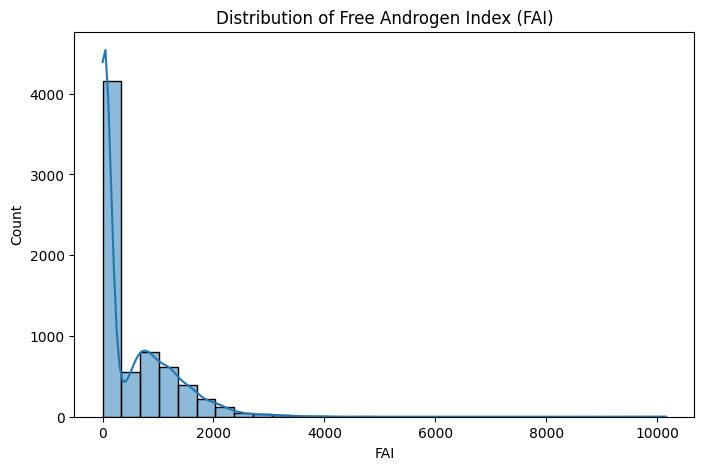

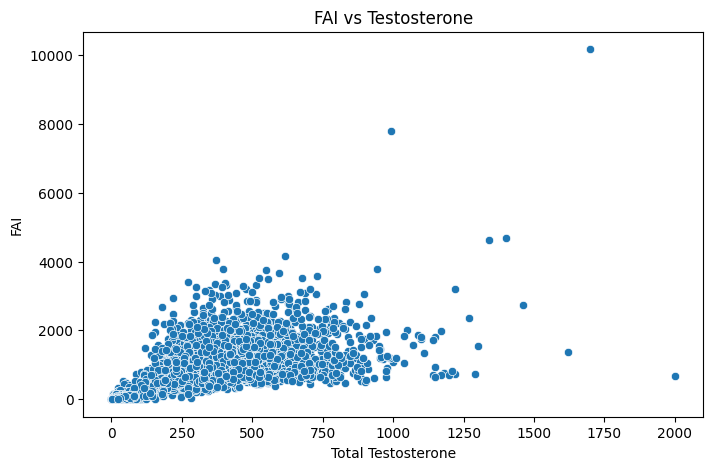

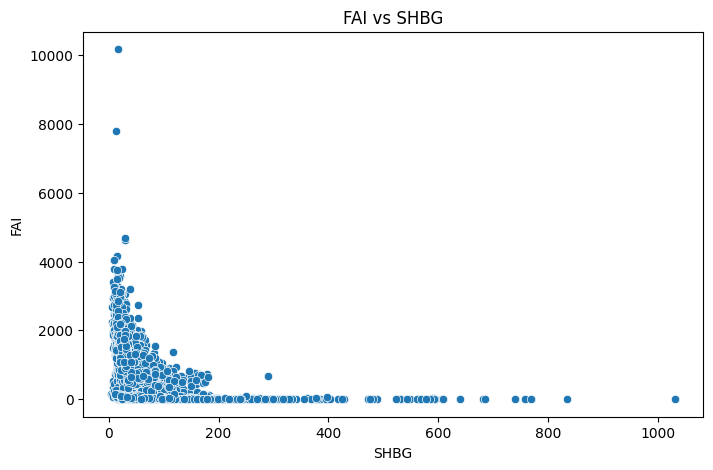

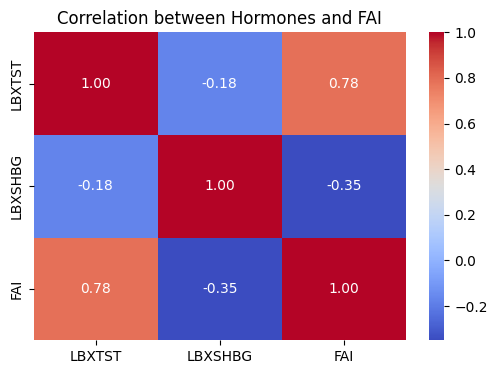

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# --- Step 2: Keep rows with valid Testosterone & SHBG ---
df_clean = df_1.dropna(subset=["LBXTST", "LBXSHBG"]).copy()

# --- Step 3: Calculate FAI ---
df_clean["FAI"] = (df_clean["LBXTST"] / df_clean["LBXSHBG"]) * 100

# --- Step 4: Basic summary ---
print(df_clean[["LBXTST", "LBXSHBG", "FAI"]].describe())

# --- Step 5: Visualization ---

plt.figure(figsize=(8,5))
sns.histplot(df_clean["FAI"], bins=30, kde=True)
plt.title("Distribution of Free Androgen Index (FAI)")
plt.xlabel("FAI")
plt.ylabel("Count")
plt.show()

# Boxplot: Testosterone vs FAI
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_clean, x="LBXTST", y="FAI")
plt.title("FAI vs Testosterone")
plt.xlabel("Total Testosterone")
plt.ylabel("FAI")
plt.show()

# Scatterplot: SHBG vs FAI
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_clean, x="LBXSHBG", y="FAI")
plt.title("FAI vs SHBG")
plt.xlabel("SHBG")
plt.ylabel("FAI")
plt.show()

# Optional: Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df_clean[["LBXTST", "LBXSHBG", "FAI"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Hormones and FAI")
plt.show()


            LBXTST      LBXSHBG        LBXEST           FAI         T_E2
count  6896.000000  6896.000000   6896.000000   6896.000000  6896.000000
mean    188.465808    64.001533     68.896997    499.428491     9.056011
std     235.140832    50.299727    538.045012    678.897221    10.406426
min       0.530000     4.810000      2.114000      0.266198     0.002789
25%      15.000000    33.290000      7.567500     23.251879     0.772772
50%      33.400000    50.065000     21.100000     71.292967     3.826792
75%     349.000000    79.780000     35.700000    885.709878    15.808150
max    2000.000000   758.200000  14000.000000  10167.464115   167.928098


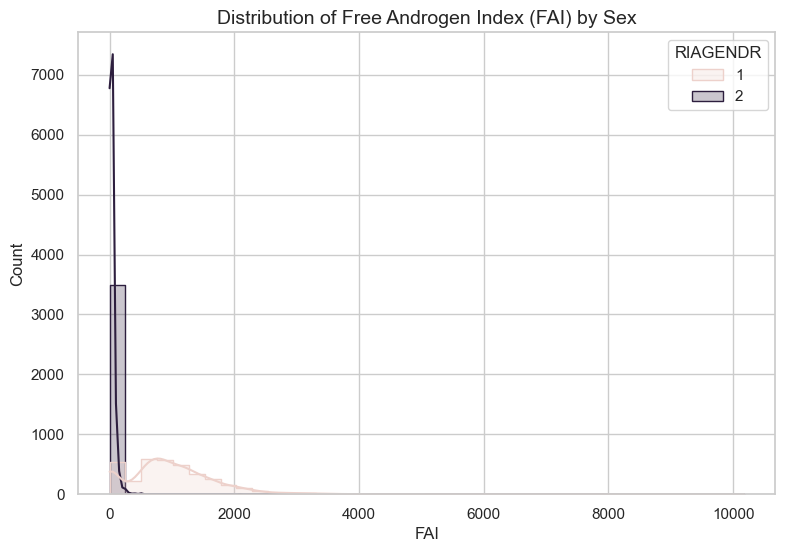

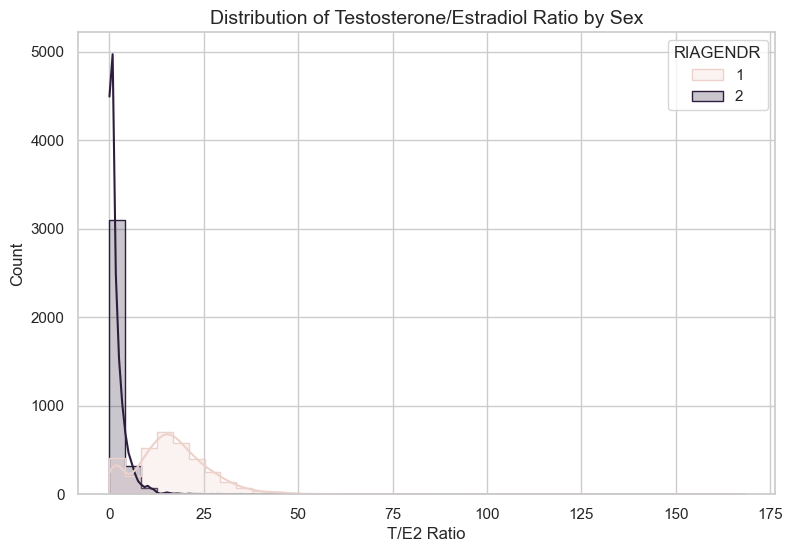

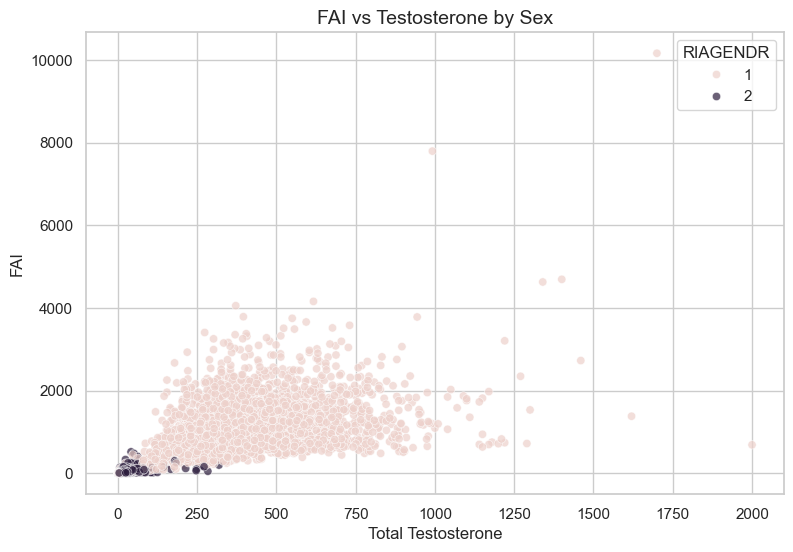

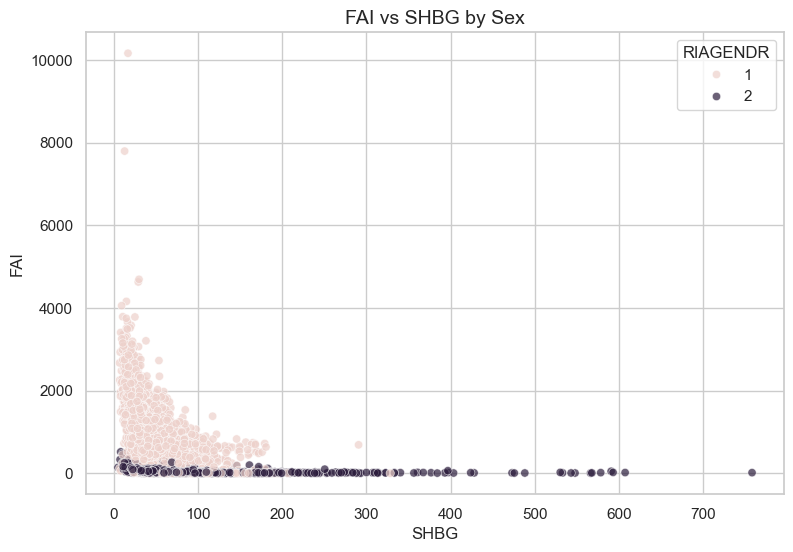

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

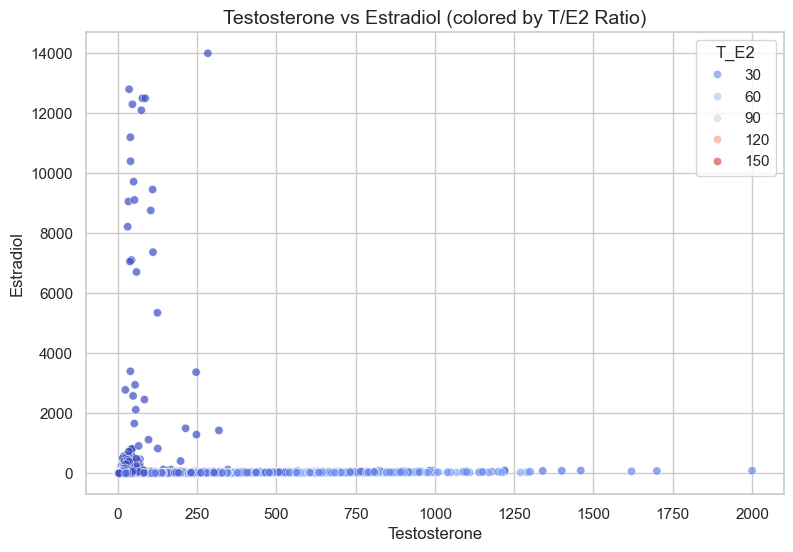

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Keep rows with valid Testosterone, SHBG, and Estradiol ---
df_clean = df_1.dropna(subset=["LBXTST", "LBXSHBG", "LBXEST"]).copy()

# --- Step 2: Calculate indices ---
df_clean["FAI"] = (df_clean["LBXTST"] / df_clean["LBXSHBG"]) * 100
df_clean["T_E2"] = df_clean["LBXTST"] / df_clean["LBXEST"]  # Testosterone/Estradiol ratio

# --- Step 3: Basic summary ---
print(df_clean[["LBXTST", "LBXSHBG", "LBXEST", "FAI", "T_E2"]].describe())

# Set seaborn theme for nice visuals
sns.set_theme(style="whitegrid", palette="Set2")

# --- Step 4: Distribution of FAI by Sex ---
plt.figure(figsize=(9,6))
sns.histplot(data=df_clean, x="FAI", hue="RIAGENDR", bins=40, kde=True, element="step")
plt.title("Distribution of Free Androgen Index (FAI) by Sex", fontsize=14)
plt.xlabel("FAI")
plt.ylabel("Count")
plt.show()

# --- Step 5: Distribution of T/E2 Ratio by Sex ---
plt.figure(figsize=(9,6))
sns.histplot(data=df_clean, x="T_E2", hue="RIAGENDR", bins=40, kde=True, element="step")
plt.title("Distribution of Testosterone/Estradiol Ratio by Sex", fontsize=14)
plt.xlabel("T/E2 Ratio")
plt.ylabel("Count")
plt.show()

# --- Step 6: Scatter - Testosterone vs FAI ---
plt.figure(figsize=(9,6))
sns.scatterplot(data=df_clean, x="LBXTST", y="FAI", hue="RIAGENDR", alpha=0.7)
plt.title("FAI vs Testosterone by Sex", fontsize=14)
plt.xlabel("Total Testosterone")
plt.ylabel("FAI")
plt.show()

# --- Step 7: Scatter - SHBG vs FAI ---
plt.figure(figsize=(9,6))
sns.scatterplot(data=df_clean, x="LBXSHBG", y="FAI", hue="RIAGENDR", alpha=0.7)
plt.title("FAI vs SHBG by Sex", fontsize=14)
plt.xlabel("SHBG")
plt.ylabel("FAI")
plt.show()

# --- Step 8: Scatter - Testosterone vs Estradiol (color by T/E2 Ratio) ---
plt.figure(figsize=(9,6))
sns.scatterplot(
    data=df_clean, 
    x="LBXTST", 
    y="LBXEST", 
    hue="T_E2", 
    palette="coolwarm", 
    alpha=0.7
)
plt.title("Testosterone vs Estradiol (colored by T/E2 Ratio)", fontsize=14)
plt.xlabel("Testosterone")
plt.ylabel("Estradiol")
plt.colorbar(plt.cm.ScalarMappable(cmap="coolwarm"), label="T/E2 Ratio")
plt.show()

# --- Step 9: Correlation heatmap ---
plt.figure(figsize=(7,5))
sns.heatmap(
    df_clean[["LBXTST", "LBXSHBG", "LBXEST", "FAI", "T_E2"]].corr(),
    annot=True, cmap="coolwarm", fmt=".2f"
)
plt.title("Correlation between Hormones and Ratios", fontsize=14)
plt.show()


In [9]:
df_3  = df_3[df_3["LBXEST"]  <= 600].copy()

df_3  = df_3[df_3["LBXTST"]  <= 1200].copy()

df_3  = df_3[df_3["LBXSHBG"]  <= 500].copy()

In [12]:
import numpy as np
import pandas as pd

# load (example)
df = df_3.copy()

# 1. Standard column names are already available from your mapping.
# 2. Convert numeric columns that may be strings:
num_cols = ["LBXBPB","LBDBPBSI","LBXBCD","LBDBCDSI","LBXTHG","LBDTHGSI",
            "LBXBSE","LBDBSESI","LBXBMN","LBDBMNSI","LBXTST","LBXEST","LBXSHBG",
            "RIDAGEYR","RIDAGEMN","RIDEXAGM","RHQ160","RHQ169","RHQ171","RHQ131"]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# 3. Use comment-code columns to identify LOD/censored values (where applicable)
# Example: LBDBPBSI corresponds to LBDBPBLC comment code. Interpret comment codes per NHANES doc:
#   1 - value below LOD; 2 - above LOD? (refer to codebook). Here we just flag:
for metal, ccode in [("LBDBPBSI","LBDBPBLC"),("LBDBCDSI","LBDBCDLC"),("LBDTHGSI","LBDTHGLC"),
                     ("LBDBSESI","LBDBSELC"),("LBDBMNSI","LBDBMNLC")]:
    if metal in df.columns and ccode in df.columns:
        df[f"{metal}_censored"] = df[ccode]==1  # adjust logic to NHANES specific codes

# 4. Log transform heavy metal and hormone distributions (many are right-skewed)
for c in ["LBXBPB","LBXBCD","LBXTHG","LBXBSE","LBXBMN","LBXTST","LBXEST","LBXSHBG"]:
    if c in df.columns:
        df[f"log_{c}"] = np.log1p(df[c])  # log(1 + x) to handle zeros

# 5. Filter sexes
df_female = df[df["RIAGENDR"]==2].copy()  # NHANES coding: 1=male,2=female (confirm for your release)
df_male   = df[df["RIAGENDR"]==1].copy()


## General exploratory plots

### 1) Distribution plots for each metal (and log-transformed)

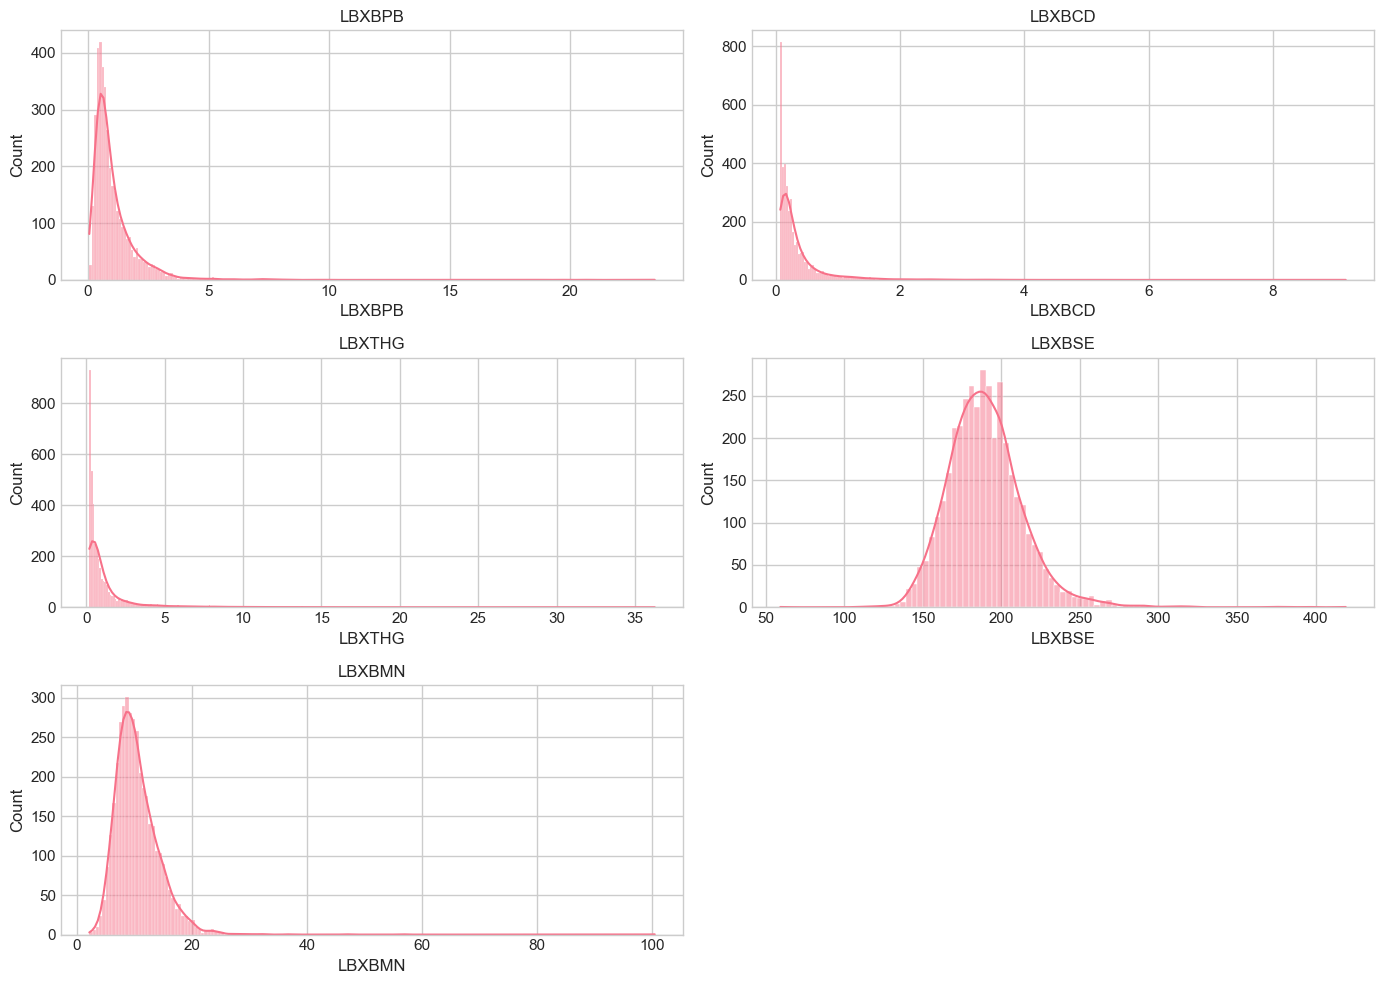

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

metals = ["LBXBPB","LBXBCD","LBXTHG","LBXBSE","LBXBMN"]
plt.figure(figsize=(14,10))
for i,c in enumerate(metals,1):
    plt.subplot(3,2,i)
    sns.histplot(df[c].dropna(), kde=True)
    plt.title(c)
plt.tight_layout()


### 2) Violin plots of hormones by sex and age groups

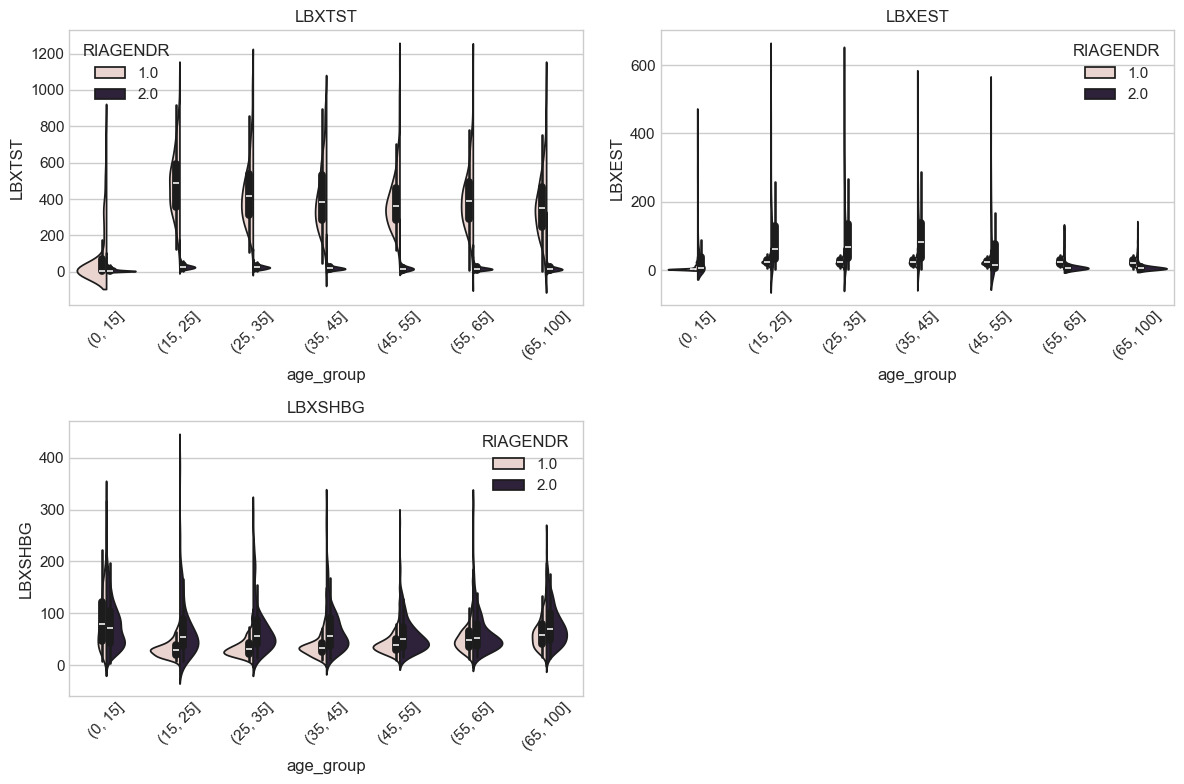

In [14]:
horms = ["LBXTST","LBXEST","LBXSHBG"]
df["age_group"] = pd.cut(df["RIDAGEYR"], bins=[0,15,25,35,45,55,65,100])
plt.figure(figsize=(12,8))
for i,h in enumerate(horms,1):
    plt.subplot(2,2,i)
    sns.violinplot(x="age_group", y=h, hue="RIAGENDR", data=df, split=True)
    plt.xticks(rotation=45)
    plt.title(h)
plt.tight_layout()


### 3) Correlation matrix + significance mask (metals only)

Text(0.5, 1.0, 'Pearson correlation (metals)')

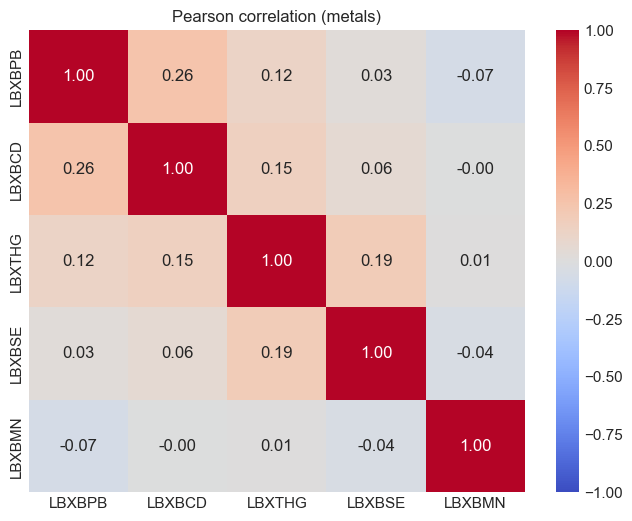

In [15]:
import scipy.stats as st
metals = ["LBXBPB","LBXBCD","LBXTHG","LBXBSE","LBXBMN"]
sub = df[metals].dropna()
corr = sub.corr()
pvals = sub.corr(method=lambda x,y: st.pearsonr(x,y)[1]) - np.eye(len(metals))
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap="coolwarm", fmt=".2f")
plt.title("Pearson correlation (metals)")

### 4) Pairplot with regression lines (metals) — female subset

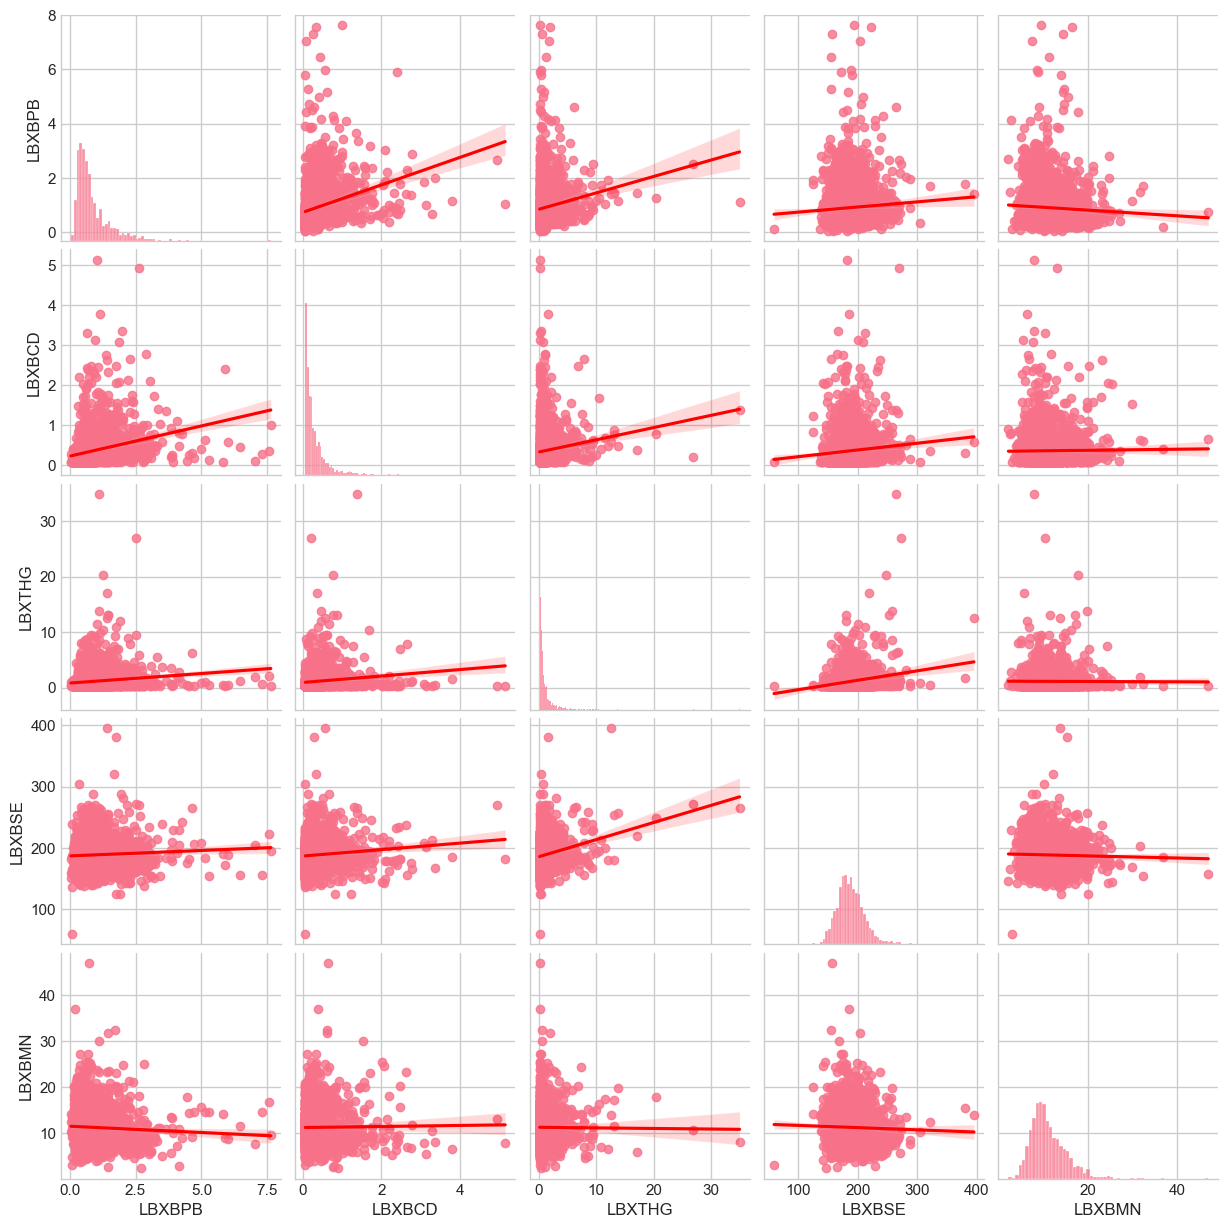

In [16]:
sns.pairplot(df_female[metals].dropna(), kind="reg", plot_kws={"line_kws":{"color":"red"}})

### 5) PCA on metals (exposure patterns)

Why: reduce dimensionality, create an “exposure score” (PC1) to use as predictor.

Text(0.5, 1.0, 'PCA of heavy metals')

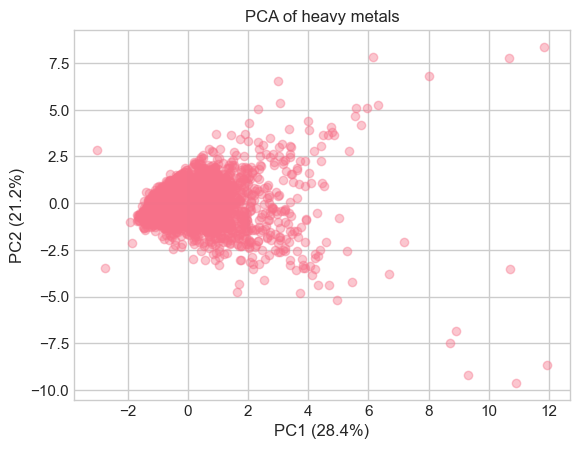

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df[metals].dropna()
Xs = StandardScaler().fit_transform(X)
pca = PCA(n_components=2).fit(Xs)
pcs = pca.transform(Xs)
plt.scatter(pcs[:,0], pcs[:,1], alpha=0.4)
plt.xlabel("PC1 (%.1f%%)"%(100*pca.explained_variance_ratio_[0]))
plt.ylabel("PC2 (%.1f%%)"%(100*pca.explained_variance_ratio_[1]))
plt.title("PCA of heavy metals")


### 6) Scatter + smooth fit (LOWESS) metal vs hormone (e.g., Pb vs Testosterone) — males

Text(0.5, 1.0, 'LOWESS: Lead vs Testosterone (males)')

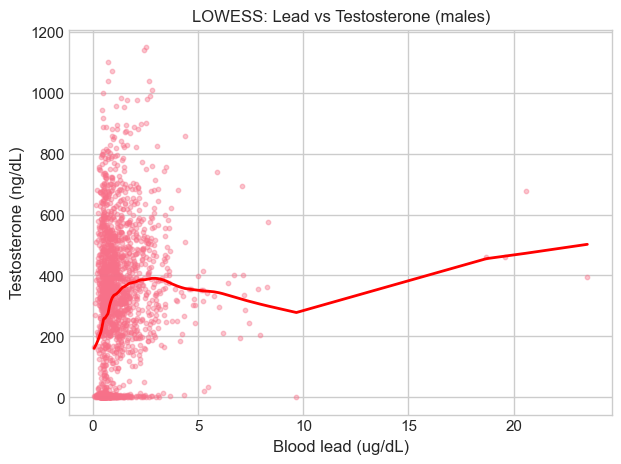

In [18]:
import statsmodels.api as sm

x = df_male["LBXBPB"]
y = df_male["LBXTST"]
mask = x.notna() & y.notna()
lowess = sm.nonparametric.lowess(y[mask], x[mask], frac=0.3)
plt.figure(figsize=(7,5))
plt.scatter(x[mask], y[mask], alpha=0.4, s=10)
plt.plot(lowess[:,0], lowess[:,1], color="red", linewidth=2)
plt.xlabel("Blood lead (ug/dL)")
plt.ylabel("Testosterone (ng/dL)")
plt.title("LOWESS: Lead vs Testosterone (males)")


### 7) GAM (Generalized Additive Model) to model non-linear metal→hormone effects

Why: quantify shape and test significance of smooth.

ValueError: 'x' has size 100, but 'y1' has an unequal size of 2

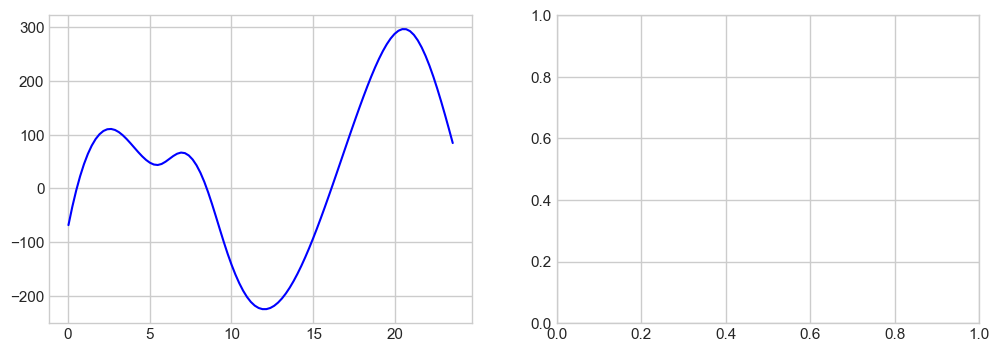

In [19]:
from pygam import LinearGAM, s

# Keep only rows without NaNs in predictors + outcome
df_gam = df_male[["LBXBPB","LBXTHG","LBXTST"]].dropna()

X = df_gam[["LBXBPB","LBXTHG"]]
y = df_gam["LBXTST"]

gam = LinearGAM(s(0) + s(1)).fit(X, y)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pdep, conf = gam.partial_dependence(term=i, X=XX, width=0.95)
    ax.plot(XX[:, i], pdep, color="blue")
    ax.fill_between(XX[:, i], conf[0], conf[1], alpha=0.2, color="blue")
    ax.set_title(f"Partial dependence of {X.columns[i]}")
plt.tight_layout()
plt.show()


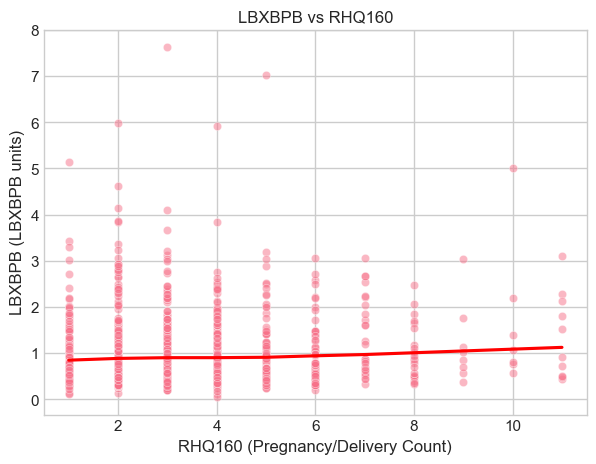

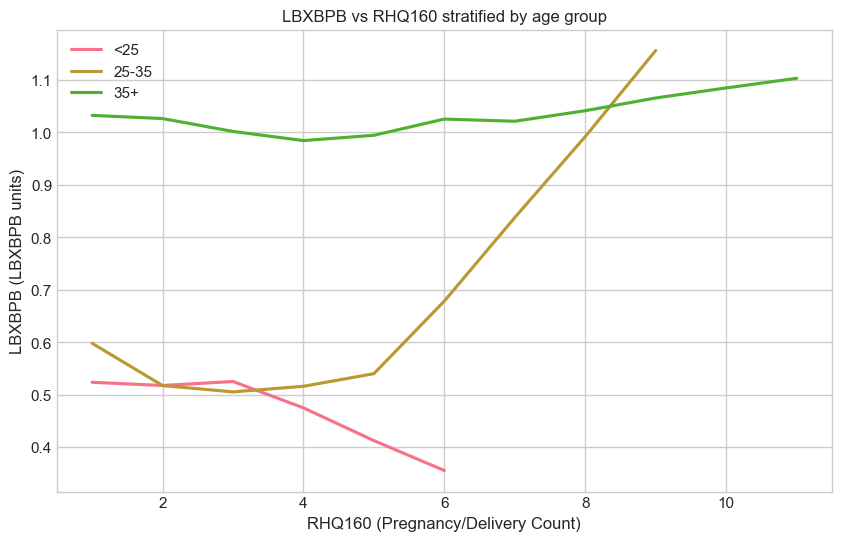

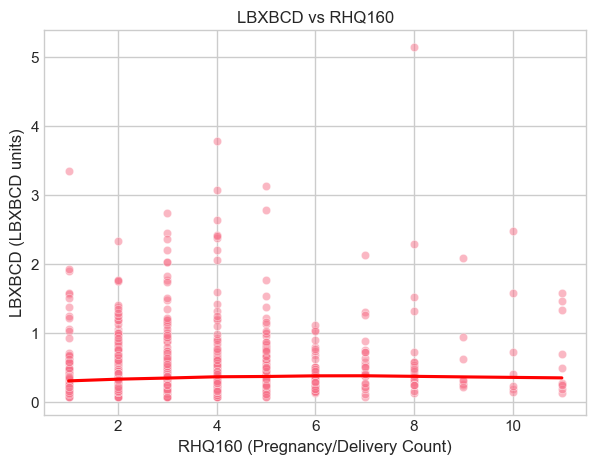

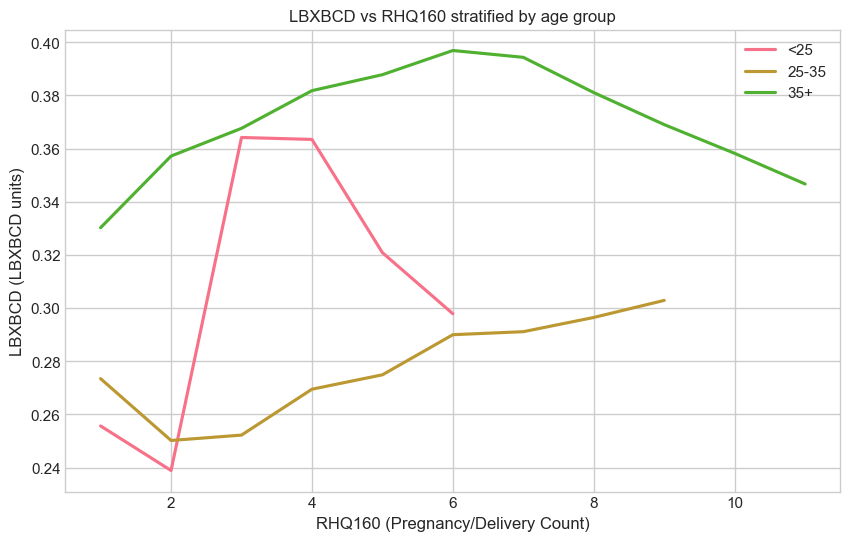

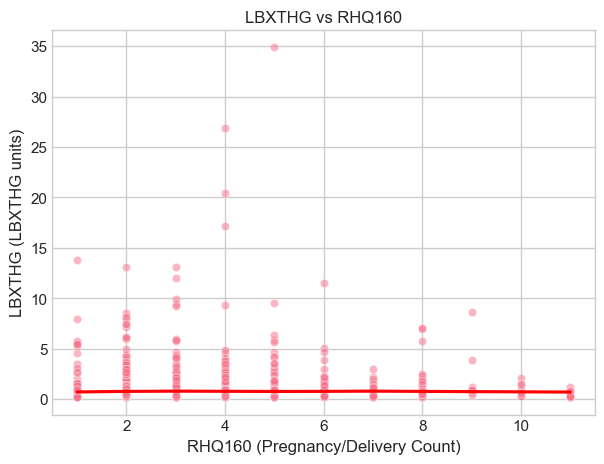

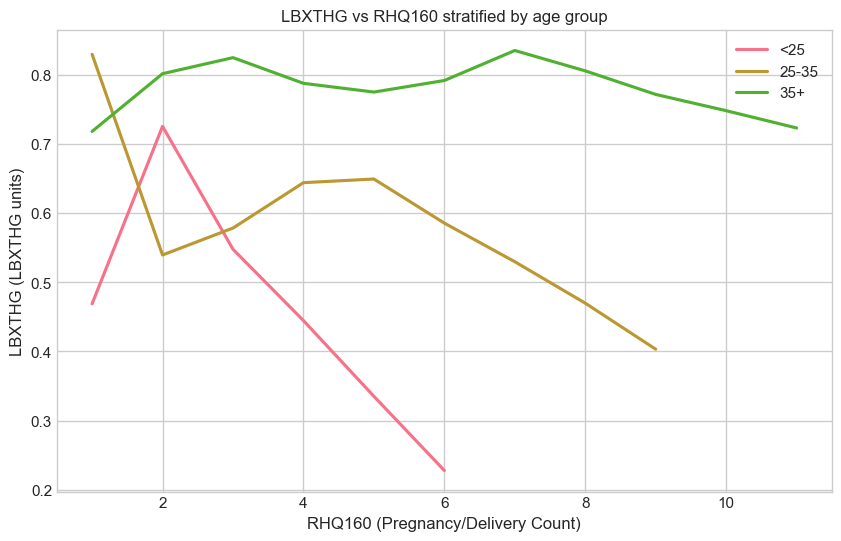

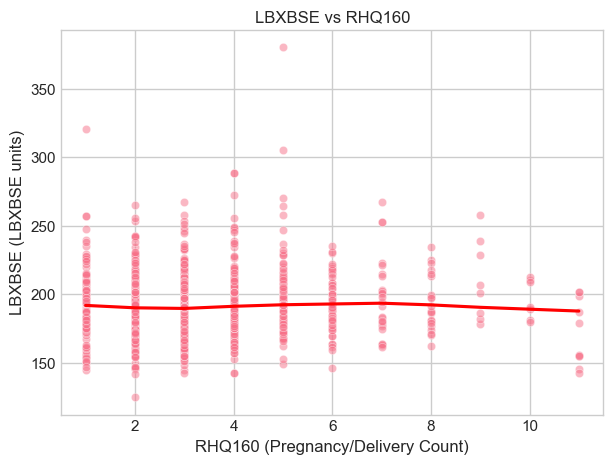

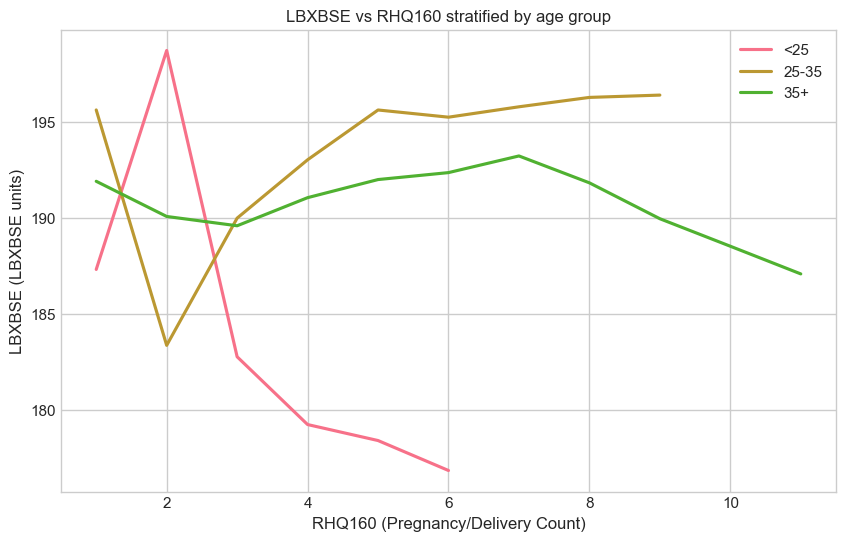

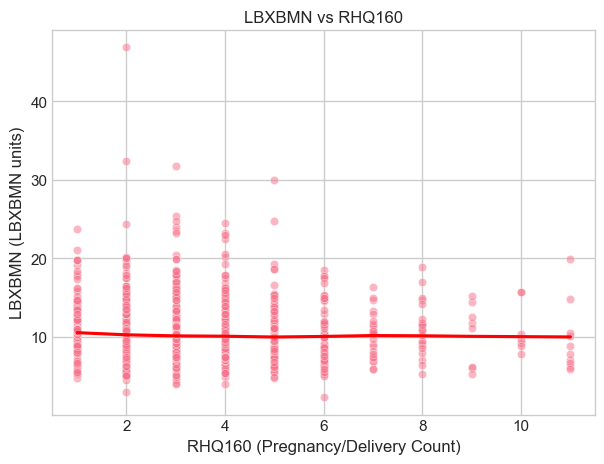

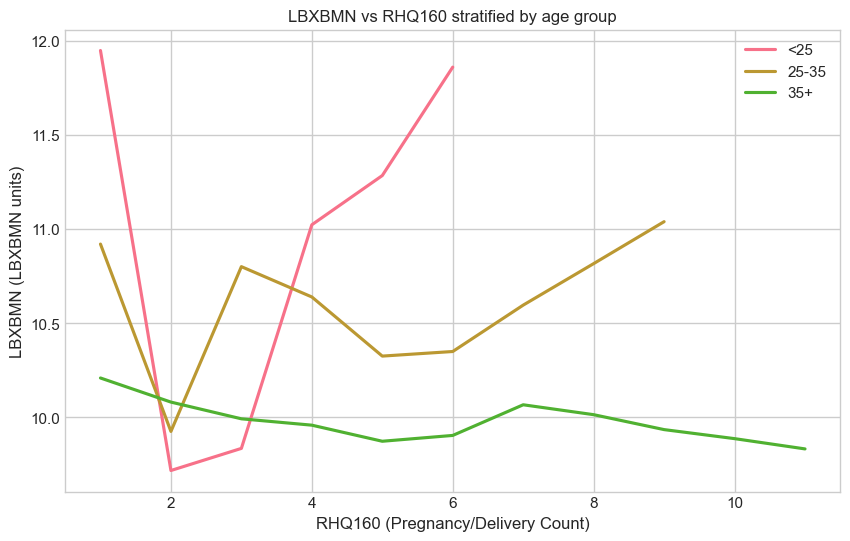

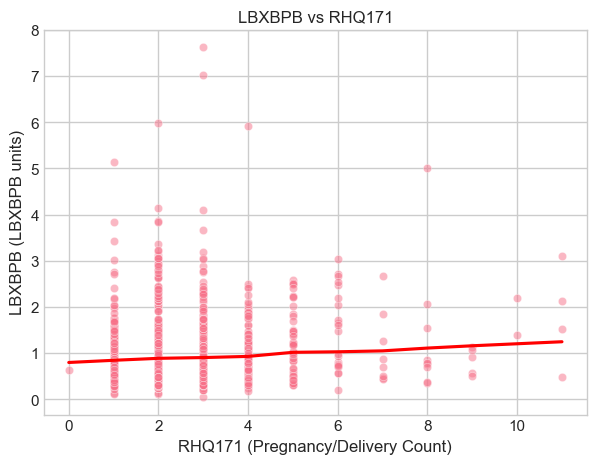

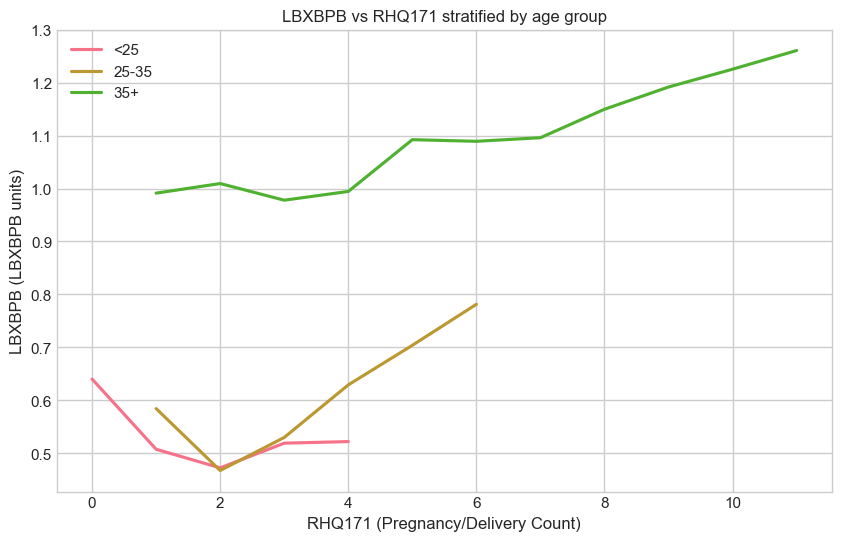

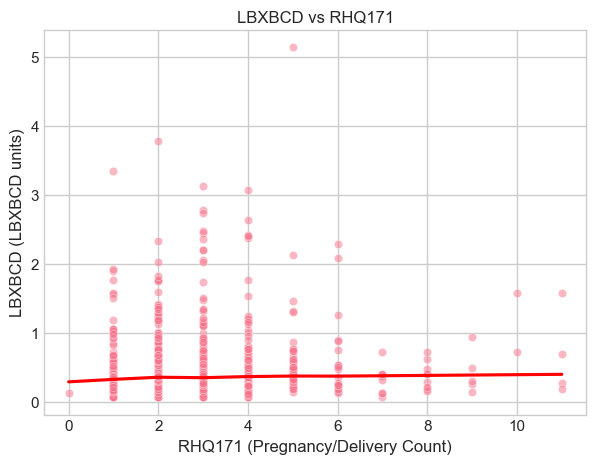

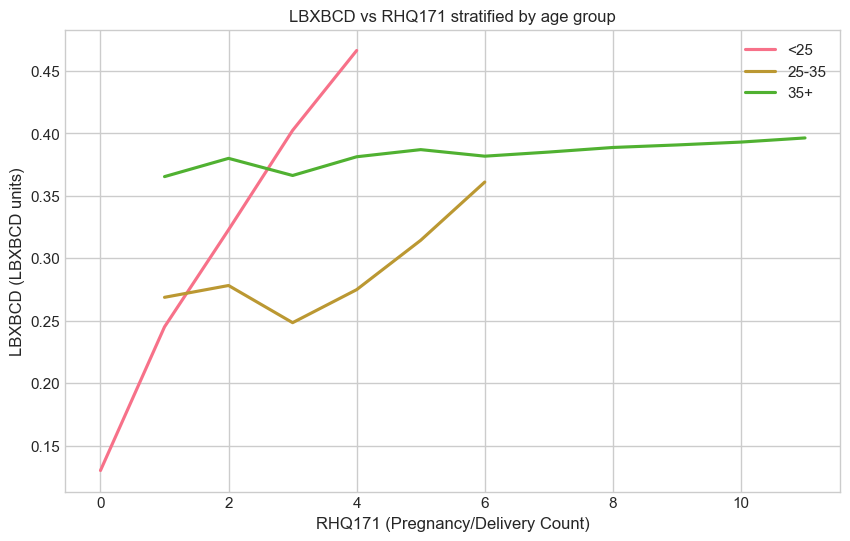

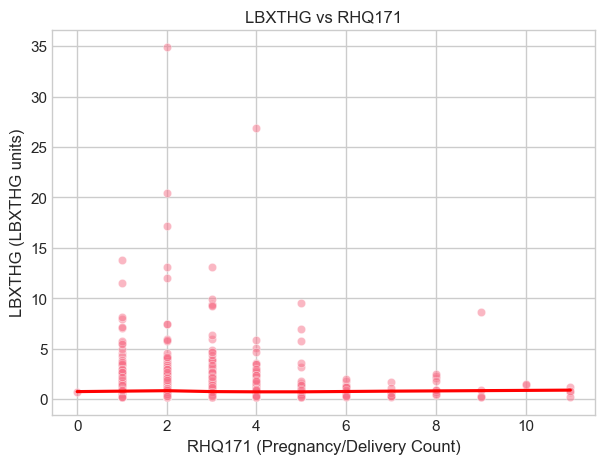

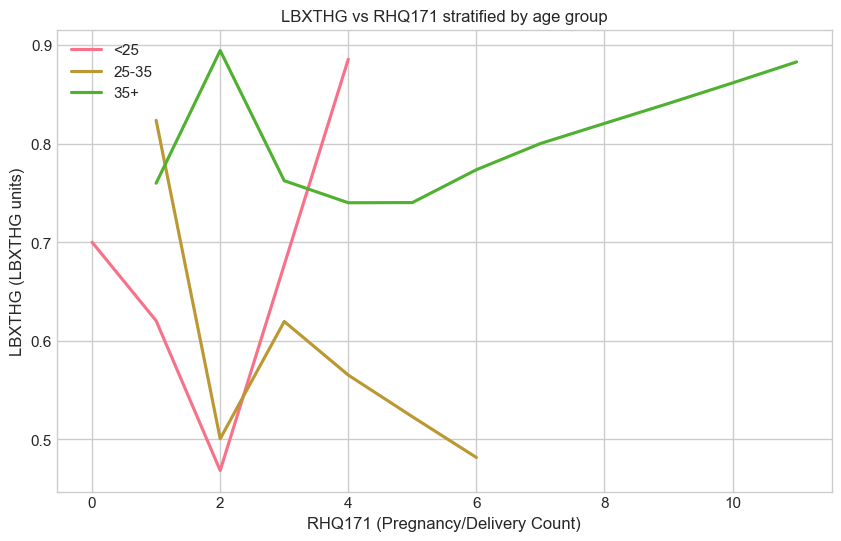

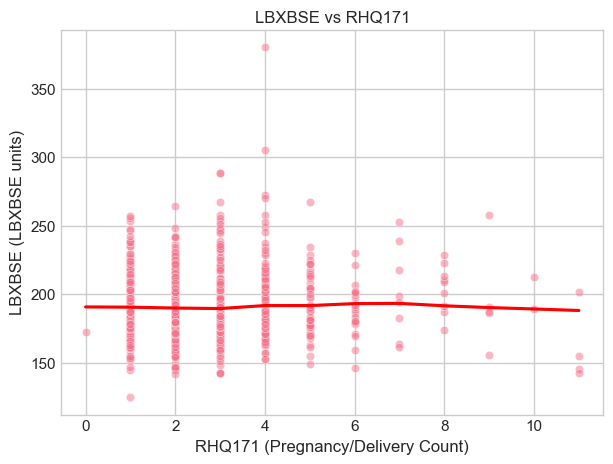

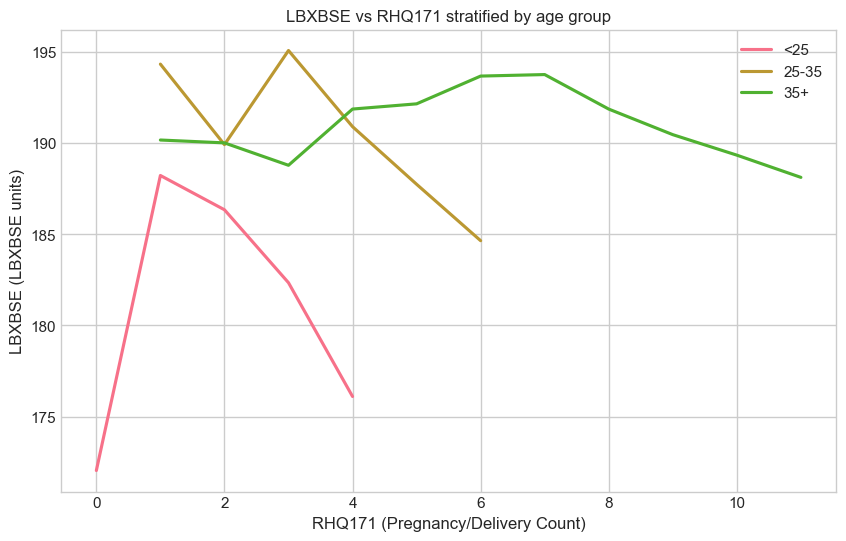

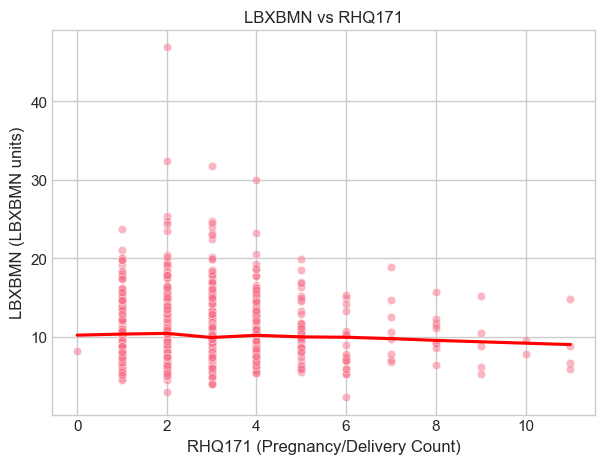

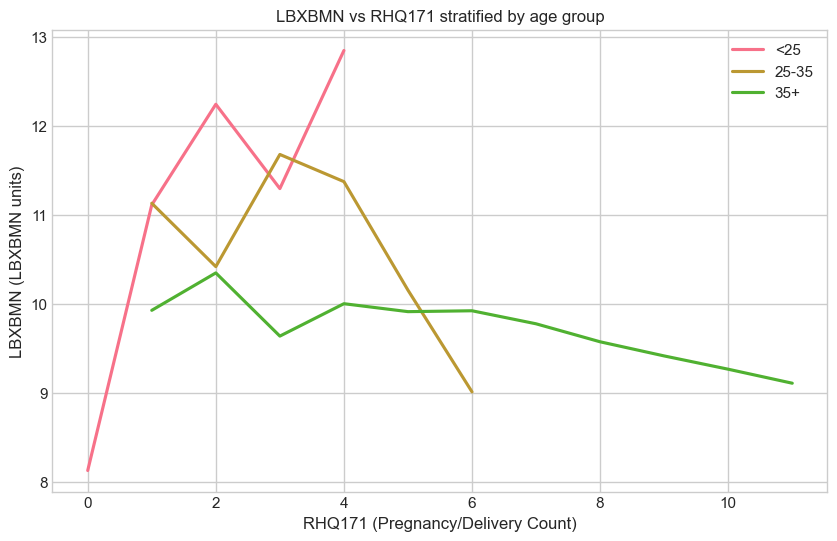

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

fertility_vars = ["RHQ160", "RHQ171"]  # pregnancies, deliveries
metals = ["LBXBPB", "LBXBCD", "LBXTHG", "LBXBSE", "LBXBMN"]  # extend with all your metals

# Loop over fertility outcomes
for fert in fertility_vars:
    for m in metals:
        plt.figure(figsize=(7,5))
        sns.scatterplot(x=fert, y=m, data=df_female, alpha=0.5)
        sns.regplot(x=fert, y=m, data=df_female, scatter=False, lowess=True, line_kws={"color":"red"})
        plt.xlabel(f"{fert} (Pregnancy/Delivery Count)")
        plt.ylabel(f"{m} ({m} units)")
        plt.title(f"{m} vs {fert}")
        plt.show()

        # Stratified by age groups
        plt.figure(figsize=(10,6))
        subg = df_female.copy()
        subg["age_cat"] = pd.cut(subg["RIDAGEYR"], bins=[0,25,35,100], labels=["<25","25-35","35+"])
        for age_group in subg["age_cat"].cat.categories:
            sg = subg[subg["age_cat"] == age_group]
            if sg[fert].notna().sum() > 5:  # only plot if enough data
                sns.regplot(x=fert, y=m, data=sg, lowess=True, scatter=False, label=age_group)
        plt.xlabel(f"{fert} (Pregnancy/Delivery Count)")
        plt.ylabel(f"{m} ({m} units)")
        plt.title(f"{m} vs {fert} stratified by age group")
        plt.legend()
        plt.show()


### 8) Multi-panel: metals (log) vs hormones (log) with regression + residuals

Why: show multiple metals’ relationship to a single hormone in one figure.

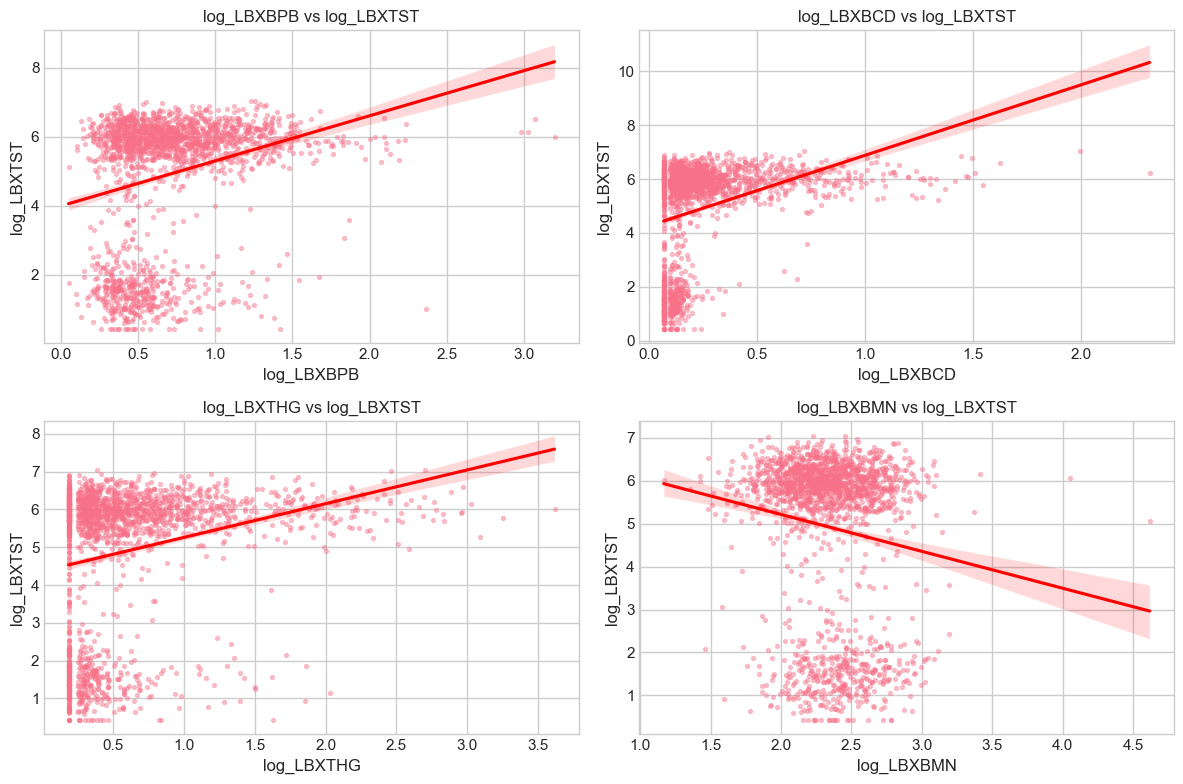

In [22]:
metals_log = ["log_LBXBPB","log_LBXBCD","log_LBXTHG","log_LBXBMN"]
h = "log_LBXTST"  # log testosterone
plt.figure(figsize=(12,8))
for i,m in enumerate(metals_log,1):
    plt.subplot(2,2,i)
    sns.regplot(x=m, y=h, data=df_male, scatter_kws={"s":8, "alpha":0.4}, line_kws={"color":"red"})
    plt.title(f"{m} vs {h}")
plt.tight_layout()


### 9) Compare metal levels by pregnancy history (RHQ131 = ever been pregnant?)

Text(0.5, 1.0, 'Blood lead by ever-pregnant status (females)')

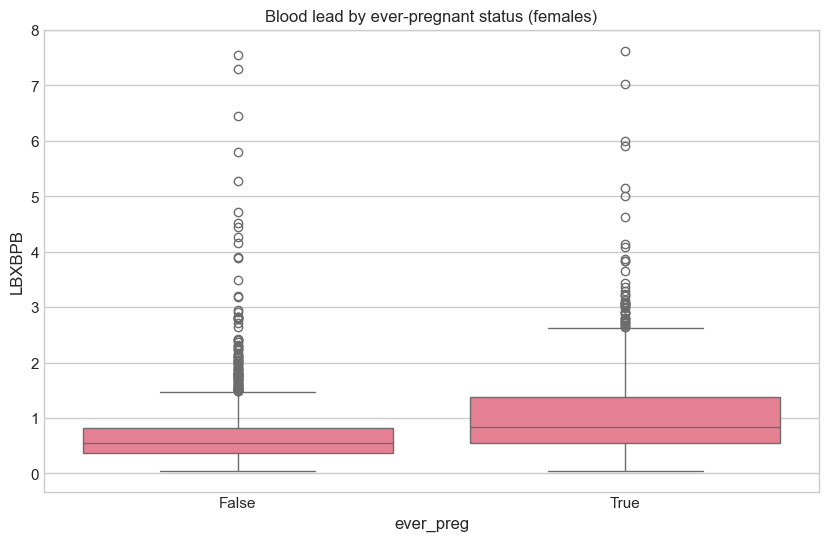

In [23]:
# assume RHQ131: 1=yes, 2=no (confirm coding)
df_f = df_female.copy()
df_f["ever_preg"] = df_f["RHQ131"]==1
plt.figure(figsize=(10,6))
sns.boxplot(x="ever_preg", y="LBXBPB", data=df_f)
plt.title("Blood lead by ever-pregnant status (females)")


### 10) Number of pregnancies / number of births (count) vs metal levels (smooth)

Text(0, 0.5, 'Blood lead (ug/dL)')

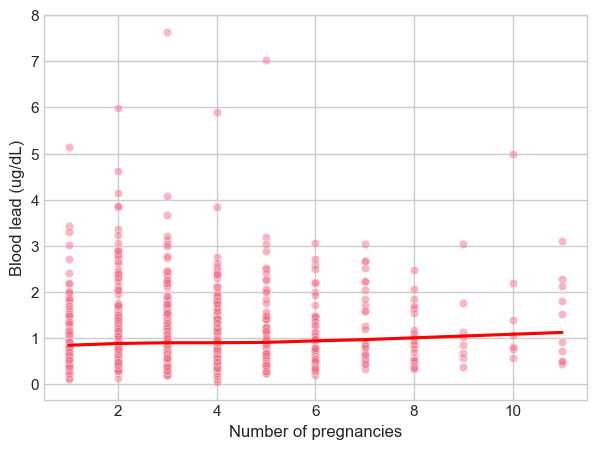

In [24]:
# Using RHQ160 = How many times have been pregnant? or RHQ171 deliveries
plt.figure(figsize=(7,5))
sns.scatterplot(x="RHQ160", y="LBXBPB", data=df_female, alpha=0.5)
sns.regplot(x="RHQ160", y="LBXBPB", data=df_female, scatter=False, lowess=True, line_kws={"color":"red"})
plt.xlabel("Number of pregnancies")
plt.ylabel("Blood lead (ug/dL)")

### 11) Stratified smooth-fit: metal vs children count, stratified by age groups

Text(0.5, 1.0, 'LOWESS by age group')

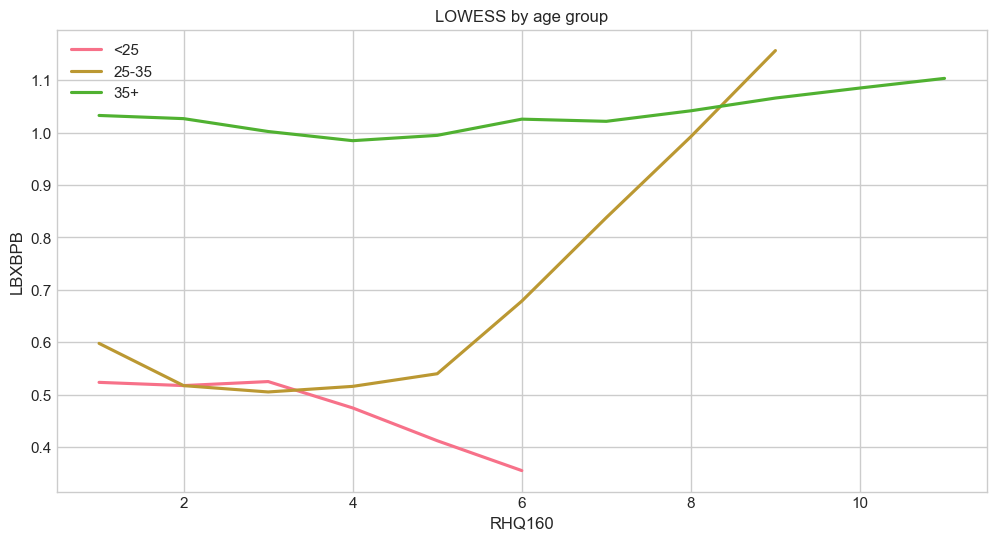

In [25]:
plt.figure(figsize=(12,6))
for age_group in ["<25","25-35","35+"]:
    subg = df_female.copy()
    # create groups
    subg["age_cat"] = pd.cut(subg["RIDAGEYR"], bins=[0,25,35,100], labels=["<25","25-35","35+"])
    sg = subg[subg["age_cat"]==age_group]
    sns.regplot(x="RHQ160", y="LBXBPB", data=sg, lowess=True, label=age_group, scatter=False)
plt.legend()
plt.title("LOWESS by age group")

### 12) Hormone ratio plots (e.g., T/E2, SHBG-adjusted testosterone) vs metals

<Axes: xlabel='LBXBPB', ylabel='T_to_E'>

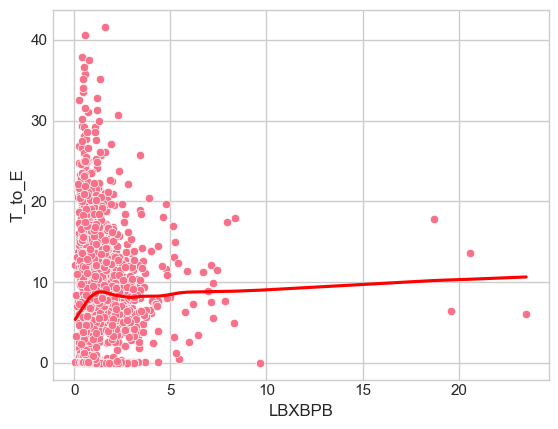

In [26]:
# Create the column inside df_male instead of df
df_male["T_to_E"] = df_male["LBXTST"] / (df_male["LBXSHBG"].replace(0, np.nan))

sns.scatterplot(x="LBXBPB", y="T_to_E", data=df_male)
sns.regplot(x="LBXBPB", y="T_to_E", data=df_male, scatter=False, lowess=True, color="red")


### 13) Heatmap of metal-hormone correlations (both sexes, but separately)

Text(0.5, 1.0, 'Hormone vs metals correlation')

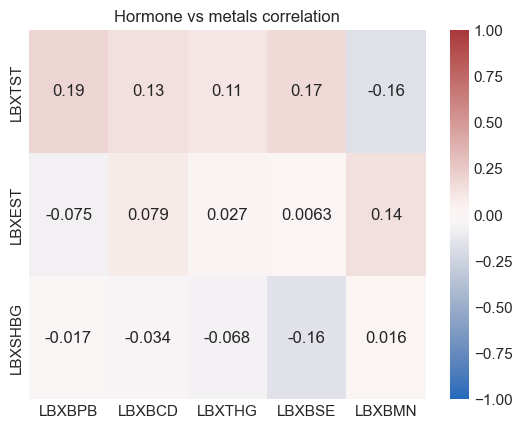

In [27]:
metals = ["LBXBPB","LBXBCD","LBXTHG","LBXBSE","LBXBMN"]
horms = ["LBXTST","LBXEST","LBXSHBG"]
corrs = df[metals+horms].corr().loc[horms, metals]
sns.heatmap(corrs, annot=True, vmin=-1, vmax=1, cmap="vlag")
plt.title("Hormone vs metals correlation")


### 14) Metal levels by socioeconomic variables (income / education)

Text(0.5, 1.0, 'Lead by education level')

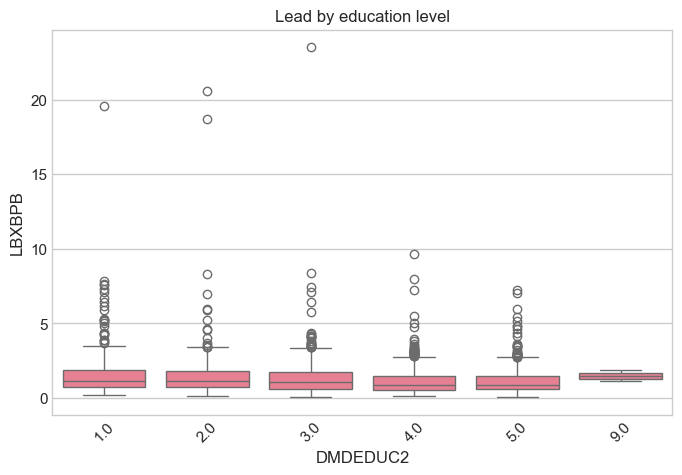

In [28]:
plt.figure(figsize=(8,5))
sns.boxplot(x="DMDEDUC2", y="LBXBPB", data=df)  # adult education
plt.xticks(rotation=45)
plt.title("Lead by education level")

### 15) Cluster analysis of individuals by exposure profile (k-means) and compare cluster hormone means

<Axes: xlabel='cluster', ylabel='LBXTST'>

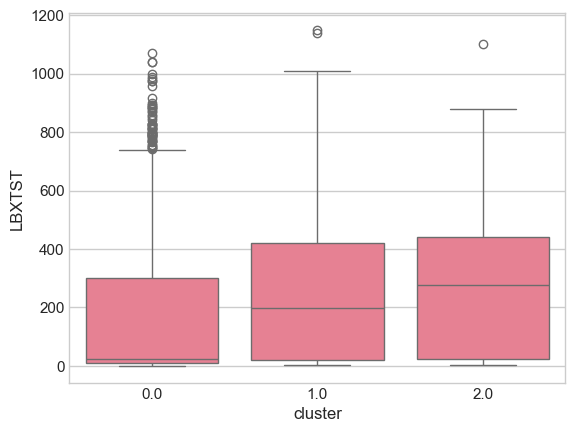

In [29]:
from sklearn.cluster import KMeans
X = df[metals].dropna()
Xstd = (X - X.mean())/X.std()
k = 3
km = KMeans(n_clusters=k, random_state=0).fit(Xstd)
X["cluster"] = km.labels_
sns.boxplot(x="cluster", y="LBXTST", data=df.join(X["cluster"], how="left"))


### 16) Forest plot of adjusted regression coefficients (metal as predictor of hormone), multiple models

Why: show effect sizes and CIs adjusted for age, BMI, smoking, SES. Great for methods/results sections.

In [30]:
import matplotlib.pyplot as plt

# results = [(metal, coef, lower, upper), ...]
metals = [m for m in metals]  # ensure it's defined

results = []
for m in metals:
    coef, se = regress("LBXTST", m, covars)
    results.append((m, coef, coef-1.96*se, coef+1.96*se))

# Convert to DataFrame for easy plotting
res_df = pd.DataFrame(results, columns=["metal", "coef", "lower", "upper"])

# Plot horizontal forest plot
plt.errorbar(res_df["coef"], res_df["metal"], 
             xerr=[res_df["coef"]-res_df["lower"], res_df["upper"]-res_df["coef"]],
             fmt="o", color="black", capsize=3)
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Coefficient")
plt.ylabel("Metals")
plt.title("Association between metals and testosterone")
plt.show()


NameError: name 'regress' is not defined

### 17) Dose–response plot with categorical metal quantiles

Why: clinical-style presentation: e.g., compare hormone means in metal quartiles (monotonicity).

Manganese affects testosterone levels based on concentration: low levels can increase testosterone by stimulating luteinizing hormone (LH) release, but high levels can decrease it by inhibiting steroidogenesis. 

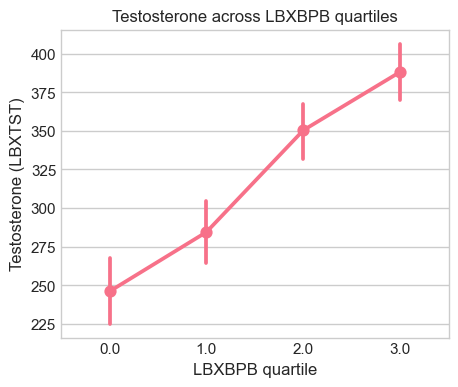

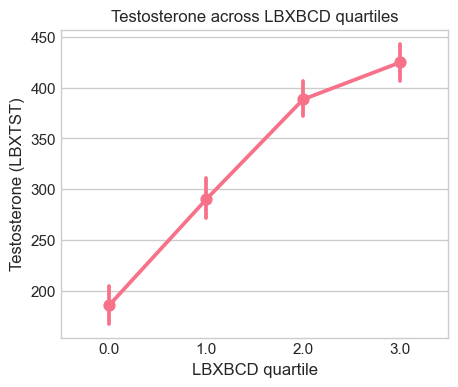

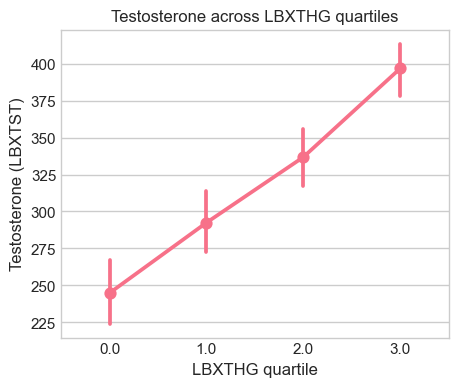

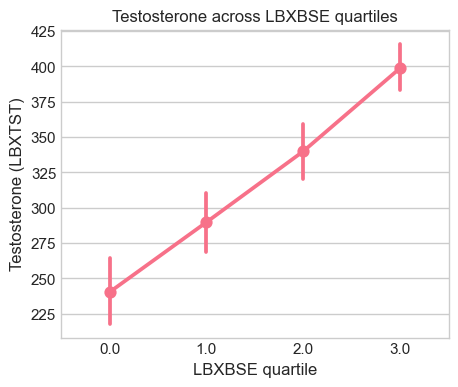

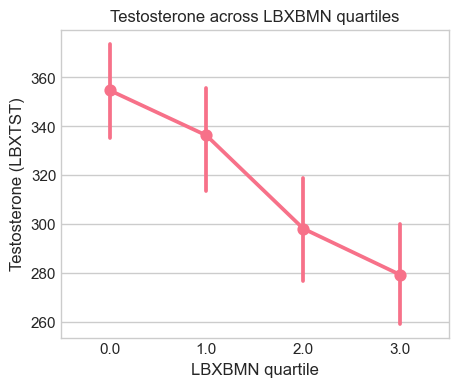

In [31]:
for m in metals:  # metals = list of your metal column names
    qname = f"{m}_q"
    df_male[qname] = pd.qcut(df_male[m], 4, labels=False)

    plt.figure(figsize=(5,4))
    sns.pointplot(x=qname, y="LBXTST", data=df_male, errorbar=("ci", 95))
    plt.xlabel(f"{m} quartile")
    plt.ylabel("Testosterone (LBXTST)")
    plt.title(f"Testosterone across {m} quartiles")
    plt.show()


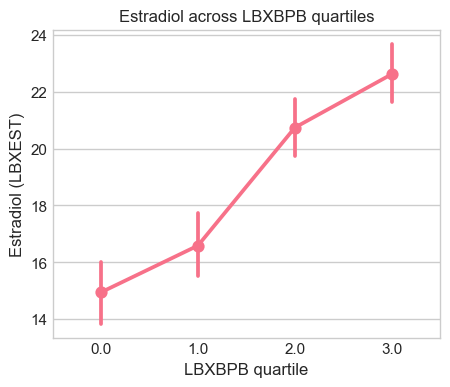

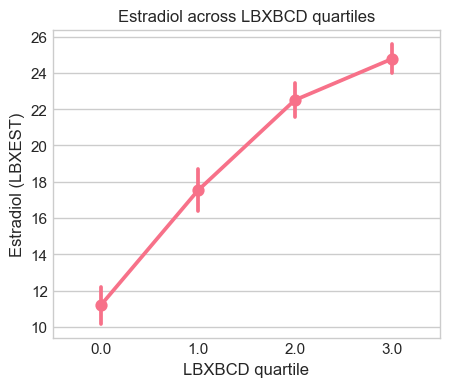

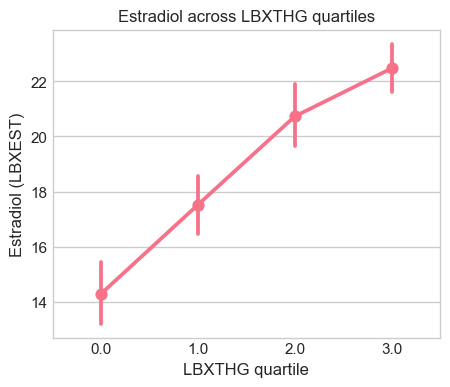

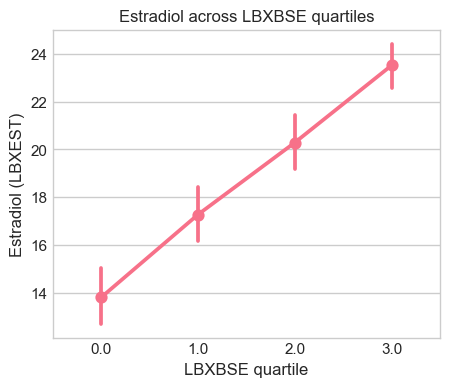

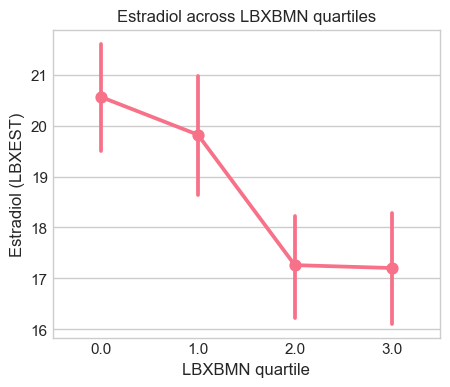

In [32]:
for m in metals:  # metals = list of your metal column names
    qname = f"{m}_q"
    df_male[qname] = pd.qcut(df_male[m], 4, labels=False)

    plt.figure(figsize=(5,4))
    sns.pointplot(x=qname, y="LBXEST", data=df_male, errorbar=("ci", 95))
    plt.xlabel(f"{m} quartile")
    plt.ylabel("Estradiol (LBXEST)")
    plt.title(f"Estradiol across {m} quartiles")
    plt.show()


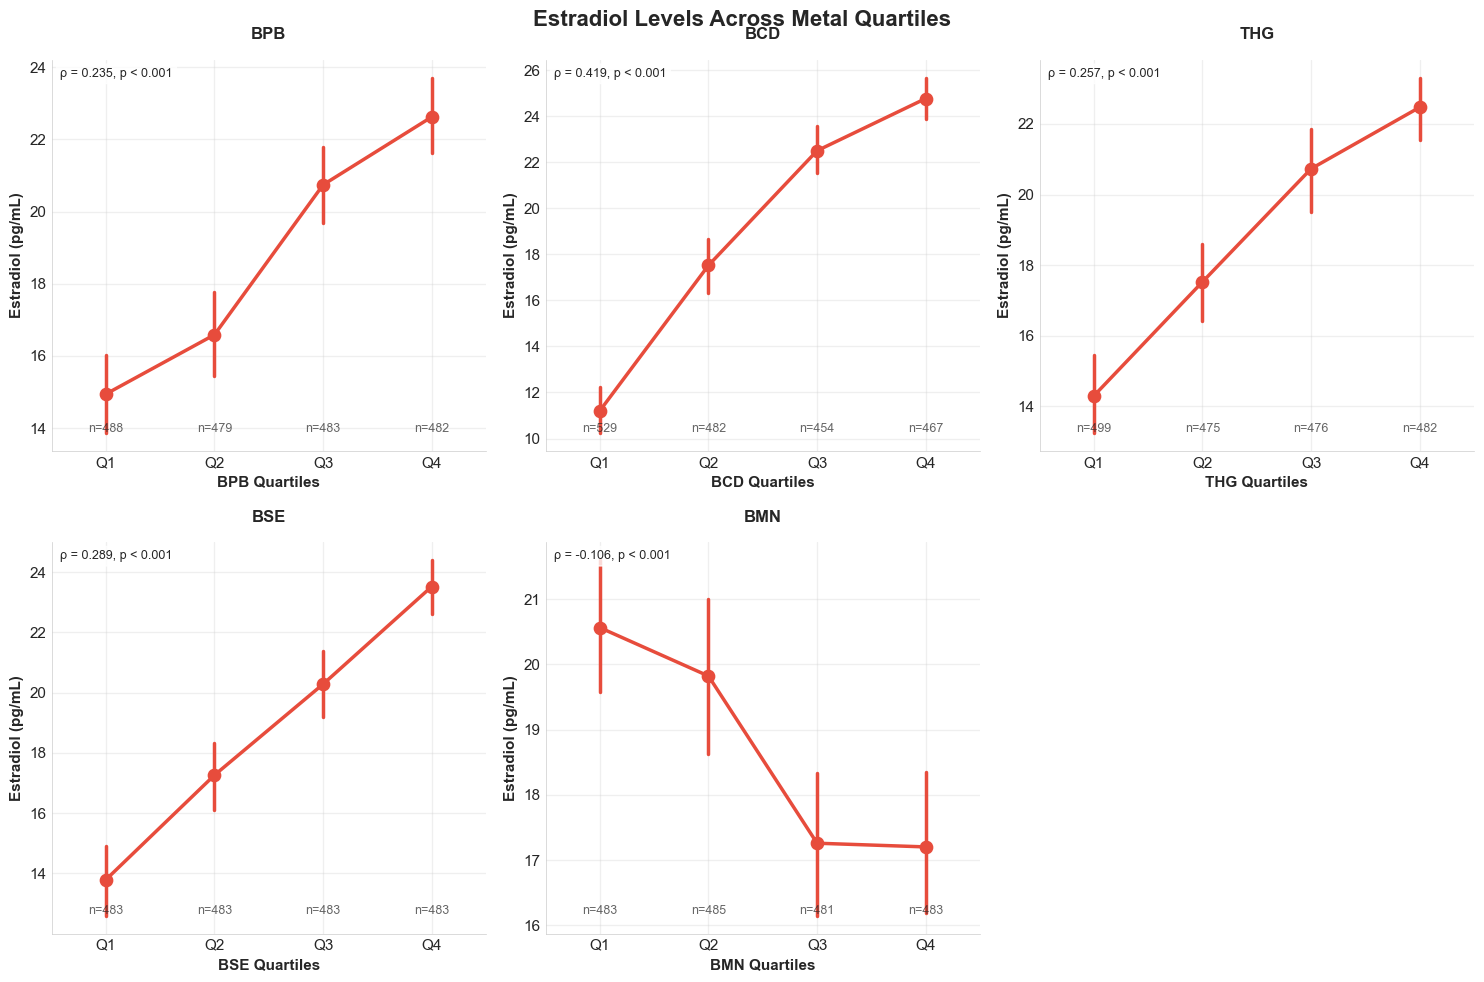

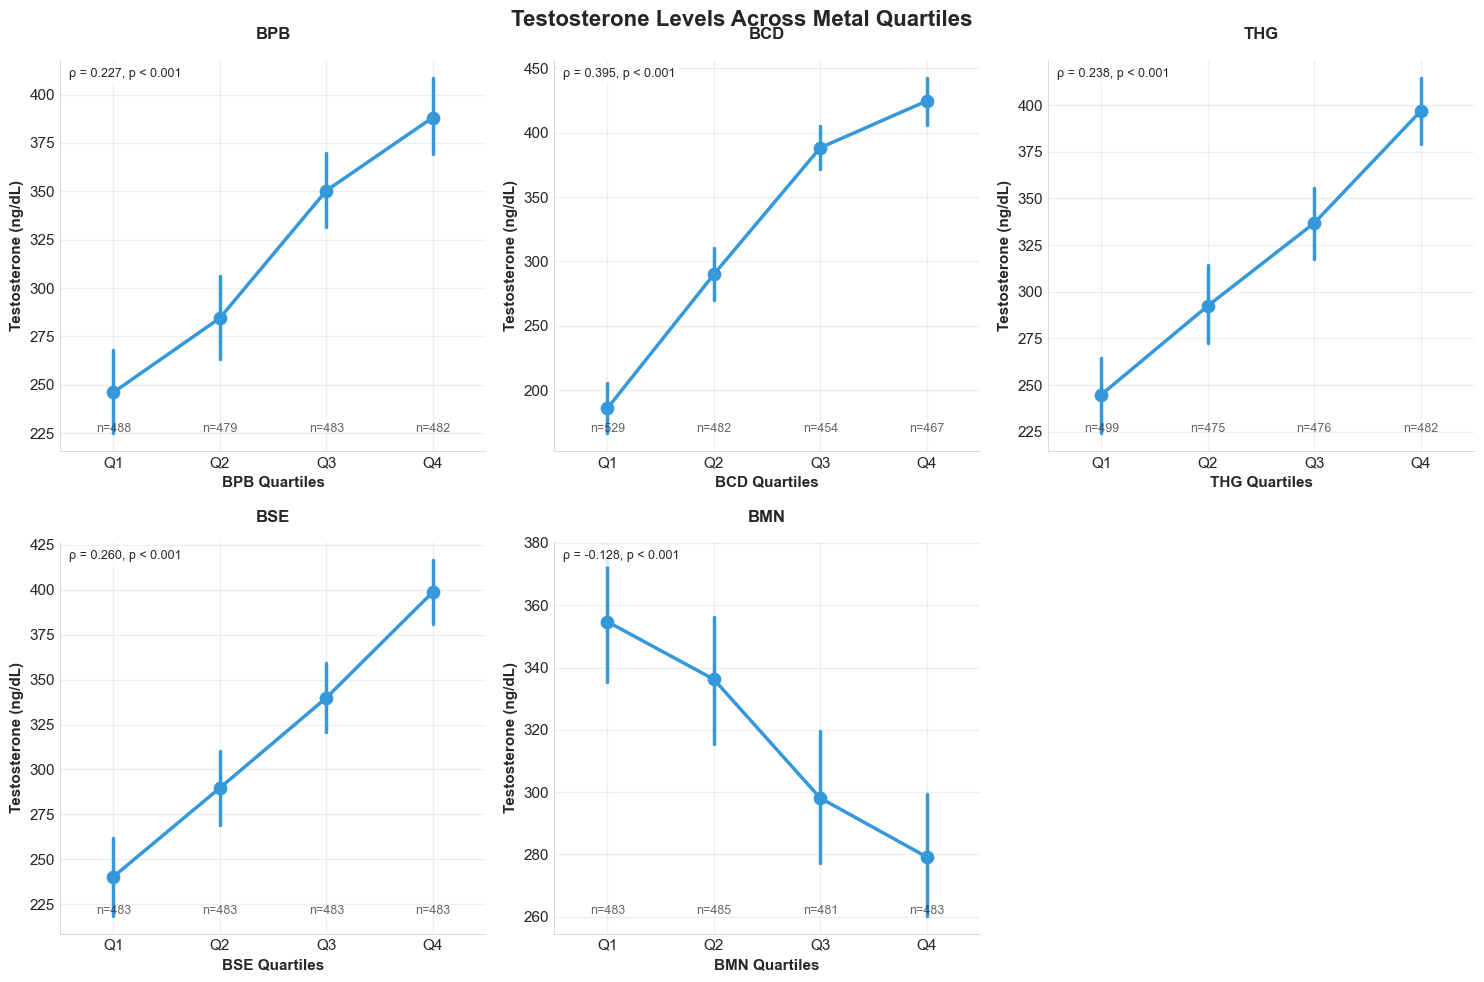


Summary Statistics:
Metal      Hormone F-statistic p-value Q1_mean Q4_mean  Q1_n  Q4_n
  BPB    Estradiol      41.167  <0.001   14.94   22.62   488   482
  BPB Testosterone      38.943  <0.001  246.03  388.16   488   482
  BCD    Estradiol     137.961  <0.001   11.21   24.77   529   467
  BCD Testosterone     127.168  <0.001  185.79  424.67   529   467
  THG    Estradiol      42.847  <0.001   14.30   22.47   499   482
  THG Testosterone      40.325  <0.001  244.81  396.79   499   482
  BSE    Estradiol      57.286  <0.001   13.79   23.52   483   483
  BSE Testosterone      44.155  <0.001  240.18  398.72   483   483
  BMN    Estradiol       9.296  <0.001   20.56   17.20   483   483
  BMN Testosterone      10.866  <0.001  354.73  279.18   483   483


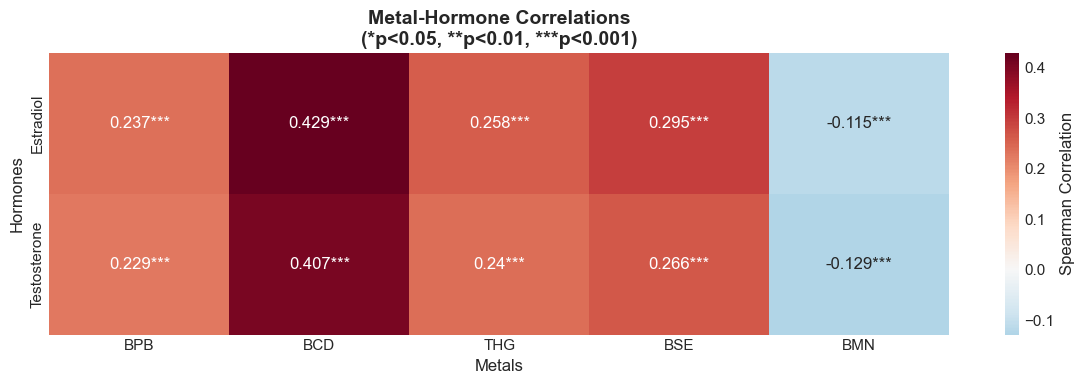

Enhanced plotting functions created!

To use:
1. create_enhanced_hormone_plots(df_male, metals)
2. summary_stats = create_summary_statistics(df_male, metals)
3. corr_matrix = create_combined_heatmap(df_male, metals)


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

def create_enhanced_hormone_plots(df_male, metals, figsize=(15, 10)):
    """
    Create enhanced plots showing hormone levels across metal quartiles
    
    Parameters:
    df_male: DataFrame with male subjects
    metals: list of metal column names
    figsize: tuple for figure size
    """
    
    # Define hormones and their properties
    hormones = {
        'LBXEST': {
            'name': 'Estradiol',
            'unit': 'pg/mL',
            'color': '#E74C3C'
        },
        'LBXTST': {
            'name': 'Testosterone', 
            'unit': 'ng/dL',
            'color': '#3498DB'
        }
    }
    
    # Calculate number of rows needed
    n_metals = len(metals)
    n_rows = (n_metals + 2) // 3  # 3 columns per row
    
    for hormone_col, hormone_info in hormones.items():
        fig, axes = plt.subplots(n_rows, 3, figsize=figsize)
        fig.suptitle(f'{hormone_info["name"]} Levels Across Metal Quartiles', 
                    fontsize=16, fontweight='bold', y=0.98)
        
        # Flatten axes array for easier indexing
        if n_rows == 1:
            axes = axes.reshape(1, -1)
        axes_flat = axes.flatten()
        
        for idx, metal in enumerate(metals):
            ax = axes_flat[idx]
            
            # Create quartiles
            qname = f"{metal}_q"
            df_male[qname] = pd.qcut(df_male[metal], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
            
            # Remove missing values for this analysis
            plot_data = df_male[[qname, hormone_col]].dropna()
            
            # Create the point plot
            sns.pointplot(data=plot_data, x=qname, y=hormone_col, 
                         ax=ax, errorbar=("ci", 95), 
                         color=hormone_info['color'], 
                         markers='o', linestyles='-', 
                         markersize=8, linewidth=2.5)
            
            # Customize the plot
            ax.set_xlabel(f'{metal.replace("LBX", "").replace("LBD", "")} Quartiles', 
                         fontsize=11, fontweight='semibold')
            ax.set_ylabel(f'{hormone_info["name"]} ({hormone_info["unit"]})', 
                         fontsize=11, fontweight='semibold')
            ax.set_title(f'{metal.replace("LBX", "").replace("LBD", "")}', 
                        fontsize=12, fontweight='bold', pad=15)
            
            # Add sample sizes to each quartile
            quartile_counts = plot_data[qname].value_counts().sort_index()
            for i, (quartile, count) in enumerate(quartile_counts.items()):
                ax.text(i, ax.get_ylim()[0] + (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.05, 
                       f'n={count}', ha='center', fontsize=9, alpha=0.7)
            
            # Perform trend test (Jonckheere-Terpstra test approximation)
            try:
                # Simple linear trend test
                quartile_numeric = plot_data[qname].cat.codes
                correlation, p_value = stats.spearmanr(quartile_numeric, plot_data[hormone_col])
                
                # Add trend test result
                trend_text = f'ρ = {correlation:.3f}'
                if p_value < 0.001:
                    trend_text += ', p < 0.001'
                elif p_value < 0.05:
                    trend_text += f', p = {p_value:.3f}'
                else:
                    trend_text += f', p = {p_value:.3f}'
                
                ax.text(0.02, 0.98, trend_text, transform=ax.transAxes, 
                       fontsize=9, verticalalignment='top',
                       bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
            except:
                pass
            
            # Improve grid and spines
            ax.grid(True, alpha=0.3)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)
            
        # Hide empty subplots
        for idx in range(len(metals), len(axes_flat)):
            axes_flat[idx].set_visible(False)
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.93)
        plt.show()

def create_summary_statistics(df_male, metals, hormones=['LBXEST', 'LBXTST']):
    """
    Create summary statistics table for each metal-hormone combination
    """
    hormone_names = {'LBXEST': 'Estradiol', 'LBXTST': 'Testosterone'}
    
    summary_data = []
    
    for metal in metals:
        qname = f"{metal}_q"
        df_male[qname] = pd.qcut(df_male[metal], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
        
        for hormone in hormones:
            # Calculate statistics by quartile
            stats_by_quartile = df_male.groupby(qname)[hormone].agg([
                'count', 'mean', 'std', 'median'
            ]).round(2)
            
            # Perform ANOVA
            quartile_groups = [group[hormone].dropna() for name, group in df_male.groupby(qname)]
            try:
                f_stat, p_value = stats.f_oneway(*quartile_groups)
                
                summary_data.append({
                    'Metal': metal.replace("LBX", "").replace("LBD", ""),
                    'Hormone': hormone_names[hormone],
                    'F-statistic': f'{f_stat:.3f}',
                    'p-value': f'{p_value:.3f}' if p_value >= 0.001 else '<0.001',
                    'Q1_mean': f"{stats_by_quartile.loc['Q1', 'mean']:.2f}",
                    'Q4_mean': f"{stats_by_quartile.loc['Q4', 'mean']:.2f}",
                    'Q1_n': int(stats_by_quartile.loc['Q1', 'count']),
                    'Q4_n': int(stats_by_quartile.loc['Q4', 'count'])
                })
            except:
                summary_data.append({
                    'Metal': metal.replace("LBX", "").replace("LBD", ""),
                    'Hormone': hormone_names[hormone],
                    'F-statistic': 'N/A',
                    'p-value': 'N/A',
                    'Q1_mean': f"{stats_by_quartile.loc['Q1', 'mean']:.2f}",
                    'Q4_mean': f"{stats_by_quartile.loc['Q4', 'mean']:.2f}",
                    'Q1_n': int(stats_by_quartile.loc['Q1', 'count']),
                    'Q4_n': int(stats_by_quartile.loc['Q4', 'count'])
                })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

def create_combined_heatmap(df_male, metals, hormones=['LBXEST', 'LBXTST']):
    """
    Create a heatmap showing correlations between metals and hormones
    """
    hormone_names = {'LBXEST': 'Estradiol', 'LBXTST': 'Testosterone'}
    
    # Calculate correlations
    corr_data = []
    p_values = []
    
    for hormone in hormones:
        hormone_corrs = []
        hormone_pvals = []
        for metal in metals:
            data_clean = df_male[[metal, hormone]].dropna()
            if len(data_clean) > 10:
                corr, p_val = stats.spearmanr(data_clean[metal], data_clean[hormone])
                hormone_corrs.append(corr)
                hormone_pvals.append(p_val)
            else:
                hormone_corrs.append(np.nan)
                hormone_pvals.append(np.nan)
        
        corr_data.append(hormone_corrs)
        p_values.append(hormone_pvals)
    
    # Create correlation matrix
    corr_matrix = pd.DataFrame(corr_data, 
                              columns=[m.replace("LBX", "").replace("LBD", "") for m in metals],
                              index=[hormone_names[h] for h in hormones])
    
    # Create p-value matrix for annotations
    p_matrix = pd.DataFrame(p_values,
                           columns=[m.replace("LBX", "").replace("LBD", "") for m in metals],
                           index=[hormone_names[h] for h in hormones])
    
    # Create annotations
    annotations = corr_matrix.round(3).astype(str)
    for i in range(len(hormones)):
        for j in range(len(metals)):
            if not np.isnan(p_values[i][j]):
                if p_values[i][j] < 0.001:
                    annotations.iloc[i, j] += '***'
                elif p_values[i][j] < 0.01:
                    annotations.iloc[i, j] += '**'
                elif p_values[i][j] < 0.05:
                    annotations.iloc[i, j] += '*'
    
    # Create heatmap
    plt.figure(figsize=(12, 4))
    sns.heatmap(corr_matrix, annot=annotations, fmt='', 
                center=0, cmap='RdBu_r', 
                cbar_kws={'label': 'Spearman Correlation'})
    plt.title('Metal-Hormone Correlations\n(*p<0.05, **p<0.01, ***p<0.001)', 
              fontsize=14, fontweight='bold')
    plt.ylabel('Hormones', fontsize=12)
    plt.xlabel('Metals', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    return corr_matrix

# Usage example:
create_enhanced_hormone_plots(df_male, metals)
summary_stats = create_summary_statistics(df_male, metals)
print("\nSummary Statistics:")
print(summary_stats.to_string(index=False))
corr_matrix = create_combined_heatmap(df_male, metals)

print("Enhanced plotting functions created!")
print("\nTo use:")
print("1. create_enhanced_hormone_plots(df_male, metals)")
print("2. summary_stats = create_summary_statistics(df_male, metals)")  
print("3. corr_matrix = create_combined_heatmap(df_male, metals)")

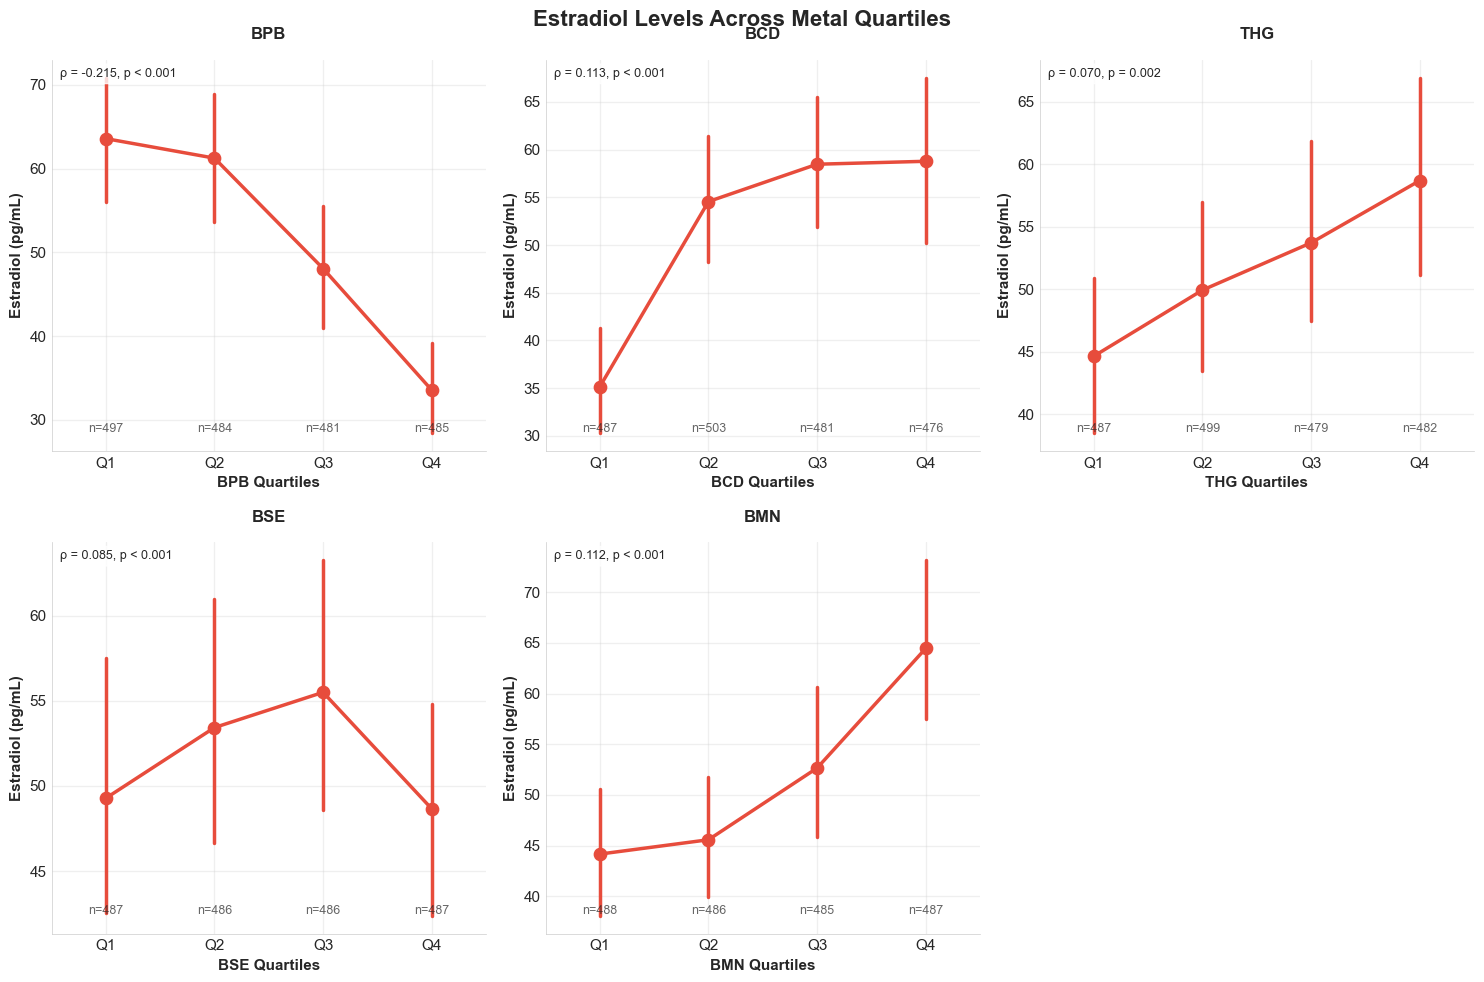

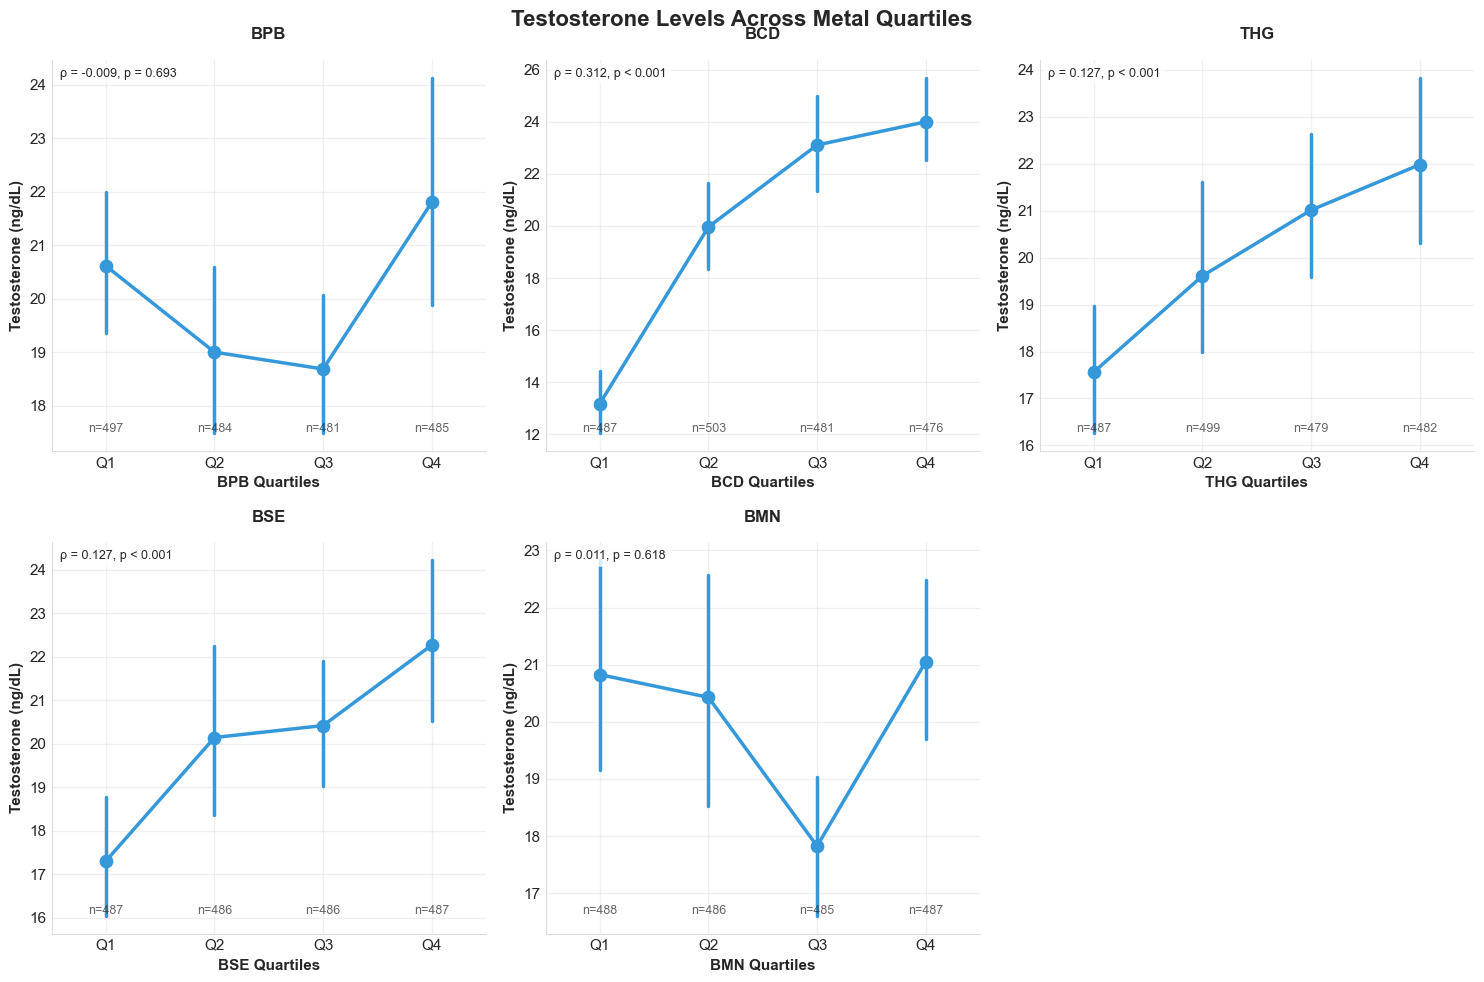


Summary Statistics:
Metal      Hormone F-statistic p-value Q1_mean Q4_mean  Q1_n  Q4_n
  BPB    Estradiol      15.222  <0.001   63.59   33.57   497   485
  BPB Testosterone       2.975   0.031   20.61   21.80   497   485
  BCD    Estradiol       9.878  <0.001   35.15   58.78   487   476
  BCD Testosterone      35.580  <0.001   13.18   24.00   487   476
  THG    Estradiol       2.729   0.043   44.65   58.68   487   482
  THG Testosterone       5.202   0.001   17.56   21.98   487   482
  BSE    Estradiol       0.840   0.472   49.28   48.66   487   487
  BSE Testosterone       5.976  <0.001   17.31   22.27   487   487
  BMN    Estradiol       6.730  <0.001   44.16   64.45   488   487
  BMN Testosterone       3.149   0.024   20.83   21.05   488   487


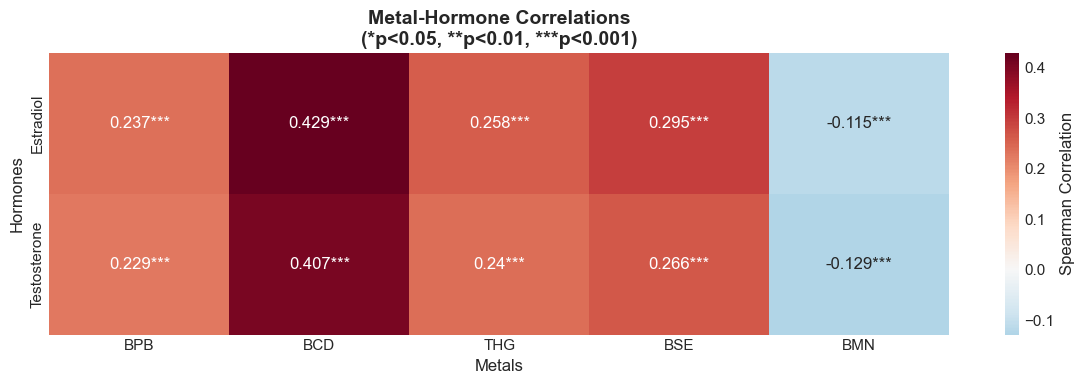

Enhanced plotting functions created!

To use:
1. create_enhanced_hormone_plots(df_female, metals)
2. summary_stats = create_summary_statistics(df_female, metals)
3. corr_matrix = create_combined_heatmap(df_male, metals)


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

def create_enhanced_hormone_plots(df_female, metals, figsize=(15, 10)):
    """
    Create enhanced plots showing hormone levels across metal quartiles
    
    Parameters:
    df_female: DataFrame with female subjects
    metals: list of metal column names
    figsize: tuple for figure size
    """
    
    # Define hormones and their properties
    hormones = {
        'LBXEST': {
            'name': 'Estradiol',
            'unit': 'pg/mL',
            'color': '#E74C3C'
        },
        'LBXTST': {
            'name': 'Testosterone', 
            'unit': 'ng/dL',
            'color': '#3498DB'
        }
    }
    
    # Calculate number of rows needed
    n_metals = len(metals)
    n_rows = (n_metals + 2) // 3  # 3 columns per row
    
    for hormone_col, hormone_info in hormones.items():
        fig, axes = plt.subplots(n_rows, 3, figsize=figsize)
        fig.suptitle(f'{hormone_info["name"]} Levels Across Metal Quartiles', 
                    fontsize=16, fontweight='bold', y=0.98)
        
        # Flatten axes array for easier indexing
        if n_rows == 1:
            axes = axes.reshape(1, -1)
        axes_flat = axes.flatten()
        
        for idx, metal in enumerate(metals):
            ax = axes_flat[idx]
            
            # Create quartiles
            qname = f"{metal}_q"
            df_female[qname] = pd.qcut(df_female[metal], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
            
            # Remove missing values for this analysis
            plot_data = df_female[[qname, hormone_col]].dropna()

            # Create the point plot
            sns.pointplot(data=plot_data, x=qname, y=hormone_col, 
                         ax=ax, errorbar=("ci", 95), 
                         color=hormone_info['color'], 
                         markers='o', linestyles='-', 
                         markersize=8, linewidth=2.5)
            
            # Customize the plot
            ax.set_xlabel(f'{metal.replace("LBX", "").replace("LBD", "")} Quartiles', 
                         fontsize=11, fontweight='semibold')
            ax.set_ylabel(f'{hormone_info["name"]} ({hormone_info["unit"]})', 
                         fontsize=11, fontweight='semibold')
            ax.set_title(f'{metal.replace("LBX", "").replace("LBD", "")}', 
                        fontsize=12, fontweight='bold', pad=15)
            
            # Add sample sizes to each quartile
            quartile_counts = plot_data[qname].value_counts().sort_index()
            for i, (quartile, count) in enumerate(quartile_counts.items()):
                ax.text(i, ax.get_ylim()[0] + (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.05, 
                       f'n={count}', ha='center', fontsize=9, alpha=0.7)
            
            # Perform trend test (Jonckheere-Terpstra test approximation)
            try:
                # Simple linear trend test
                quartile_numeric = plot_data[qname].cat.codes
                correlation, p_value = stats.spearmanr(quartile_numeric, plot_data[hormone_col])
                
                # Add trend test result
                trend_text = f'ρ = {correlation:.3f}'
                if p_value < 0.001:
                    trend_text += ', p < 0.001'
                elif p_value < 0.05:
                    trend_text += f', p = {p_value:.3f}'
                else:
                    trend_text += f', p = {p_value:.3f}'
                
                ax.text(0.02, 0.98, trend_text, transform=ax.transAxes, 
                       fontsize=9, verticalalignment='top',
                       bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
            except:
                pass
            
            # Improve grid and spines
            ax.grid(True, alpha=0.3)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)
            
        # Hide empty subplots
        for idx in range(len(metals), len(axes_flat)):
            axes_flat[idx].set_visible(False)
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.93)
        plt.show()

def create_summary_statistics(df_female, metals, hormones=['LBXEST', 'LBXTST']):
    """
    Create summary statistics table for each metal-hormone combination
    """
    hormone_names = {'LBXEST': 'Estradiol', 'LBXTST': 'Testosterone'}
    
    summary_data = []
    
    for metal in metals:
        qname = f"{metal}_q"
        df_female[qname] = pd.qcut(df_female[metal], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
        
        for hormone in hormones:
            # Calculate statistics by quartile
            stats_by_quartile = df_female.groupby(qname)[hormone].agg([
                'count', 'mean', 'std', 'median'
            ]).round(2)
            
            # Perform ANOVA
            quartile_groups = [group[hormone].dropna() for name, group in df_female.groupby(qname)]
            try:
                f_stat, p_value = stats.f_oneway(*quartile_groups)
                
                summary_data.append({
                    'Metal': metal.replace("LBX", "").replace("LBD", ""),
                    'Hormone': hormone_names[hormone],
                    'F-statistic': f'{f_stat:.3f}',
                    'p-value': f'{p_value:.3f}' if p_value >= 0.001 else '<0.001',
                    'Q1_mean': f"{stats_by_quartile.loc['Q1', 'mean']:.2f}",
                    'Q4_mean': f"{stats_by_quartile.loc['Q4', 'mean']:.2f}",
                    'Q1_n': int(stats_by_quartile.loc['Q1', 'count']),
                    'Q4_n': int(stats_by_quartile.loc['Q4', 'count'])
                })
            except:
                summary_data.append({
                    'Metal': metal.replace("LBX", "").replace("LBD", ""),
                    'Hormone': hormone_names[hormone],
                    'F-statistic': 'N/A',
                    'p-value': 'N/A',
                    'Q1_mean': f"{stats_by_quartile.loc['Q1', 'mean']:.2f}",
                    'Q4_mean': f"{stats_by_quartile.loc['Q4', 'mean']:.2f}",
                    'Q1_n': int(stats_by_quartile.loc['Q1', 'count']),
                    'Q4_n': int(stats_by_quartile.loc['Q4', 'count'])
                })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

def create_combined_heatmap(df_female, metals, hormones=['LBXEST', 'LBXTST']):
    """
    Create a heatmap showing correlations between metals and hormones
    """
    hormone_names = {'LBXEST': 'Estradiol', 'LBXTST': 'Testosterone'}
    
    # Calculate correlations
    corr_data = []
    p_values = []
    
    for hormone in hormones:
        hormone_corrs = []
        hormone_pvals = []
        for metal in metals:
            data_clean = df_male[[metal, hormone]].dropna()
            if len(data_clean) > 10:
                corr, p_val = stats.spearmanr(data_clean[metal], data_clean[hormone])
                hormone_corrs.append(corr)
                hormone_pvals.append(p_val)
            else:
                hormone_corrs.append(np.nan)
                hormone_pvals.append(np.nan)
        
        corr_data.append(hormone_corrs)
        p_values.append(hormone_pvals)
    
    # Create correlation matrix
    corr_matrix = pd.DataFrame(corr_data, 
                              columns=[m.replace("LBX", "").replace("LBD", "") for m in metals],
                              index=[hormone_names[h] for h in hormones])
    
    # Create p-value matrix for annotations
    p_matrix = pd.DataFrame(p_values,
                           columns=[m.replace("LBX", "").replace("LBD", "") for m in metals],
                           index=[hormone_names[h] for h in hormones])
    
    # Create annotations
    annotations = corr_matrix.round(3).astype(str)
    for i in range(len(hormones)):
        for j in range(len(metals)):
            if not np.isnan(p_values[i][j]):
                if p_values[i][j] < 0.001:
                    annotations.iloc[i, j] += '***'
                elif p_values[i][j] < 0.01:
                    annotations.iloc[i, j] += '**'
                elif p_values[i][j] < 0.05:
                    annotations.iloc[i, j] += '*'
    
    # Create heatmap
    plt.figure(figsize=(12, 4))
    sns.heatmap(corr_matrix, annot=annotations, fmt='', 
                center=0, cmap='RdBu_r', 
                cbar_kws={'label': 'Spearman Correlation'})
    plt.title('Metal-Hormone Correlations\n(*p<0.05, **p<0.01, ***p<0.001)', 
              fontsize=14, fontweight='bold')
    plt.ylabel('Hormones', fontsize=12)
    plt.xlabel('Metals', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    return corr_matrix

# Usage example:
create_enhanced_hormone_plots(df_female, metals)
summary_stats = create_summary_statistics(df_female, metals)
print("\nSummary Statistics:")
print(summary_stats.to_string(index=False))
corr_matrix = create_combined_heatmap(df_female, metals)

print("Enhanced plotting functions created!")
print("\nTo use:")
print("1. create_enhanced_hormone_plots(df_female, metals)")
print("2. summary_stats = create_summary_statistics(df_female, metals)")  
print("3. corr_matrix = create_combined_heatmap(df_male, metals)")

In [35]:
# Compute Free Androgen Index (FAI)
df_male = df_male.copy()

# Convert Testosterone from ng/dL to nmol/L (if needed)
df_male["T_nmolL"] = df_male["LBXTST"] * 0.0347

# Calculate FAI
df_male["FAI"] = (df_male["T_nmolL"] / df_male["LBXSHBG"]) * 100

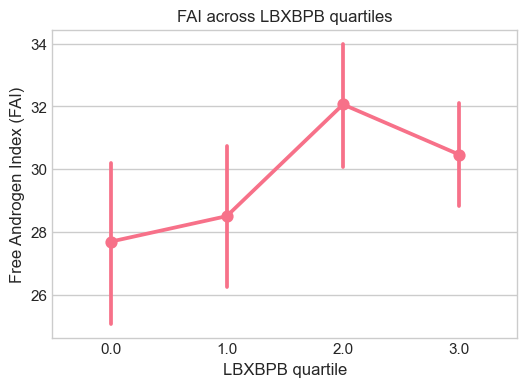

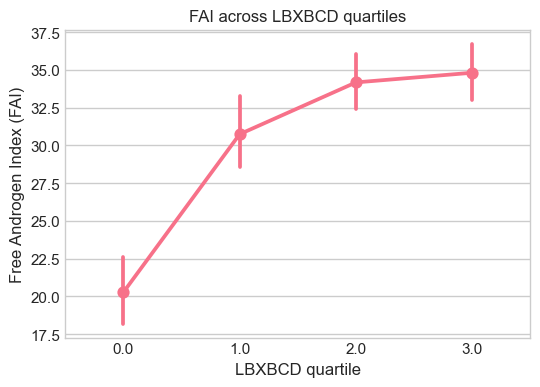

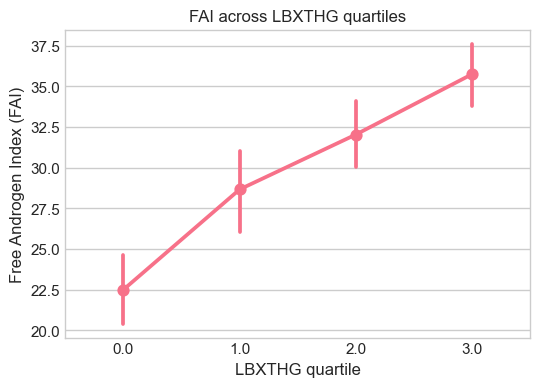

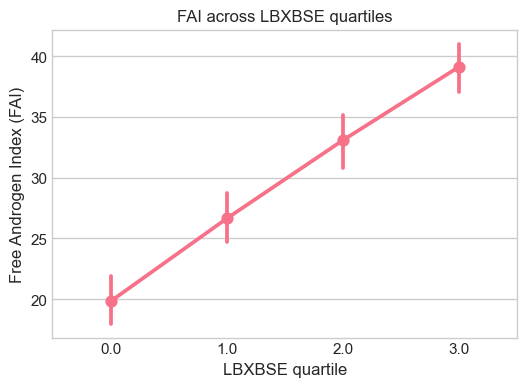

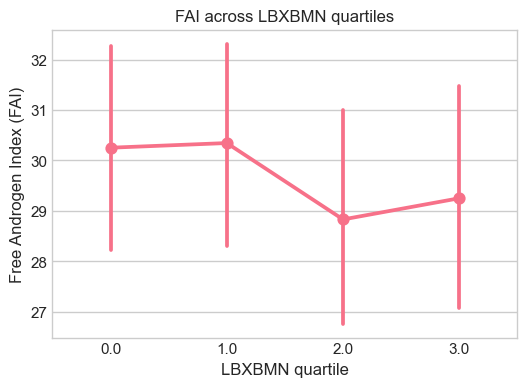

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

metals = ["LBXBPB","LBXBCD","LBXTHG","LBXBSE","LBXBMN"]

for m in metals:
    qname = f"{m}_q"
    df_male[qname] = pd.qcut(df_male[m], 4, labels=False)

    plt.figure(figsize=(6,4))
    sns.pointplot(x=qname, y="FAI", data=df_male, errorbar=("ci",95))
    plt.xlabel(f"{m} quartile")
    plt.ylabel("Free Androgen Index (FAI)")
    plt.title(f"FAI across {m} quartiles")
    plt.show()


🎓 Education Level × Metals

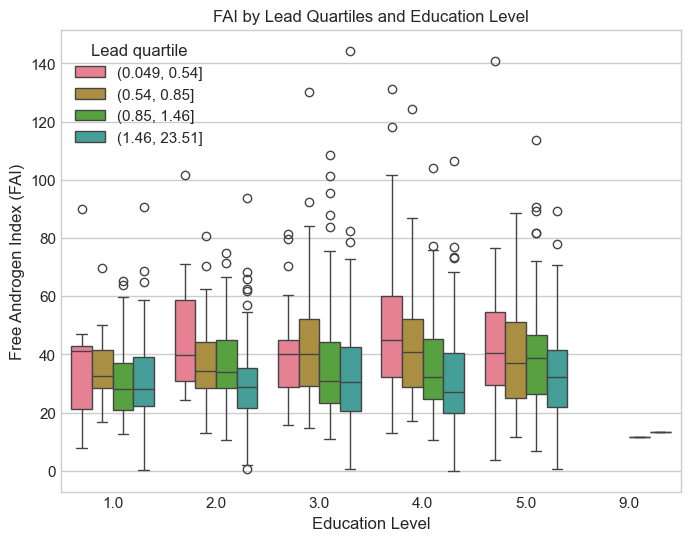

In [37]:
plt.figure(figsize=(8,6))
sns.boxplot(x="DMDEDUC2", y="FAI", hue=pd.qcut(df_male["LBXBPB"],4), data=df_male)
plt.xlabel("Education Level")
plt.ylabel("Free Androgen Index (FAI)")
plt.title("FAI by Lead Quartiles and Education Level")
plt.legend(title="Lead quartile")
plt.show()

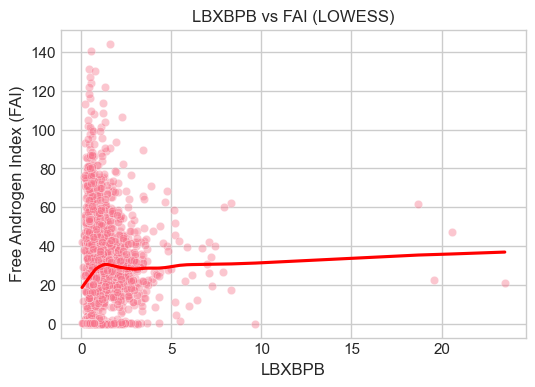

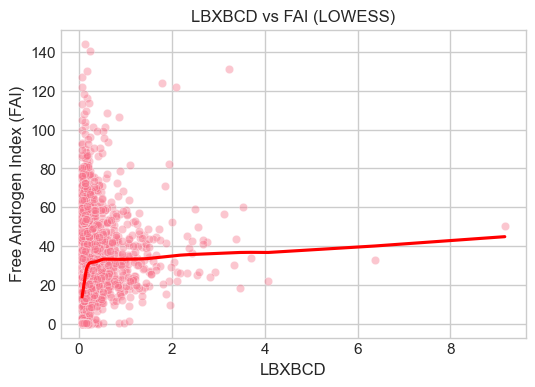

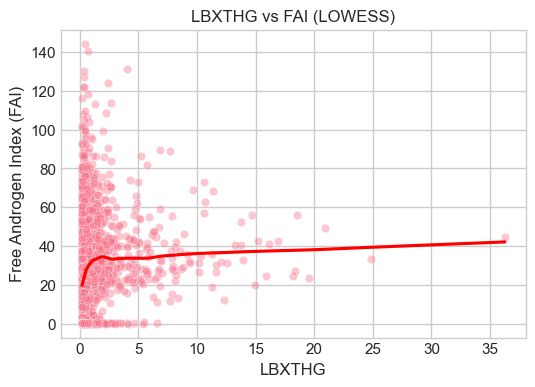

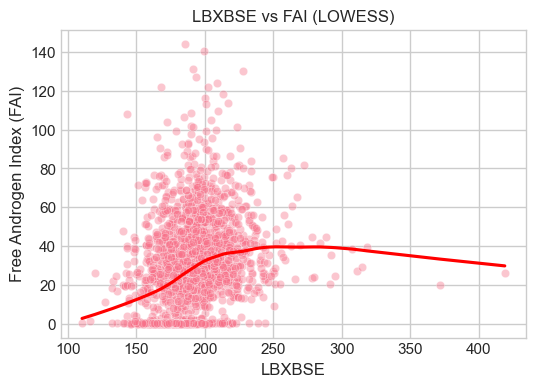

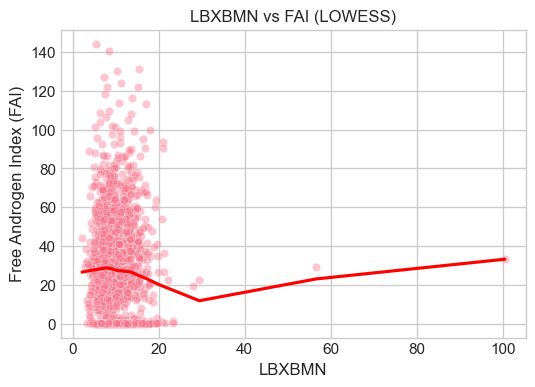

In [38]:
for m in metals:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=m, y="FAI", data=df_male, alpha=0.4)
    sns.regplot(x=m, y="FAI", data=df_male, lowess=True, scatter=False, color="red")
    plt.xlabel(m)
    plt.ylabel("Free Androgen Index (FAI)")
    plt.title(f"{m} vs FAI (LOWESS)")
    plt.show()


<Figure size 1000x600 with 0 Axes>

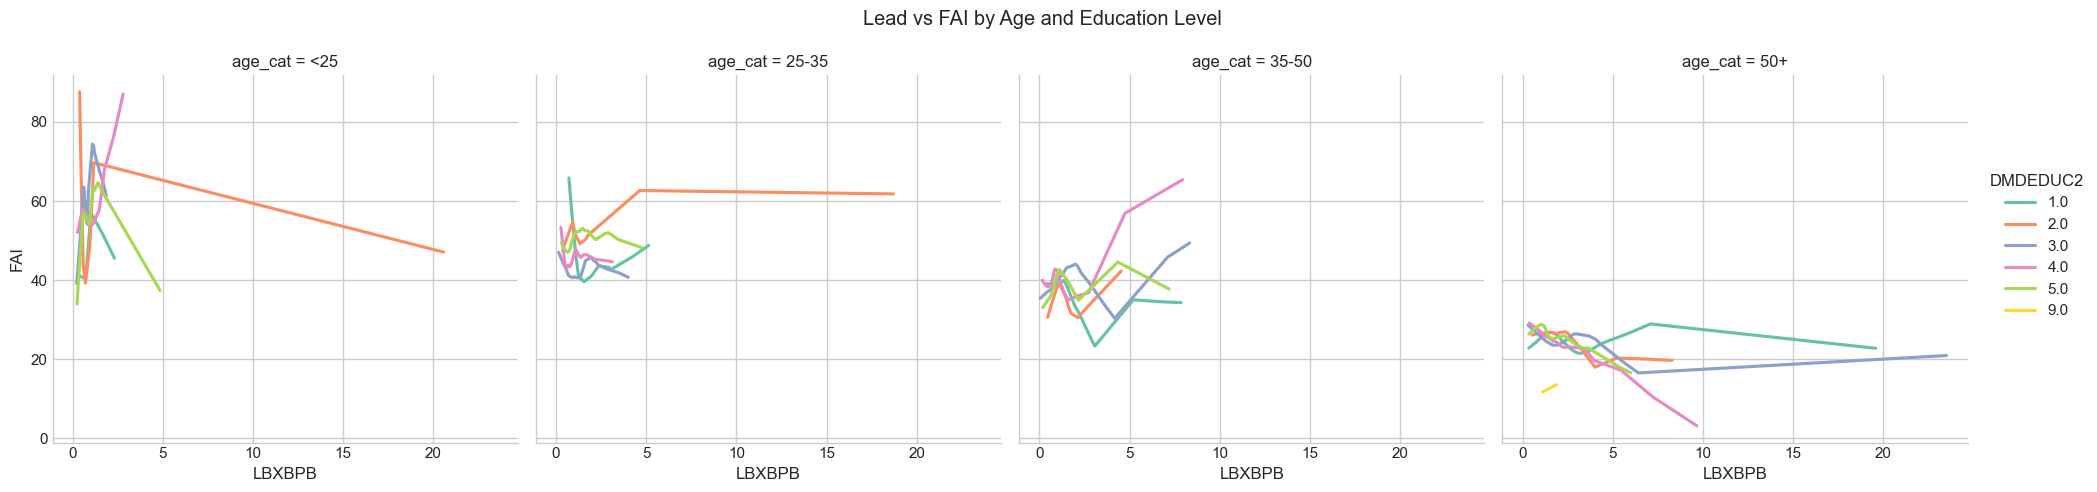

In [39]:
df_male["age_cat"] = pd.cut(df_male["RIDAGEYR"], bins=[0,25,35,50,80], labels=["<25","25-35","35-50","50+"])

plt.figure(figsize=(10,6))
sns.lmplot(
    data=df_male, x="LBXBPB", y="FAI",
    col="age_cat", hue="DMDEDUC2",
    lowess=True, scatter=False, palette="Set2"
)
plt.subplots_adjust(top=0.85)
plt.suptitle("Lead vs FAI by Age and Education Level")
plt.show()


<Figure size 700x500 with 0 Axes>

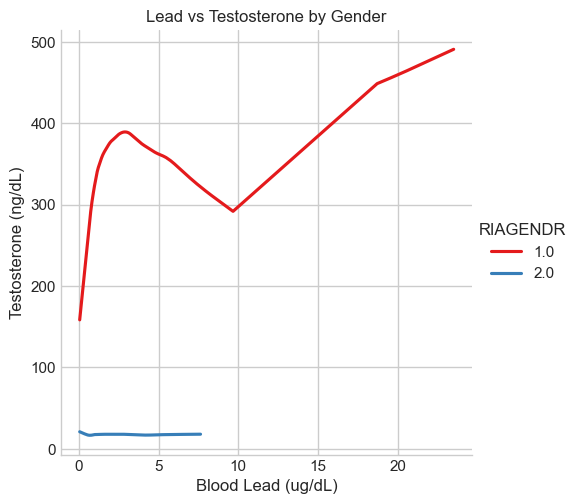

<Figure size 700x500 with 0 Axes>

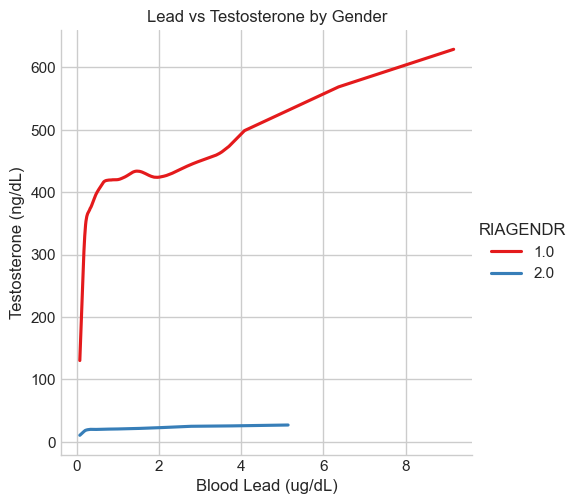

<Figure size 700x500 with 0 Axes>

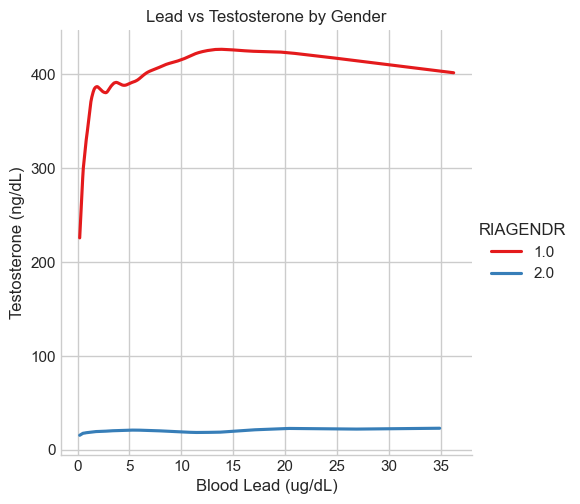

<Figure size 700x500 with 0 Axes>

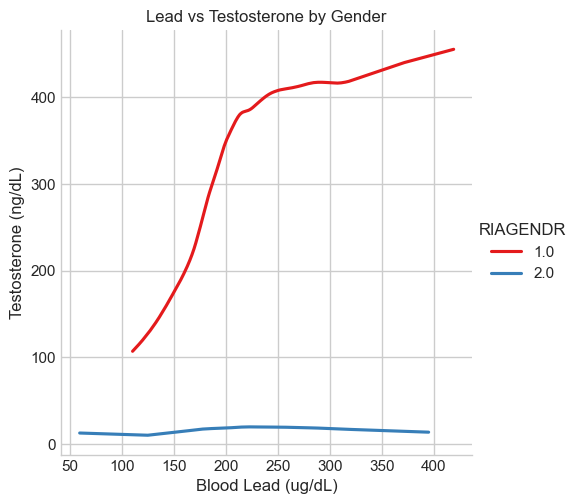

<Figure size 700x500 with 0 Axes>

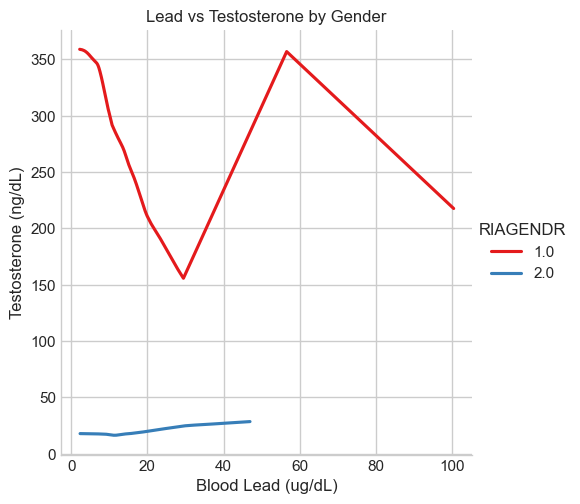

In [40]:
for m in metals:
    plt.figure(figsize=(7,5))
    sns.lmplot(x=m, y="LBXTST", hue="RIAGENDR", data=df, 
            lowess=True, scatter=False, palette="Set1")
    plt.xlabel("Blood Lead (ug/dL)")
    plt.ylabel("Testosterone (ng/dL)")
    plt.title("Lead vs Testosterone by Gender")
    plt.show()


<Figure size 700x500 with 0 Axes>

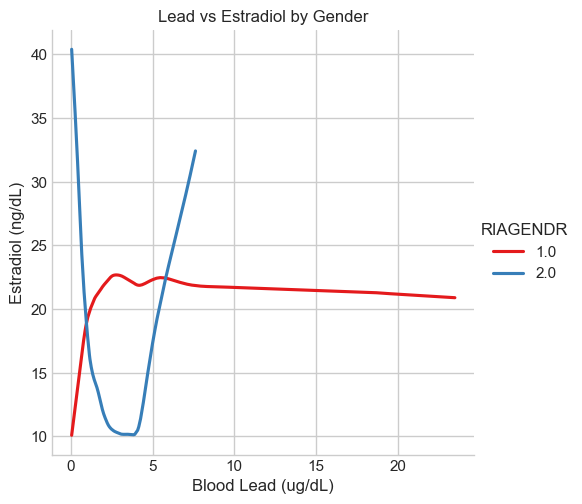

<Figure size 700x500 with 0 Axes>

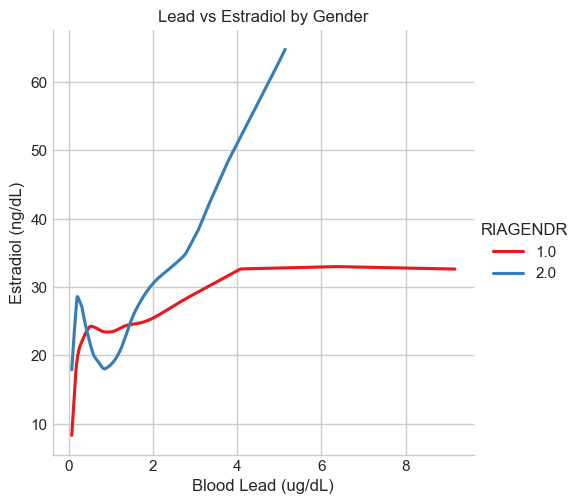

<Figure size 700x500 with 0 Axes>

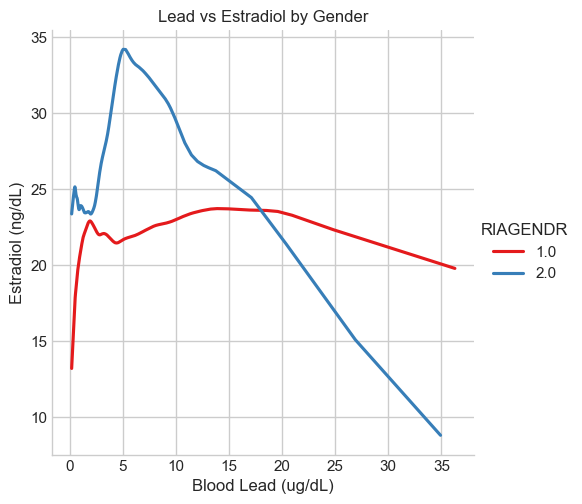

<Figure size 700x500 with 0 Axes>

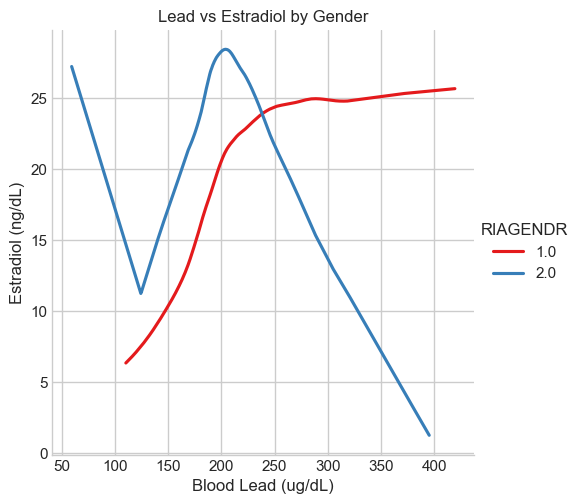

<Figure size 700x500 with 0 Axes>

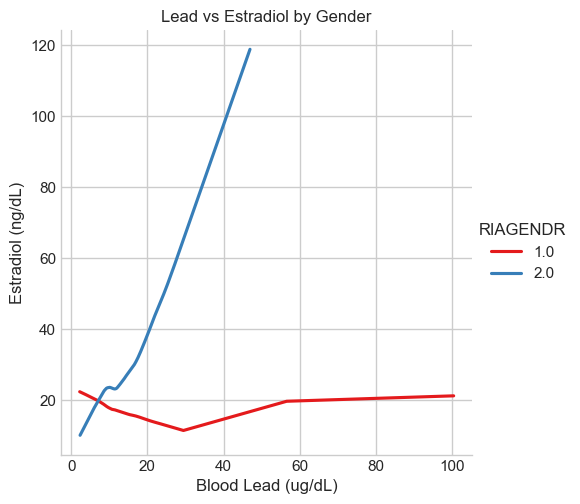

In [41]:
for m in metals:
    plt.figure(figsize=(7,5))
    sns.lmplot(x=m, y="LBXEST", hue="RIAGENDR", data=df, 
            lowess=True, scatter=False, palette="Set1")
    plt.xlabel("Blood Lead (ug/dL)")
    plt.ylabel("Estradiol (ng/dL)")
    plt.title("Lead vs Estradiol by Gender")
    plt.show()


In [42]:
df = df_3.copy()

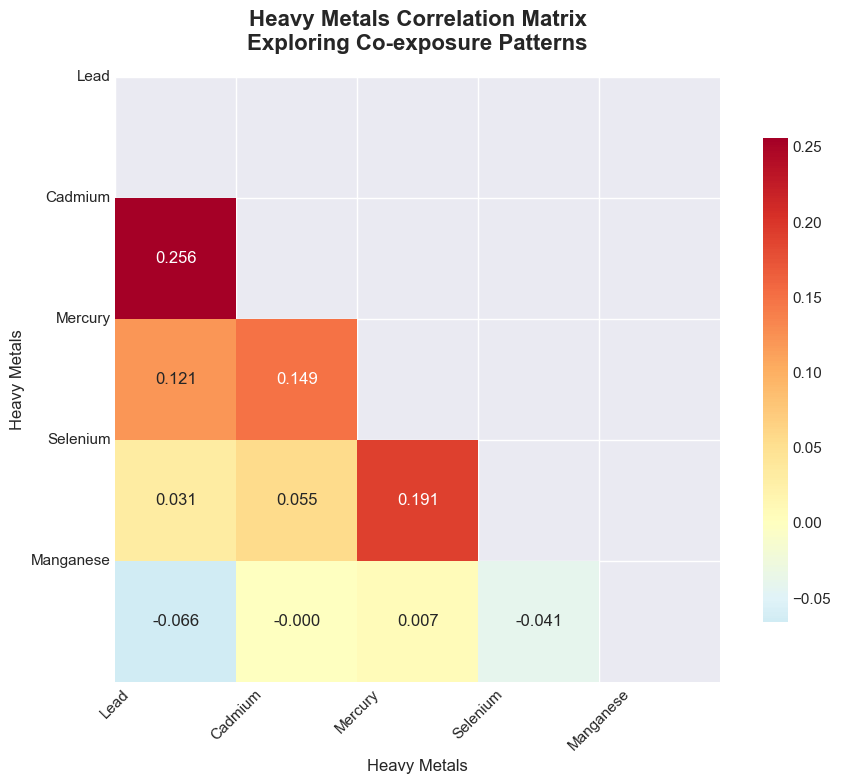

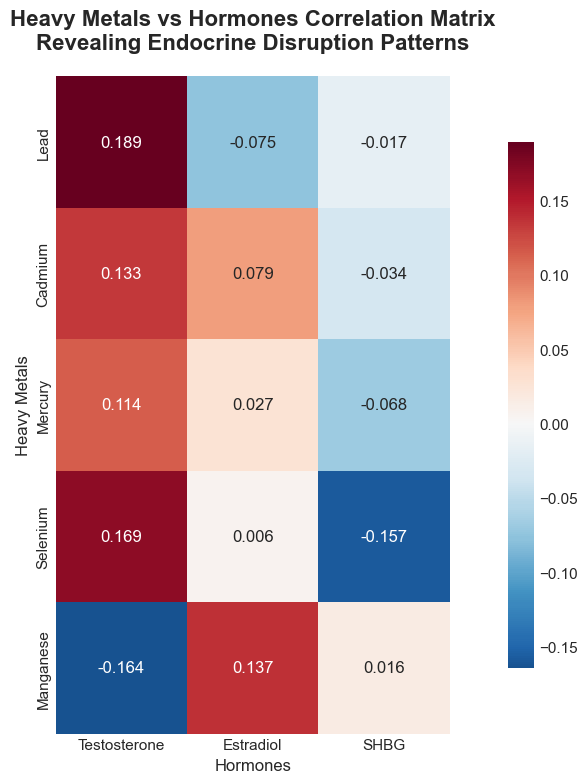

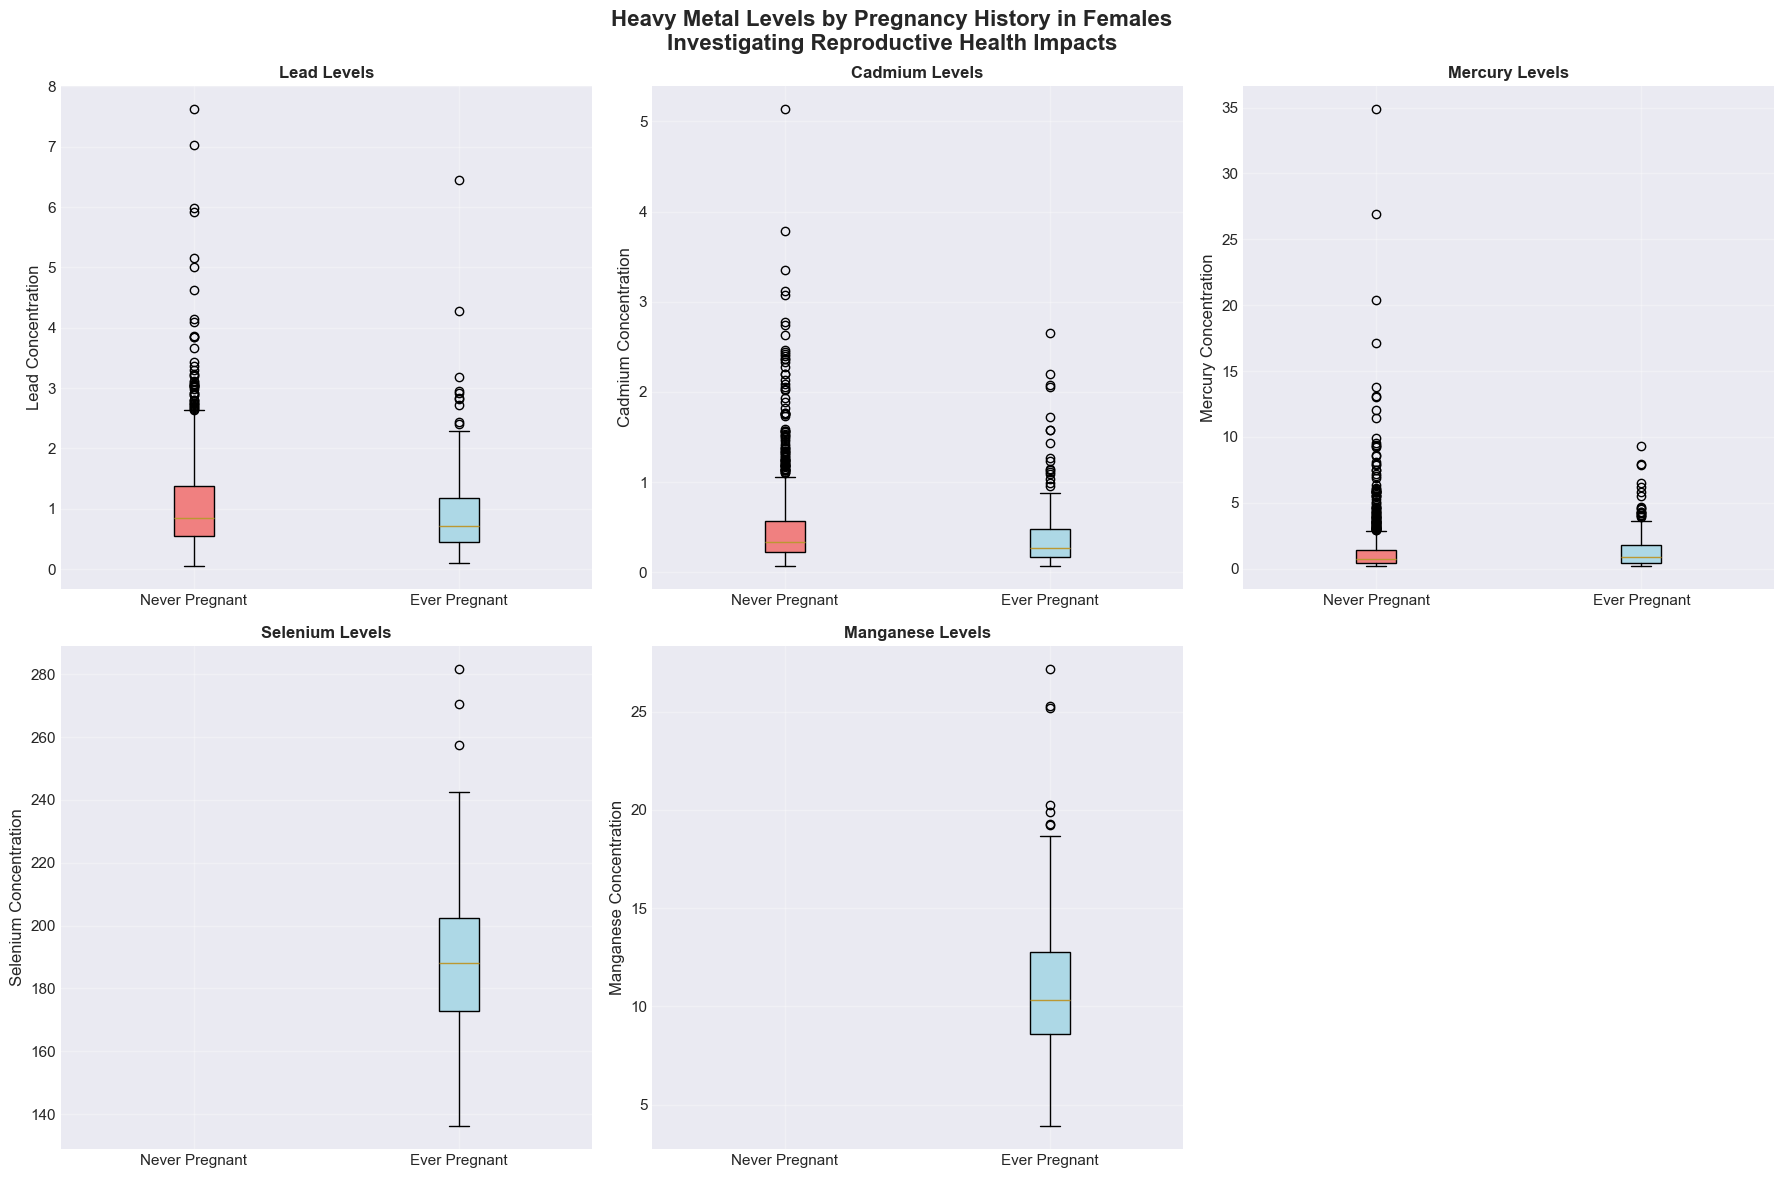

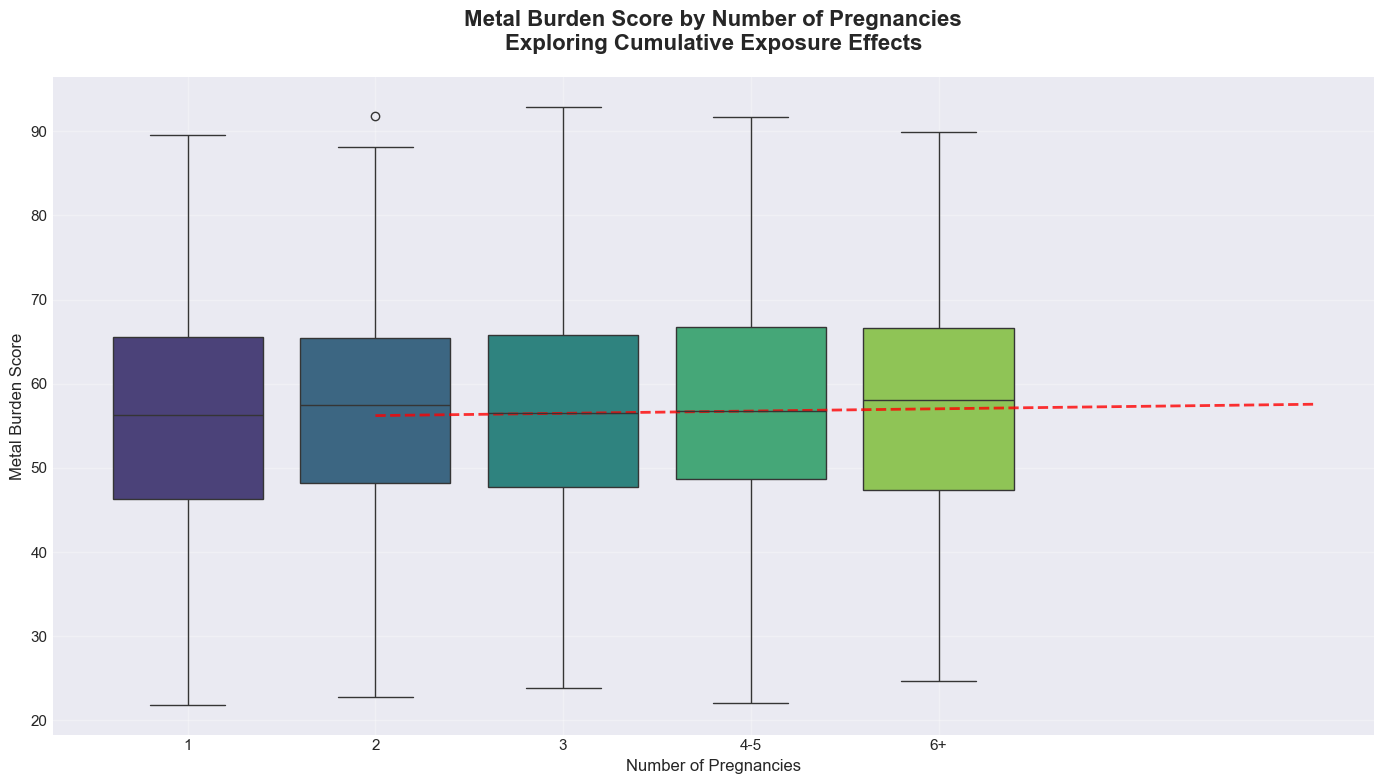

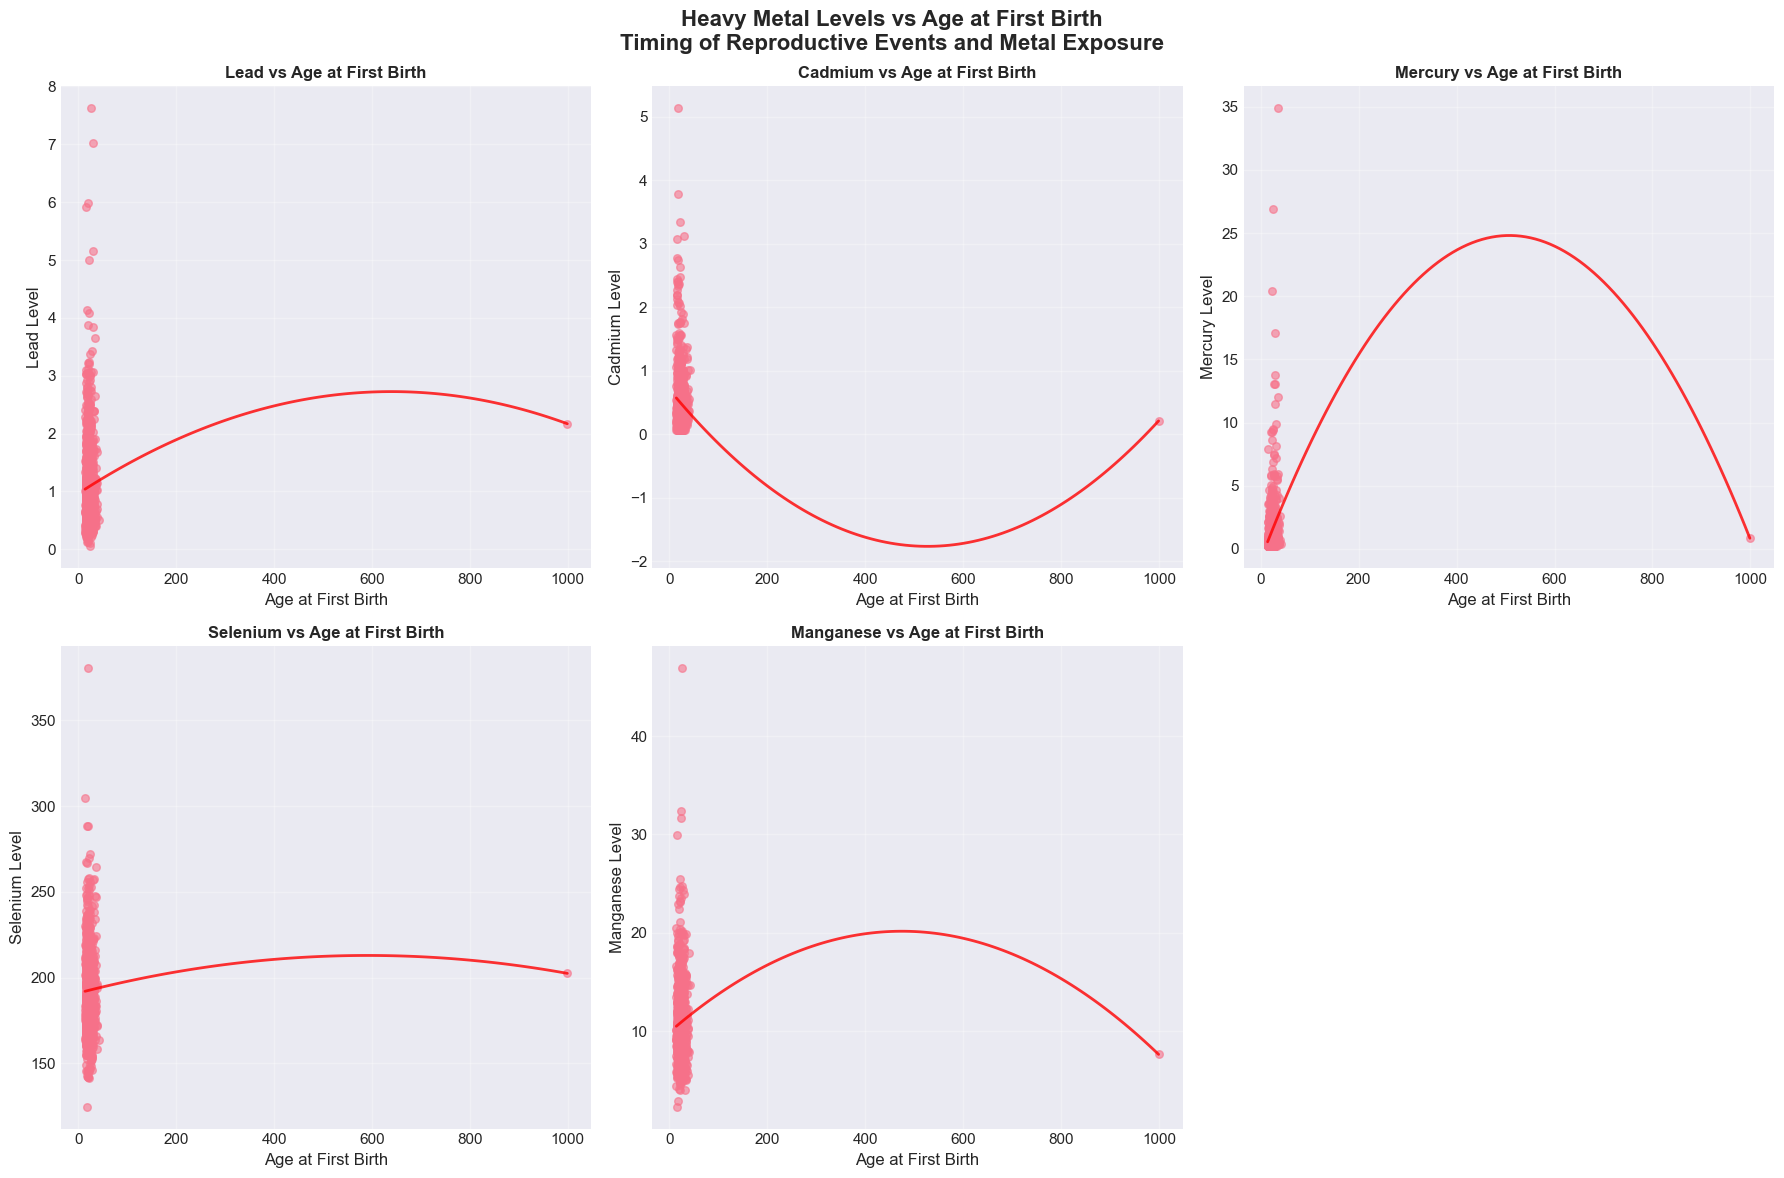

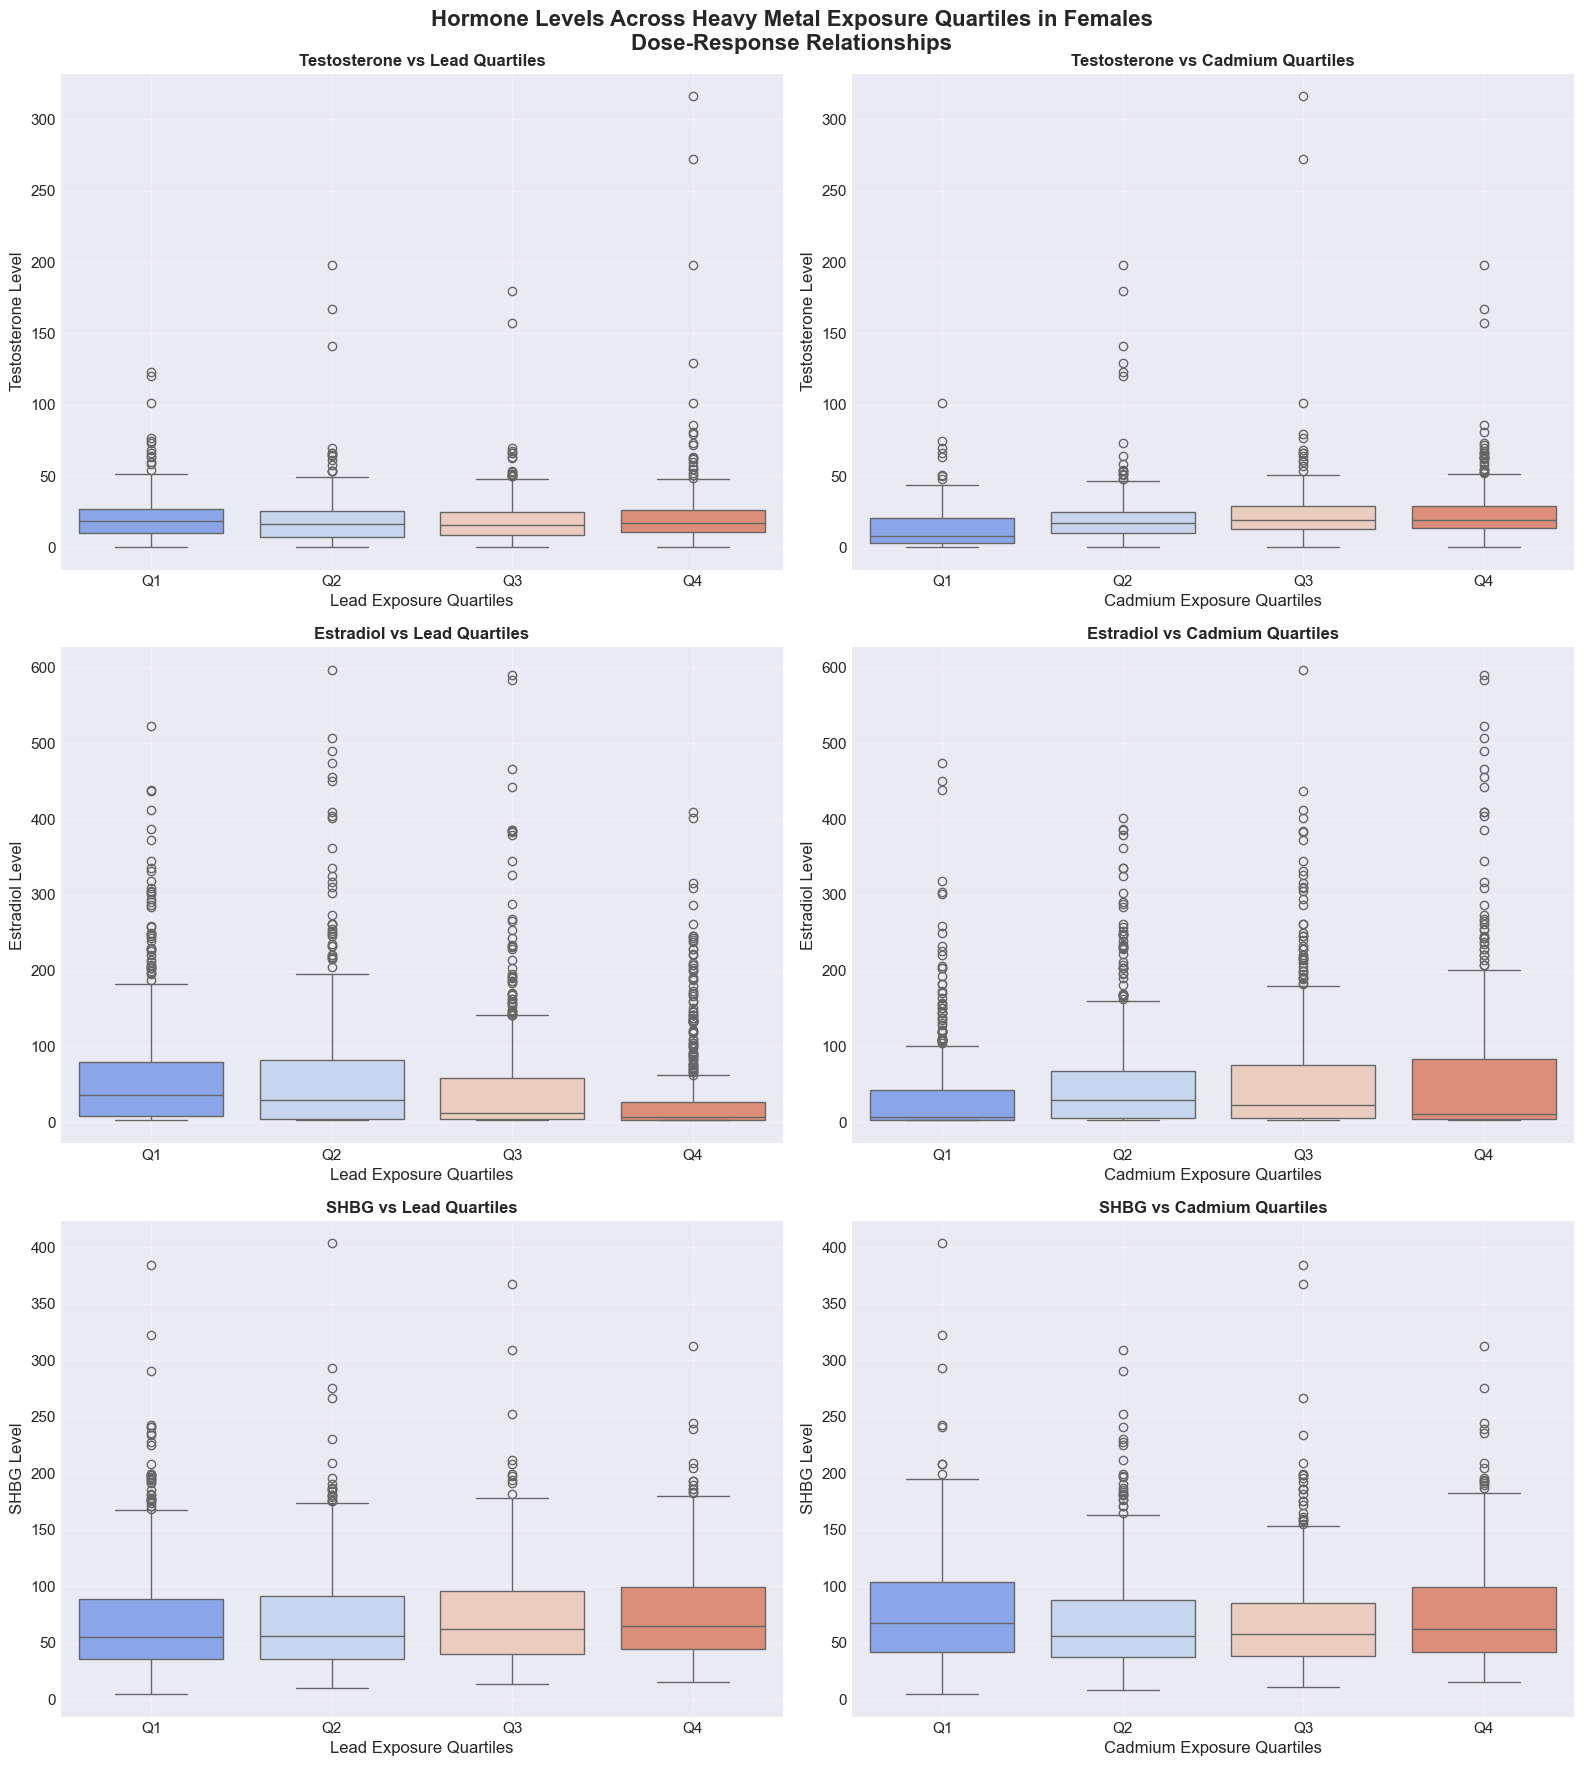

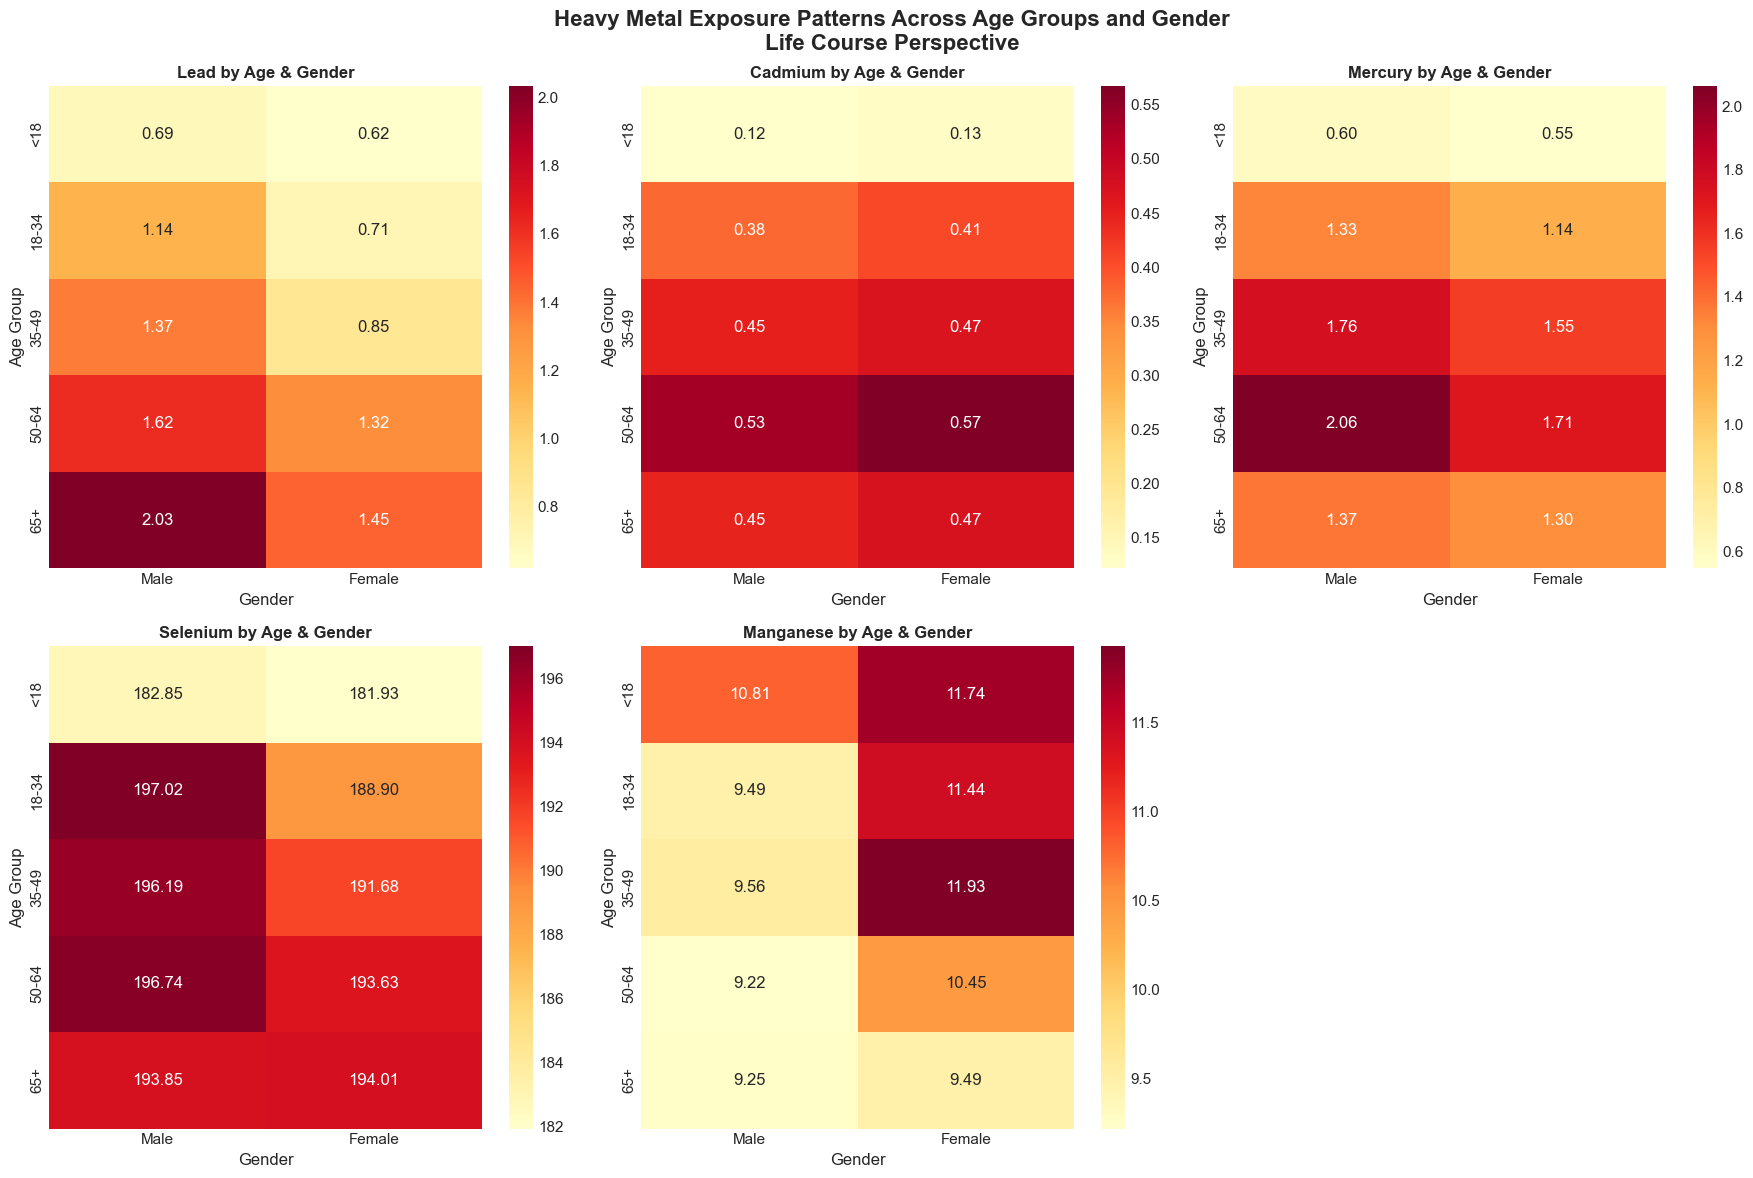

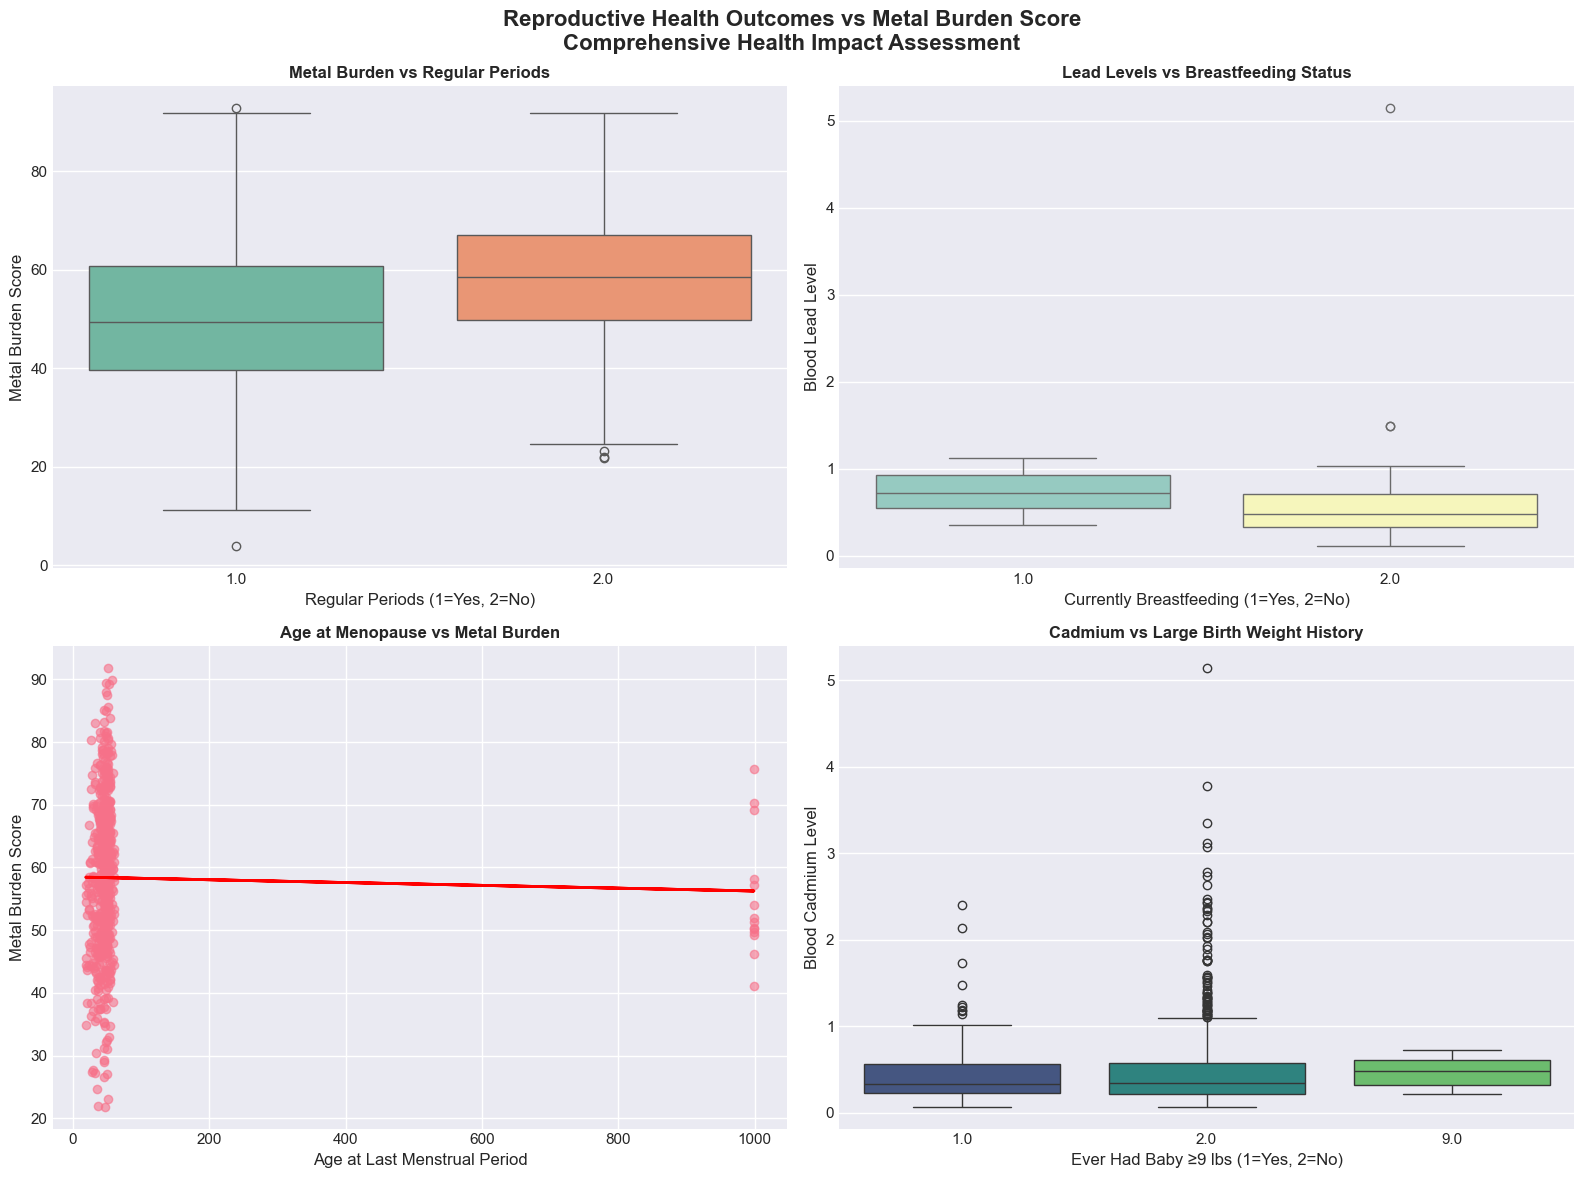

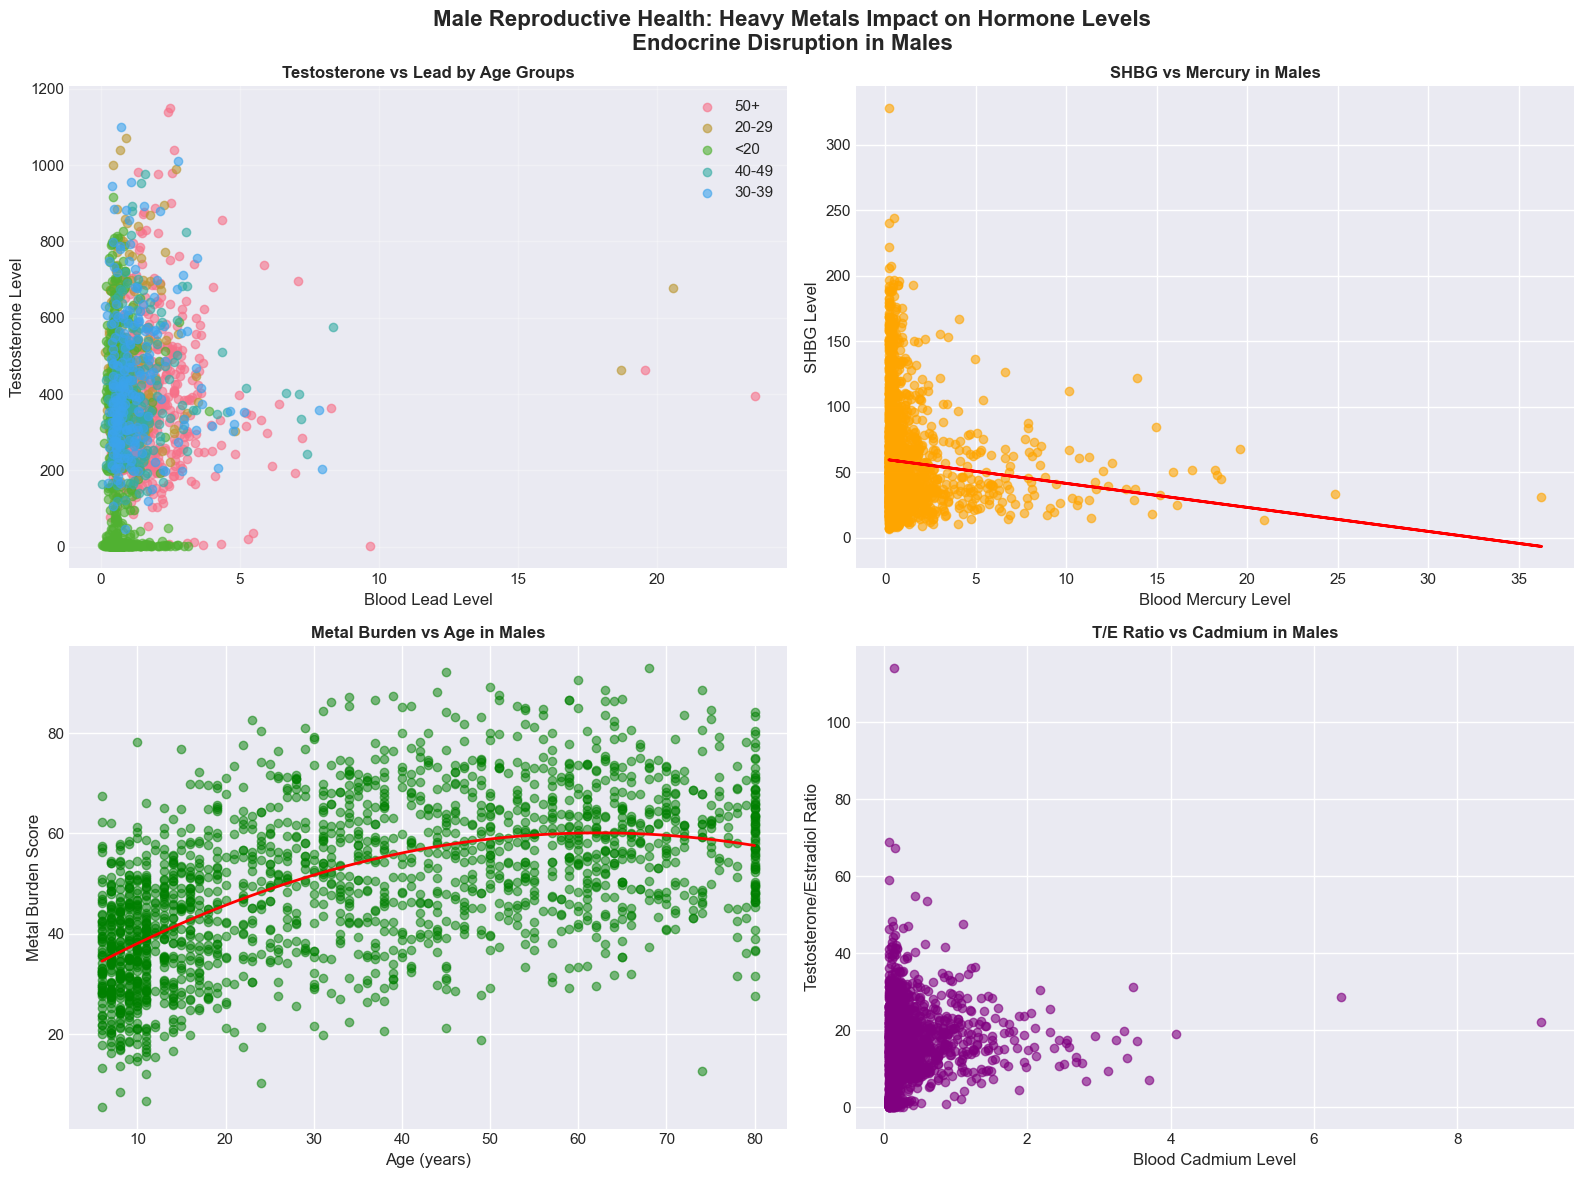

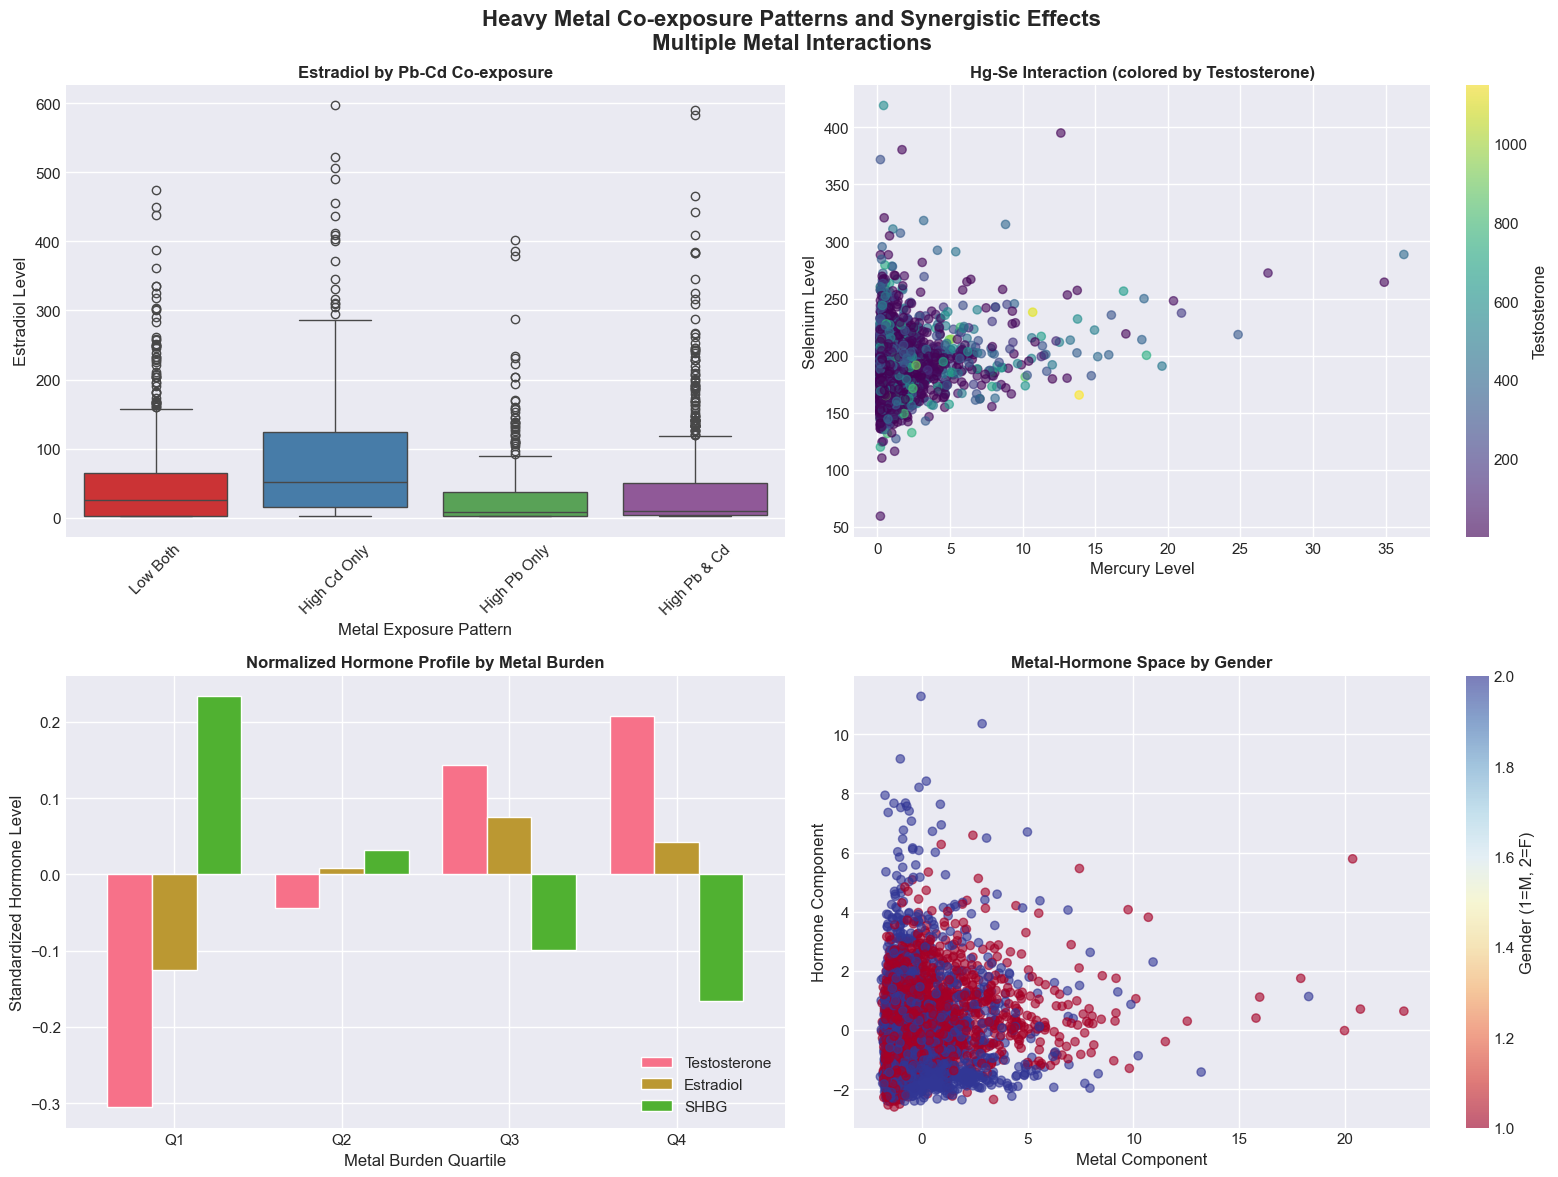

=== SUMMARY STATISTICS ===
Dataset shape: (3881, 118)
Female participants: 1947
Male participants: 1934

Metal-Hormone Correlations (All participants):
Lead - Testosterone: r=0.189, p=0.000
Cadmium - Testosterone: r=0.133, p=0.000
Mercury - Testosterone: r=0.114, p=0.000
Selenium - Testosterone: r=0.169, p=0.000
Selenium - SHBG: r=-0.157, p=0.000
Manganese - Testosterone: r=-0.164, p=0.000
Manganese - Estradiol: r=0.137, p=0.000


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for beautiful plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Assuming your dataframe is named 'df'
# Define metal and hormone columns
metal_cols = ['LBXBPB', 'LBXBCD', 'LBXTHG', 'LBXBSE', 'LBXBMN']
hormone_cols = ['LBXTST', 'LBXEST', 'LBXSHBG']
metal_names = ['Lead', 'Cadmium', 'Mercury', 'Selenium', 'Manganese']
hormone_names = ['Testosterone', 'Estradiol', 'SHBG']

# Create derived features
df['metal_burden_score'] = (df[metal_cols].rank(pct=True).mean(axis=1) * 100).round(2)
df['hormone_balance_ratio'] = df['LBXEST'] / (df['LBXTST'] + 1)  # +1 to avoid division by zero
df['reproductive_age_group'] = pd.cut(df['RIDAGEYR'], bins=[0, 20, 30, 40, 50, 100], 
                                    labels=['<20', '20-29', '30-39', '40-49', '50+'])

# Filter for females
females = df[df['RIAGENDR'] == 2].copy()

# =============================================================================
# PLOT 1: Heavy Metals Correlation Matrix
# =============================================================================
plt.figure(figsize=(10, 8))
metal_corr = df[metal_cols].corr()
mask = np.triu(np.ones_like(metal_corr, dtype=bool))
sns.heatmap(metal_corr, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
           square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('Heavy Metals Correlation Matrix\nExploring Co-exposure Patterns', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Heavy Metals', fontsize=12)
plt.ylabel('Heavy Metals', fontsize=12)
plt.xticks(range(len(metal_names)), metal_names, rotation=45)
plt.yticks(range(len(metal_names)), metal_names, rotation=0)
plt.tight_layout()
plt.show()

# =============================================================================
# PLOT 2: Metal-Hormone Cross-Correlation Heatmap
# =============================================================================
plt.figure(figsize=(12, 8))
cross_corr = np.zeros((len(metal_cols), len(hormone_cols)))
p_values = np.zeros((len(metal_cols), len(hormone_cols)))

for i, metal in enumerate(metal_cols):
    for j, hormone in enumerate(hormone_cols):
        valid_data = df[[metal, hormone]].dropna()
        if len(valid_data) > 10:
            corr, p_val = pearsonr(valid_data[metal], valid_data[hormone])
            cross_corr[i, j] = corr
            p_values[i, j] = p_val

sns.heatmap(cross_corr, annot=True, cmap='RdBu_r', center=0,
           xticklabels=hormone_names, yticklabels=metal_names,
           square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('Heavy Metals vs Hormones Correlation Matrix\nRevealing Endocrine Disruption Patterns', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Hormones', fontsize=12)
plt.ylabel('Heavy Metals', fontsize=12)
plt.tight_layout()
plt.show()

# =============================================================================
# PLOT 3: Metal Burden by Pregnancy History (Females)
# =============================================================================
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Heavy Metal Levels by Pregnancy History in Females\nInvestigating Reproductive Health Impacts', 
             fontsize=16, fontweight='bold')

for i, (metal, name) in enumerate(zip(metal_cols, metal_names)):
    row, col = i // 3, i % 3
    ax = axes[row, col] if i < 3 else axes[1, i-3]
    
    pregnant_data = females.groupby('RHQ131')[metal].apply(list)
    if len(pregnant_data) > 1:
        data_to_plot = [pregnant_data.iloc[0], pregnant_data.iloc[1]]
        labels = ['Never Pregnant', 'Ever Pregnant']
        
        bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True)
        colors = ['lightcoral', 'lightblue']
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
        
        ax.set_title(f'{name} Levels', fontweight='bold')
        ax.set_ylabel(f'{name} Concentration')
        ax.grid(True, alpha=0.3)

# Remove empty subplot
if len(metal_cols) == 5:
    axes[1, 2].remove()

plt.tight_layout()
plt.show()

# =============================================================================
# PLOT 4: Number of Pregnancies vs Metal Burden Score
# =============================================================================
plt.figure(figsize=(14, 8))
pregnancy_metals = females.dropna(subset=['RHQ160', 'metal_burden_score'])

if len(pregnancy_metals) > 0:
    # Create bins for number of pregnancies
    pregnancy_metals['pregnancy_bins'] = pd.cut(pregnancy_metals['RHQ160'], 
                                               bins=[0, 1, 2, 3, 5, 20], 
                                               labels=['1', '2', '3', '4-5', '6+'])
    
    sns.boxplot(data=pregnancy_metals, x='pregnancy_bins', y='metal_burden_score', 
                palette='viridis')
    plt.title('Metal Burden Score by Number of Pregnancies\nExploring Cumulative Exposure Effects', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Number of Pregnancies', fontsize=12)
    plt.ylabel('Metal Burden Score', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Add trend line
    x_numeric = pregnancy_metals['RHQ160']
    y_numeric = pregnancy_metals['metal_burden_score']
    z = np.polyfit(x_numeric, y_numeric, 1)
    p = np.poly1d(z)
    plt.plot(range(1, 7), [p(i) for i in range(1, 7)], "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

# =============================================================================
# PLOT 5: Age at First Birth vs Heavy Metals
# =============================================================================
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Heavy Metal Levels vs Age at First Birth\nTiming of Reproductive Events and Metal Exposure', 
             fontsize=16, fontweight='bold')

birth_data = females.dropna(subset=['RHD180'])

for i, (metal, name) in enumerate(zip(metal_cols, metal_names)):
    row, col = i // 3, i % 3
    ax = axes[row, col] if i < 3 else axes[1, i-3]
    
    valid_data = birth_data.dropna(subset=[metal])
    if len(valid_data) > 10:
        ax.scatter(valid_data['RHD180'], valid_data[metal], alpha=0.6, s=30)
        
        # Add smooth fit line
        z = np.polyfit(valid_data['RHD180'], valid_data[metal], 2)
        p = np.poly1d(z)
        x_smooth = np.linspace(valid_data['RHD180'].min(), valid_data['RHD180'].max(), 100)
        ax.plot(x_smooth, p(x_smooth), 'r-', linewidth=2, alpha=0.8)
        
        ax.set_title(f'{name} vs Age at First Birth', fontweight='bold')
        ax.set_xlabel('Age at First Birth')
        ax.set_ylabel(f'{name} Level')
        ax.grid(True, alpha=0.3)

# Remove empty subplot
if len(metal_cols) == 5:
    axes[1, 2].remove()

plt.tight_layout()
plt.show()

# =============================================================================
# PLOT 6: Hormone Levels by Metal Exposure Quartiles (Females)
# =============================================================================
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('Hormone Levels Across Heavy Metal Exposure Quartiles in Females\nDose-Response Relationships', 
             fontsize=16, fontweight='bold')

metals_subset = ['LBXBPB', 'LBXBCD']  # Focus on lead and cadmium for clarity
metals_names_subset = ['Lead', 'Cadmium']

for i, hormone in enumerate(hormone_cols):
    for j, (metal, metal_name) in enumerate(zip(metals_subset, metals_names_subset)):
        ax = axes[i, j]
        
        data_subset = females.dropna(subset=[hormone, metal])
        if len(data_subset) > 20:
            # Create quartiles
            data_subset['metal_quartile'] = pd.qcut(data_subset[metal], 4, 
                                                  labels=['Q1', 'Q2', 'Q3', 'Q4'])
            
            sns.boxplot(data=data_subset, x='metal_quartile', y=hormone, ax=ax, 
                       palette='coolwarm')
            ax.set_title(f'{hormone_names[i]} vs {metal_name} Quartiles', fontweight='bold')
            ax.set_xlabel(f'{metal_name} Exposure Quartiles')
            ax.set_ylabel(f'{hormone_names[i]} Level')
            ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# PLOT 7: Metal Exposure by Age Groups and Gender
# =============================================================================
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Heavy Metal Exposure Patterns Across Age Groups and Gender\nLife Course Perspective', 
             fontsize=16, fontweight='bold')

df['age_group'] = pd.cut(df['RIDAGEYR'], bins=[0, 18, 35, 50, 65, 100], 
                        labels=['<18', '18-34', '35-49', '50-64', '65+'])

for i, (metal, name) in enumerate(zip(metal_cols, metal_names)):
    row, col = i // 3, i % 3
    ax = axes[row, col] if i < 3 else axes[1, i-3]
    
    data_subset = df.dropna(subset=[metal, 'age_group'])
    if len(data_subset) > 0:
        # Create pivot table for heatmap
        pivot_data = data_subset.groupby(['age_group', 'RIAGENDR'])[metal].mean().unstack()
        pivot_data.columns = ['Male', 'Female']
        
        sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='YlOrRd', ax=ax)
        ax.set_title(f'{name} by Age & Gender', fontweight='bold')
        ax.set_xlabel('Gender')
        ax.set_ylabel('Age Group')

# Remove empty subplot
if len(metal_cols) == 5:
    axes[1, 2].remove()

plt.tight_layout()
plt.show()

# =============================================================================
# PLOT 8: Reproductive Health Indicators vs Metal Burden
# =============================================================================
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Reproductive Health Outcomes vs Metal Burden Score\nComprehensive Health Impact Assessment', 
             fontsize=16, fontweight='bold')

# Menstrual regularity vs metal burden
regular_periods = females.dropna(subset=['RHQ031', 'metal_burden_score'])
if len(regular_periods) > 0:
    sns.boxplot(data=regular_periods, x='RHQ031', y='metal_burden_score', 
               ax=axes[0, 0], palette='Set2')
    axes[0, 0].set_title('Metal Burden vs Regular Periods', fontweight='bold')
    axes[0, 0].set_xlabel('Regular Periods (1=Yes, 2=No)')
    axes[0, 0].set_ylabel('Metal Burden Score')

# Breastfeeding vs metal levels
breastfeeding = females.dropna(subset=['RHQ200', 'LBXBPB'])
if len(breastfeeding) > 0:
    sns.boxplot(data=breastfeeding, x='RHQ200', y='LBXBPB', 
               ax=axes[0, 1], palette='Set3')
    axes[0, 1].set_title('Lead Levels vs Breastfeeding Status', fontweight='bold')
    axes[0, 1].set_xlabel('Currently Breastfeeding (1=Yes, 2=No)')
    axes[0, 1].set_ylabel('Blood Lead Level')

# Age at menopause vs metal burden
menopause = females.dropna(subset=['RHQ060', 'metal_burden_score'])
menopause = menopause[menopause['RHQ060'] > 0]
if len(menopause) > 10:
    axes[1, 0].scatter(menopause['RHQ060'], menopause['metal_burden_score'], alpha=0.6)
    z = np.polyfit(menopause['RHQ060'], menopause['metal_burden_score'], 1)
    p = np.poly1d(z)
    axes[1, 0].plot(menopause['RHQ060'], p(menopause['RHQ060']), 'r-', linewidth=2)
    axes[1, 0].set_title('Age at Menopause vs Metal Burden', fontweight='bold')
    axes[1, 0].set_xlabel('Age at Last Menstrual Period')
    axes[1, 0].set_ylabel('Metal Burden Score')

# Birth weight vs maternal metals
birth_weight = females.dropna(subset=['RHQ172', 'LBXBCD'])
if len(birth_weight) > 0:
    sns.boxplot(data=birth_weight, x='RHQ172', y='LBXBCD', 
               ax=axes[1, 1], palette='viridis')
    axes[1, 1].set_title('Cadmium vs Large Birth Weight History', fontweight='bold')
    axes[1, 1].set_xlabel('Ever Had Baby ≥9 lbs (1=Yes, 2=No)')
    axes[1, 1].set_ylabel('Blood Cadmium Level')

plt.tight_layout()
plt.show()

# =============================================================================
# PLOT 9: Male Fertility Indicators vs Heavy Metals
# =============================================================================
males = df[df['RIAGENDR'] == 1].copy()
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Male Reproductive Health: Heavy Metals Impact on Hormone Levels\nEndocrine Disruption in Males', 
             fontsize=16, fontweight='bold')

# Testosterone vs Lead by age groups
male_testo = males.dropna(subset=['LBXTST', 'LBXBPB', 'reproductive_age_group'])
if len(male_testo) > 0:
    for age_group in male_testo['reproductive_age_group'].unique():
        subset = male_testo[male_testo['reproductive_age_group'] == age_group]
        axes[0, 0].scatter(subset['LBXBPB'], subset['LBXTST'], alpha=0.6, label=age_group)
    axes[0, 0].set_title('Testosterone vs Lead by Age Groups', fontweight='bold')
    axes[0, 0].set_xlabel('Blood Lead Level')
    axes[0, 0].set_ylabel('Testosterone Level')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

# SHBG vs Mercury
male_shbg = males.dropna(subset=['LBXSHBG', 'LBXTHG'])
if len(male_shbg) > 10:
    axes[0, 1].scatter(male_shbg['LBXTHG'], male_shbg['LBXSHBG'], alpha=0.6, c='orange')
    z = np.polyfit(male_shbg['LBXTHG'], male_shbg['LBXSHBG'], 1)
    p = np.poly1d(z)
    axes[0, 1].plot(male_shbg['LBXTHG'], p(male_shbg['LBXTHG']), 'r-', linewidth=2)
    axes[0, 1].set_title('SHBG vs Mercury in Males', fontweight='bold')
    axes[0, 1].set_xlabel('Blood Mercury Level')
    axes[0, 1].set_ylabel('SHBG Level')

# Metal burden by age in males
male_age_metals = males.dropna(subset=['metal_burden_score', 'RIDAGEYR'])
if len(male_age_metals) > 0:
    axes[1, 0].scatter(male_age_metals['RIDAGEYR'], male_age_metals['metal_burden_score'], 
                      alpha=0.5, c='green')
    z = np.polyfit(male_age_metals['RIDAGEYR'], male_age_metals['metal_burden_score'], 2)
    p = np.poly1d(z)
    x_smooth = np.linspace(male_age_metals['RIDAGEYR'].min(), male_age_metals['RIDAGEYR'].max(), 100)
    axes[1, 0].plot(x_smooth, p(x_smooth), 'r-', linewidth=2)
    axes[1, 0].set_title('Metal Burden vs Age in Males', fontweight='bold')
    axes[1, 0].set_xlabel('Age (years)')
    axes[1, 0].set_ylabel('Metal Burden Score')

# Testosterone to Estradiol ratio vs metals
male_ratio = males.dropna(subset=['LBXTST', 'LBXEST', 'LBXBCD'])
male_ratio['T_E_ratio'] = male_ratio['LBXTST'] / (male_ratio['LBXEST'] + 1)
if len(male_ratio) > 10:
    axes[1, 1].scatter(male_ratio['LBXBCD'], male_ratio['T_E_ratio'], alpha=0.6, c='purple')
    axes[1, 1].set_title('T/E Ratio vs Cadmium in Males', fontweight='bold')
    axes[1, 1].set_xlabel('Blood Cadmium Level')
    axes[1, 1].set_ylabel('Testosterone/Estradiol Ratio')

plt.tight_layout()
plt.show()

# =============================================================================
# PLOT 10: Metal Co-exposure Patterns and Combined Effects
# =============================================================================
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Heavy Metal Co-exposure Patterns and Synergistic Effects\nMultiple Metal Interactions', 
             fontsize=16, fontweight='bold')

# Lead-Cadmium interaction on estradiol
females_subset = females.dropna(subset=['LBXBPB', 'LBXBCD', 'LBXEST'])
if len(females_subset) > 20:
    # Create high/low exposure groups
    females_subset['pb_high'] = females_subset['LBXBPB'] > females_subset['LBXBPB'].median()
    females_subset['cd_high'] = females_subset['LBXBCD'] > females_subset['LBXBCD'].median()
    
    females_subset['exposure_group'] = females_subset.apply(lambda x: 
        'High Pb & Cd' if x['pb_high'] and x['cd_high'] 
        else 'High Pb Only' if x['pb_high'] 
        else 'High Cd Only' if x['cd_high'] 
        else 'Low Both', axis=1)
    
    sns.boxplot(data=females_subset, x='exposure_group', y='LBXEST', 
               ax=axes[0, 0], palette='Set1')
    axes[0, 0].set_title('Estradiol by Pb-Cd Co-exposure', fontweight='bold')
    axes[0, 0].set_xlabel('Metal Exposure Pattern')
    axes[0, 0].set_ylabel('Estradiol Level')
    axes[0, 0].tick_params(axis='x', rotation=45)

# Mercury-Selenium interaction scatter
interaction_data = df.dropna(subset=['LBXTHG', 'LBXBSE', 'LBXTST'])
if len(interaction_data) > 20:
    scatter = axes[0, 1].scatter(interaction_data['LBXTHG'], interaction_data['LBXBSE'], 
                               c=interaction_data['LBXTST'], cmap='viridis', alpha=0.6)
    axes[0, 1].set_title('Hg-Se Interaction (colored by Testosterone)', fontweight='bold')
    axes[0, 1].set_xlabel('Mercury Level')
    axes[0, 1].set_ylabel('Selenium Level')
    plt.colorbar(scatter, ax=axes[0, 1], label='Testosterone')

# Metal burden quartiles vs hormone profile
hormone_profile = df.dropna(subset=['metal_burden_score'] + hormone_cols)
if len(hormone_profile) > 20:
    hormone_profile['burden_quartile'] = pd.qcut(hormone_profile['metal_burden_score'], 
                                               4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
    
    # Normalize hormones for comparison
    hormone_norm = hormone_profile[hormone_cols].apply(lambda x: (x - x.mean()) / x.std())
    hormone_norm['burden_quartile'] = hormone_profile['burden_quartile']
    
    hormone_means = hormone_norm.groupby('burden_quartile')[hormone_cols].mean()
    hormone_means.plot(kind='bar', ax=axes[1, 0], width=0.8)
    axes[1, 0].set_title('Normalized Hormone Profile by Metal Burden', fontweight='bold')
    axes[1, 0].set_xlabel('Metal Burden Quartile')
    axes[1, 0].set_ylabel('Standardized Hormone Level')
    axes[1, 0].legend(hormone_names)
    axes[1, 0].tick_params(axis='x', rotation=0)

# Principal component analysis visualization (simplified 2D)
from sklearn.preprocessing import StandardScaler
pca_data = df.dropna(subset=metal_cols + hormone_cols)
if len(pca_data) > 50:
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(pca_data[metal_cols + hormone_cols])
    
    # Simple 2-component representation
    pc1 = scaled_data[:, 0] + scaled_data[:, 1] + scaled_data[:, 2]  # Metal component
    pc2 = scaled_data[:, 5] + scaled_data[:, 6] + scaled_data[:, 7]  # Hormone component
    
    scatter = axes[1, 1].scatter(pc1, pc2, c=pca_data['RIAGENDR'], 
                               cmap='RdYlBu', alpha=0.6)
    axes[1, 1].set_title('Metal-Hormone Space by Gender', fontweight='bold')
    axes[1, 1].set_xlabel('Metal Component')
    axes[1, 1].set_ylabel('Hormone Component')
    plt.colorbar(scatter, ax=axes[1, 1], label='Gender (1=M, 2=F)')

plt.tight_layout()
plt.show()

print("=== SUMMARY STATISTICS ===")
print(f"Dataset shape: {df.shape}")
print(f"Female participants: {len(females)}")
print(f"Male participants: {len(males)}")
print(f"\nMetal-Hormone Correlations (All participants):")
for metal, metal_name in zip(metal_cols, metal_names):
    for hormone, hormone_name in zip(hormone_cols, hormone_names):
        valid_data = df[[metal, hormone]].dropna()
        if len(valid_data) > 10:
            corr, p_val = pearsonr(valid_data[metal], valid_data[hormone])
            if abs(corr) > 0.1 and p_val < 0.05:
                print(f"{metal_name} - {hormone_name}: r={corr:.3f}, p={p_val:.3f}")

In [44]:
df_4 = demo_df.copy()
df_4 = df_4.merge(pbcd_df, on='SEQN', how='right')
df_4 = df_4.merge(tst_df, on='SEQN', how='left')

In [ ]:
df_4.columns

Index(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN',
       'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMQADFC',
       'DMDBORN4', 'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL',
       'RIDEXPRG', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY',
       'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA', 'DMDHHSIZ',
       'DMDFMSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DMDHRGND', 'DMDHRAGE',
       'DMDHRBR4', 'DMDHREDU', 'DMDHRMAR', 'DMDHSEDU', 'WTINT2YR', 'WTMEC2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR', 'WTSH2YR',
       'LBXBPB', 'LBDBPBSI', 'LBDBPBLC', 'LBXBCD', 'LBDBCDSI', 'LBDBCDLC',
       'LBXTHG', 'LBDTHGSI', 'LBDTHGLC', 'LBXBSE', 'LBDBSESI', 'LBDBSELC',
       'LBXBMN', 'LBDBMNSI', 'LBDBMNLC', 'LBXTST', 'LBDTSTLC', 'LBXEST',
       'LBDESTLC', 'LBXSHBG', 'LBDSHGLC'],
      dtype='object')

In [ ]:
df_4['RIAGENDR'].value_counts()

RIAGENDR
2    2924
1    2891
Name: count, dtype: int64

In [ ]:
df_4['LBXBCD'].describe()

count    4988.000000
mean        0.303430
std         0.435233
min         0.070000
25%         0.070000
50%         0.170000
75%         0.330000
max         9.170000
Name: LBXBCD, dtype: float64

<Figure size 700x500 with 0 Axes>

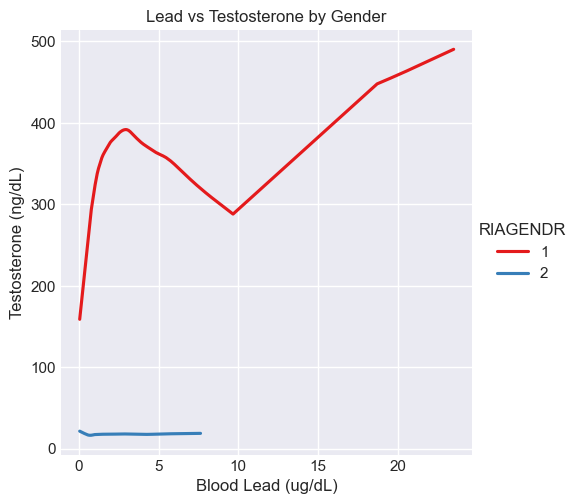

<Figure size 700x500 with 0 Axes>

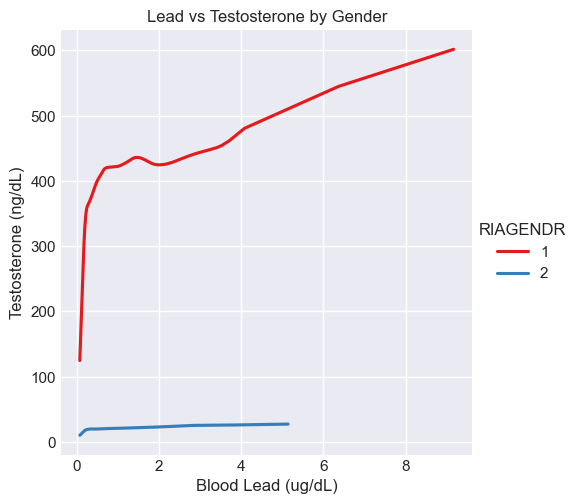

<Figure size 700x500 with 0 Axes>

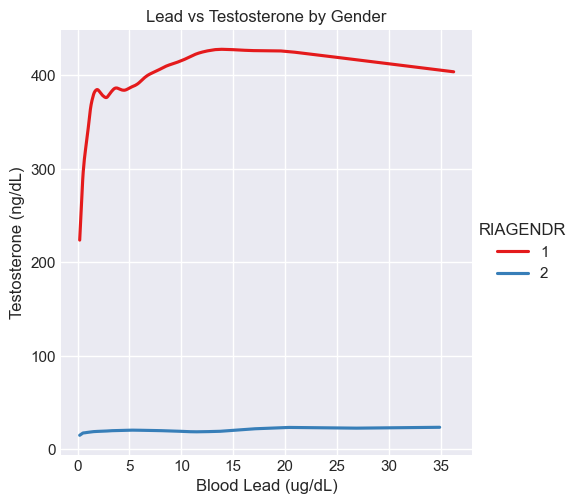

<Figure size 700x500 with 0 Axes>

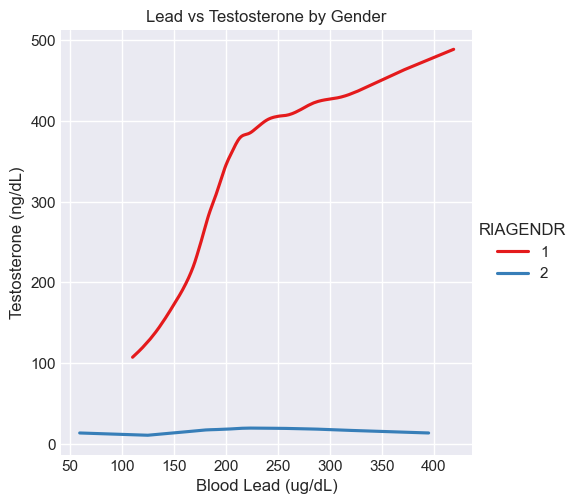

<Figure size 700x500 with 0 Axes>

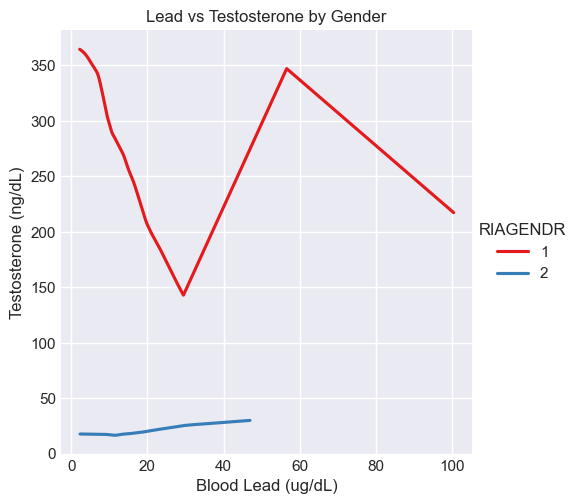

<Figure size 700x500 with 0 Axes>

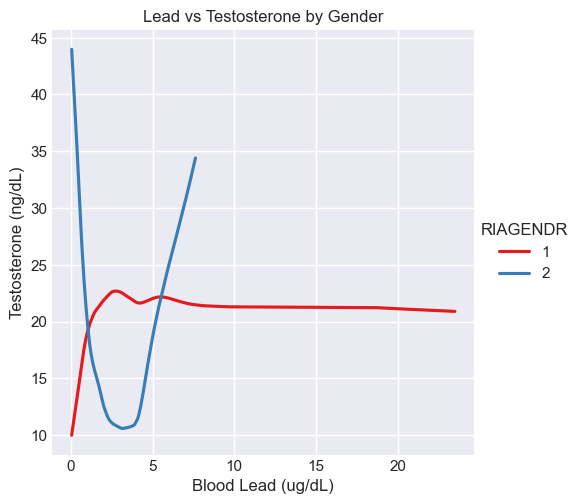

<Figure size 700x500 with 0 Axes>

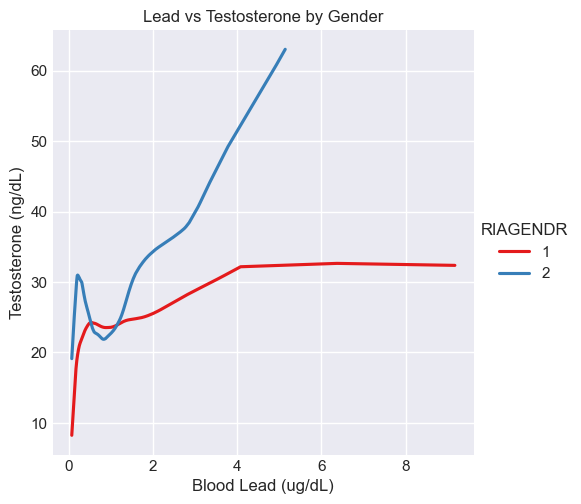

<Figure size 700x500 with 0 Axes>

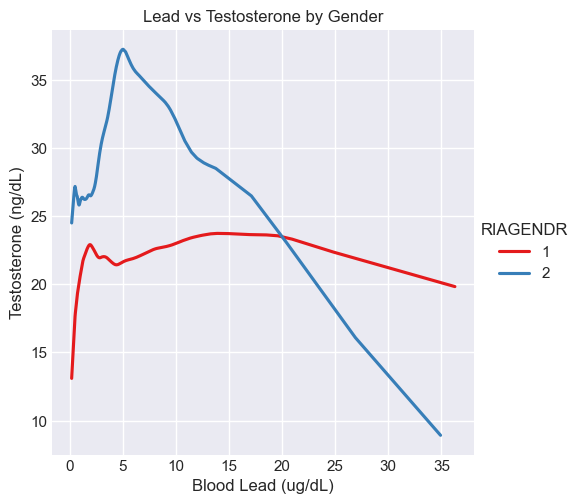

<Figure size 700x500 with 0 Axes>

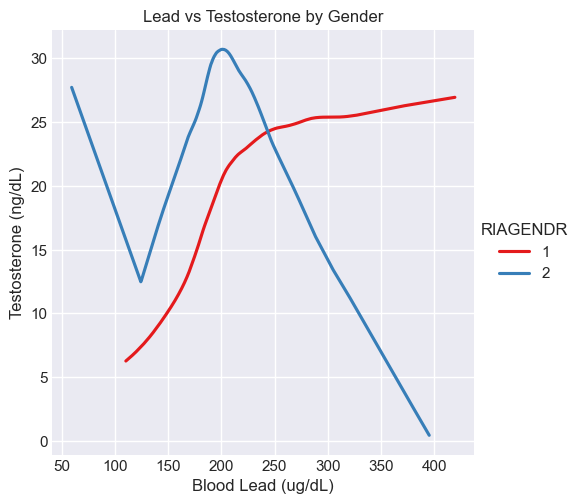

<Figure size 700x500 with 0 Axes>

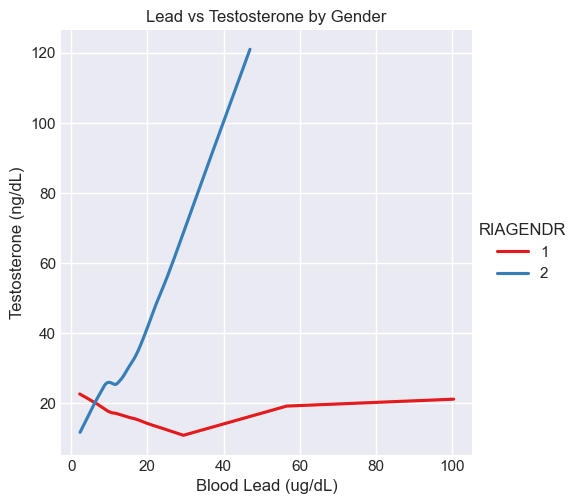

<Figure size 700x500 with 0 Axes>

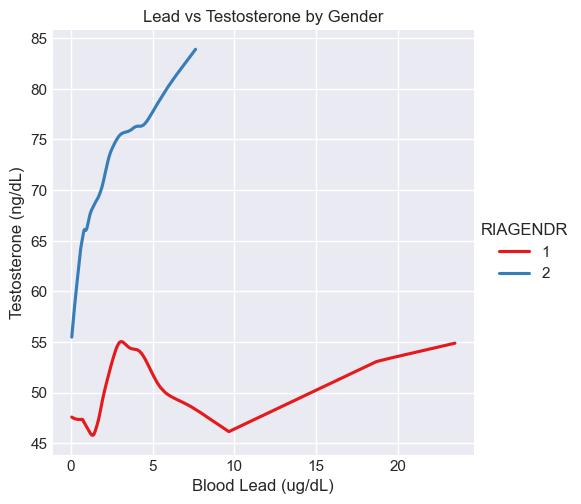

<Figure size 700x500 with 0 Axes>

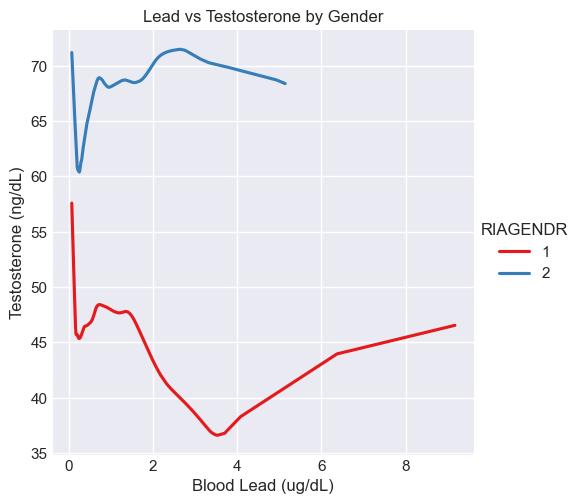

<Figure size 700x500 with 0 Axes>

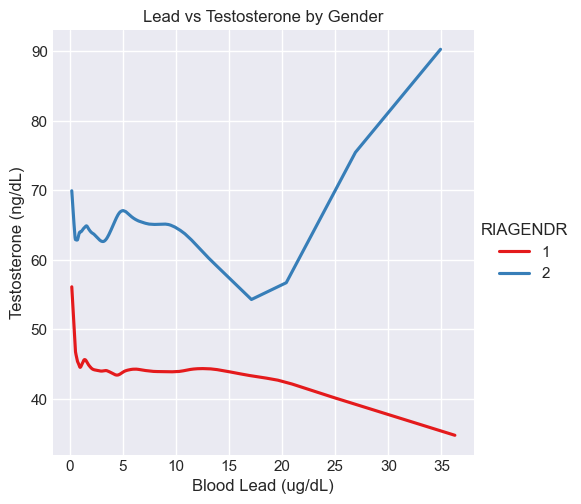

<Figure size 700x500 with 0 Axes>

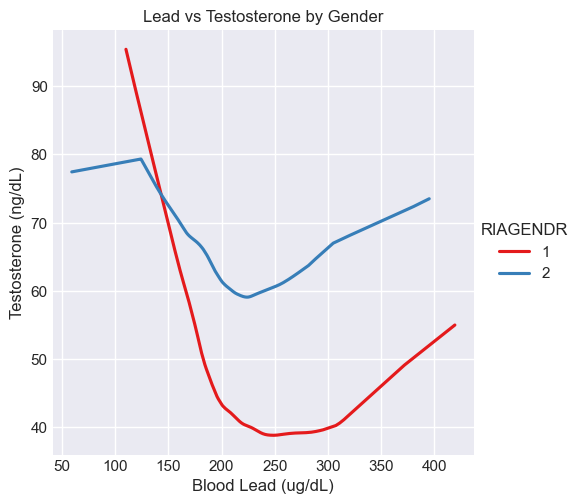

<Figure size 700x500 with 0 Axes>

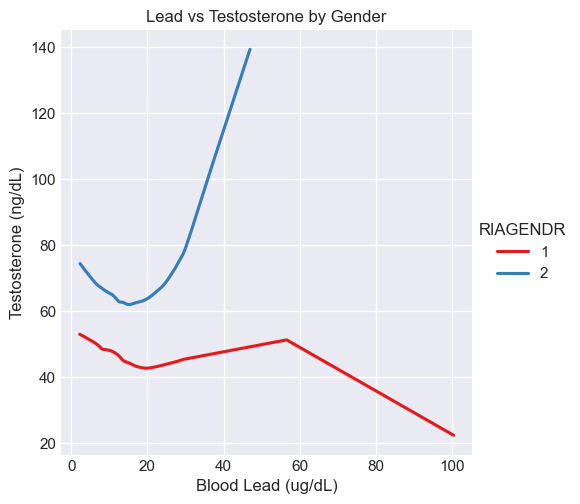

In [ ]:
metals = ["LBXBPB","LBXBCD","LBXTHG","LBXBSE","LBXBMN"]

for m in metals:
    plt.figure(figsize=(7,5))
    sns.lmplot(x=m, y="LBXTST", hue="RIAGENDR", data=df_4, 
            lowess=True, scatter=False, palette="Set1")
    plt.xlabel("Blood Lead (ug/dL)")
    plt.ylabel("Testosterone (ng/dL)")
    plt.title("Lead vs Testosterone by Gender")
    plt.show()

for m in metals:
    plt.figure(figsize=(7,5))
    sns.lmplot(x=m, y="LBXEST", hue="RIAGENDR", data=df_4, 
            lowess=True, scatter=False, palette="Set1")
    plt.xlabel("Blood Lead (ug/dL)")
    plt.ylabel("Testosterone (ng/dL)")
    plt.title("Lead vs Testosterone by Gender")
    plt.show()

for m in metals:
    plt.figure(figsize=(7,5))
    sns.lmplot(x=m, y="LBXSHBG", hue="RIAGENDR", data=df_4, 
            lowess=True, scatter=False, palette="Set1")
    plt.xlabel("Blood Lead (ug/dL)")
    plt.ylabel("Testosterone (ng/dL)")
    plt.title("Lead vs Testosterone by Gender")
    plt.show()
